# Annual Report

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## Settings

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### libraries

In [10]:
# Google Drive
# from google.colab import drive
# drive.mount("/content/drive")

In [11]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

import os
import re
import math
import numpy as np, warnings, itertools
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

import statistics
import missingno as msno
import datetime as datetime
import scipy.stats as st
import pytz
import folium
from folium import plugins
from folium.plugins import HeatMap
from collections import Counter
from itertools import combinations
import os

import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.tsa.stattools import adfuller
from numpy import log

import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
import requests
from io import BytesIO

from math import sqrt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import *
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import kstest, norm, shapiro
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pandas.plotting import autocorrelation_plot

import pmdarima as pm
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

### params

In [12]:
pd.set_option("display.max_columns", None)
# pd.set_option("display.float_format", "{:.2f}".format)
# pd.options.display.float_format = "{:.2f}".format

mpl.rcParams["text.color"] = "g"
plt.style.use("fivethirtyeight")

params = {"legend.fontsize":"x-large",
          "figure.figsize":(30, 15),
          "lines.linewidth":1.5,
          "axes.labelsize":"x-large",
          "axes.labelpad":15,
          "axes.labelweight":"bold",
          "axes.titlesize":35,
          "axes.titleweight":"bold",
          "xtick.labelsize":"x-large",
          "ytick.labelsize":"x-large"}
mpl.rcParams.update(params)

### functions

In [13]:
# normality test
def nrm_test(variable):
  
  # Shapiro-Wilk test
  print("Results of Shapiro-Wilk test :")
  print("-"*30)
  sw_results = st.shapiro(variable)
  sw_output = pd.Series(sw_results[0:2],
                        index=["Test statistic",
                               "p_value"])
  print(sw_output, "\n")
  
  alpha = 0.05
  p_value = sw_output[1]
  SW_h0 = "CONCLUSION : Distirbution is normal, accept H0"
  SW_ha = "CONCLUSION : Distribution is non-normal, reject H0"
  
  if p_value > alpha:
    print(f"p_value {p_value:.3f} > alpha")
  elif p_value < alpha:
    print(f"p_value {p_value:.3f} < alpha")

  if p_value > alpha:
    # print("\n")
    print(SW_h0)
  elif p_value < alpha:
    # print("\n")
    print(SW_ha)
  
  print("\n")

  # Kolmogorov-Smirnov test
  print("Results of Kolmogorov-Smirnov test :")
  print("-"*36)
  ks_results = sm.stats.stattools.jarque_bera(variable)
  ks_output = pd.Series(ks_results[0:2],
                        index=["KS_stats",
                               "p_value"])
  print(ks_output, "\n")
  
  alpha = 0.05
  p_value = ks_output[1]
  KS_h0 = "CONCLUSION : Data is normally distributed, accept H0"
  KS_ha = "CONCLUSION : Data series is non-normal, reject H0"
  
  if p_value > alpha:
    print(f"p_value {p_value:.3f} > alpha")
  elif p_value < alpha:
    print(f"p_value {p_value:.3f} < alpha")

  if p_value > alpha:
    # print("\n")
    print(KS_h0)
  elif p_value < alpha:
    # print("\n")
    print(KS_ha)
  
  print("\n")

  # Jarque-Bera test
  print("Results of Jarque-Bera test :")
  print("-"*30)
  jb_results = sm.stats.stattools.jarque_bera(variable)
  jb_output = pd.Series(jb_results[0:4],
                        index=["JB_stats",
                               "p_value",
                               "Skewness",
                               "Kurtosis"])
  print(jb_output, "\n")
  
  alpha = 0.05
  p_value = jb_output[1]
  JB_h0 = "CONCLUSION : Normal distribution, accept H0"
  JB_ha = "CONCLUSION : Non-normal distribution, reject H0"
  
  if p_value > alpha:
    print(f"p_value {p_value:.3f} > alpha")
  elif p_value < alpha:
    print(f"p_value {p_value:.3f} < alpha")

  if p_value > alpha:
    # print("\n")
    print(JB_h0)
  elif p_value < alpha:
    # print("\n")
    print(JB_ha)
  
  sns.displot(variable, kde=True, bins=10, aspect=1.25, height=7)
  plt.tight_layout()
  plt.show()

In [14]:
# residuals normality test
def bp_test(variable):
  print("Results of Breusch-Pagan test:")
  print("-"*30)
  bp_results = sm.stats.diagnostic.het_breuschpagan(variable.resid, variable.model.exog)
  bp_output = pd.Series(bp_results[0:4],
                        index=["Lagrange multiplier statistic",
                               "p_value",
                               "F value",
                               "F p_value"])
  print(bp_output, "\n")
  
  alpha = 0.05
  p_value = bp_output[1]
  BP_h0 = "CONCLUSION : Homoscedasticity is present (the residuals are distributed with equal variance), accept H0"
  BP_ha = "CONCLUSION : Heteroscedasticity is present (the residuals are not distributed with equal variance), reject H0"
  
  if p_value > alpha:
    print(f"p_value {p_value:.3f} > alpha")
  elif p_value < alpha:
    print(f"p_value {p_value:.3f} < alpha")

  if p_value > alpha:
    # print("\n")
    print(BP_h0)
  elif p_value < alpha:
    # print("\n")
    print(BP_ha)

In [15]:
# significance test
def significance(x,y):

  print("Results of Significance test :")

  slope, intercept, r_value, p_value, std_err = st.linregress(x,y)
    
  alpha = 0.05
  p_value = p_value
  sg_h0 = "CONCLUSION : Non significant (X has no effect on Y), accept H0"
  sg_ha = "CONCLUSION : Statistically significant (X has enough effect on Y), reject H0"
  
  if p_value > alpha:
    print(f"p_value {p_value:.3f} > alpha")
  elif p_value < alpha:
    print(f"p_value {p_value:.3f} < alpha")

  if p_value > alpha:
    print("-"*30)
    # print("\n")
    print(sg_h0)
  elif p_value < alpha:
    print("-"*30)
    # print("\n")
    print(sg_ha)

In [16]:
# additive decomposition
def add_decomp(variable):
  cols = ["{}".format(col_name) for col_name in variable.columns]
  str = f"Additive decomposition for {cols}"

  add_decomp = seasonal_decompose(variable, model="additive")
  add_decomp.plot().suptitle(str, y=1.01, fontsize=15, fontweight="bold")

  add_decomp_results = pd.concat([add_decomp.seasonal, add_decomp.trend, add_decomp.resid, add_decomp.observed], axis=1)
  add_decomp_results.columns = ["seasonality", "trend", "residual", "actual_values"]
  print("Additive : ")
  display(add_decomp_results.head())

In [17]:
# ADF test with PACF and ACF plots
def tsplot(y, lags=None, figsize=(20, 10), style="bmh"):
    
  # determing rolling statistics
  window = 15
  rolmean = y.rolling(window=window).mean()
  rolstd = y.rolling(window=window).std()

  # plot rolling statistics:
  fig = plt.figure(figsize=(15, 4))
  orig = plt.plot(y.iloc[window:], color="blue",label="Original")
  mean = plt.plot(rolmean, color="red", label="Rolling Mean")
  std = plt.plot(rolstd, color="black", label = "Rolling Std")
  plt.legend(loc="best")
  plt.title("Rolling Mean & Standard Deviation")
  plt.show()

 # perform augmented Dickey-Fuller test
  adf_test = adfuller(y, autolag="AIC")
  print(f"Results of Dickey-Fuller test :\n{'-'*50}")

  dftest = adfuller(y, autolag="AIC")
  dfoutput = pd.Series(dftest[0:4], index=["Test Statistic","P-value","# Lags Used","Number of Observations Used"])
  print(dfoutput)
  print("\n")
  print("Is this data stationary ?")
  for key, value in dftest[4].items():
    print("\tCritical value {}: {} - The data is {} stationary with {}% confidence".format(key, value, "not" if value < dftest[0] else "", 100-int(key[:-1])))
    # dfoutput["Critical Value (%s)"%key] = value
  # print (dfoutput)
  # print("\n")

  alpha = 0.05
  p_value = adf_test[1]
  ADF_h0 = "CONCLUSION : time series is non-stationary, accept H0"
  ADF_ha = "CONCLUSION : time series is stationary, reject H0"

  if p_value < alpha:
    print("\n")
    print(ADF_ha)
  elif p_value > alpha:
    print("\n")
    print(ADF_h0)

  # ACF and PACF plots
  if not isinstance(y, pd.Series):
      y = pd.Series(y)

  with plt.style.context(style):
      fig = plt.figure(figsize=figsize)
      layout = (2, 2)
      ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
      acf_ax = plt.subplot2grid(layout, (1, 0))
      pacf_ax = plt.subplot2grid(layout, (1, 1))

      y.plot(ax=ts_ax)
      p_value = sm.tsa.stattools.adfuller(y)[1]
      ts_ax.set_title("Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}".format(p_value))
      sm.tsa.graphics.plot_acf(y, lags=lags, ax=acf_ax)
      sm.tsa.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
      plt.tight_layout()

### datasets

#### load files

In our sales data folder, we have 12 months of sales records. We are going to merge them to create one single dataset that we will use for the entire analysis. But first, let"s visualize one of our datasets to get a quick feel of how it looks like

In [18]:
"""
quick_look = pd.read_csv("./P6_01_db/P6_01_MonthlySalesData/Sales_April_2019.csv")

display(quick_look.head(), quick_look.shape)

print(f"{quick_look.info(memory_usage='deep')}")
# print(f"\n")
# print(f"{quick_look.memory_usage(deep=True)}")
"""

'\nquick_look = pd.read_csv("./P6_01_db/P6_01_MonthlySalesData/Sales_April_2019.csv")\n\ndisplay(quick_look.head(), quick_look.shape)\n\nprint(f"{quick_look.info(memory_usage=\'deep\')}")\n# print(f"\n")\n# print(f"{quick_look.memory_usage(deep=True)}")\n'

Let"s see all the files available in our sales directory

In [19]:
"""
files = [file for file in os.listdir("./P6_01_db/P6_01_MonthlySalesData")]

for file in files:
    print(file)
"""

'\nfiles = [file for file in os.listdir("./P6_01_db/P6_01_MonthlySalesData")]\n\nfor file in files:\n    print(file)\n'

Now let"s import all of our datasets and concatenate them in order to make a single csv file

In [20]:
"""
sales_directory = pd.DataFrame()

for file in files:
    df = pd.read_csv("./P6_01_db/P6_01_MonthlySalesData/"+file)
    sales_directory = pd.concat([sales_directory, df])
    
sales_directory.to_csv("sales_2019.csv", index=False)
"""

'\nsales_directory = pd.DataFrame()\n\nfor file in files:\n    df = pd.read_csv("./P6_01_db/P6_01_MonthlySalesData/"+file)\n    sales_directory = pd.concat([sales_directory, df])\n    \nsales_directory.to_csv("sales_2019.csv", index=False)\n'

Let"s get an overview of our new dataset

#### new dataset

In [21]:
# local drive file
df = pd.read_csv("./P6_01_db/P6_01_Sales.csv")

# Google Drive file
# df = pd.read_csv("/content/drive/MyDrive/OC/P8/sales_2019.csv")

display(df.head())

# check data info
print(f"Data shape : {df.shape}\n")
print(f"{df.info(memory_usage='deep')}\n")
print(f"{df.memory_usage(deep=True)}")

Order ID               Product Quantity Ordered Price Each      Order Date  \
0   295665    Macbook Pro Laptop                1       1700  12/30/19 00:01   
1   295666    LG Washing Machine                1      600.0  12/29/19 07:03   
2   295667  USB-C Charging Cable                1      11.95  12/12/19 18:21   
3   295668      27in FHD Monitor                1     149.99  12/22/19 15:13   
4   295669  USB-C Charging Cable                1      11.95  12/18/19 12:38   

                         Purchase Address  
0  136 Church St, New York City, NY 10001  
1     562 2nd St, New York City, NY 10001  
2    277 Main St, New York City, NY 10001  
3     410 6th St, San Francisco, CA 94016  
4           43 Hill St, Atlanta, GA 30301

Data shape : (186850, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 74.9 MB
None

Index                    128
Order ID            11755365
Product             14312320
Quantity Ordered    10828455
Price Each          11483214
Order Date          13243675
Purchase Address    16933522
dtype: int64


Let's rename our columns first to facilitate the writing

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## Data cleaning

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### rename columns 

In [22]:
set(df.columns)

{'Order Date',
 'Order ID',
 'Price Each',
 'Product',
 'Purchase Address',
 'Quantity Ordered'}

In [23]:
df.rename(columns={"Order ID":"order_id",
                   "Product":"product",
                   "Quantity Ordered":"order_qty",
                   "Price Each":"unit_price",
                   "Order Date":"order_date",
                   "Purchase Address":"purchase_address"}, inplace=True)
set(df.columns)

{'order_date',
 'order_id',
 'order_qty',
 'product',
 'purchase_address',
 'unit_price'}

Now let"s verify if we have null and duplicated values in our dataset

### null values

In [24]:
# data info
print(f"Data shape : {df.shape}\n")
print(f"Total values in the dataset : {len(df):,}")
print(f"Total duplicated values : {str(df.duplicated().sum())}")
print(f"Total null values : {df.isnull().sum().sum():,}")
print(f"Total null values for each column :")
display(df.isnull().sum())

# ratio of missing and duplicated values in our data
isnull_ratio = (df.isnull().sum().sum() / len(df)) * 100
dup_ratio = (df.duplicated().sum() / len(df)) * 100
print(f"\nPercentage of null values in the data : {round(isnull_ratio, 2)}%")
print(f"Percentage of duplicates in the data : {round(dup_ratio, 2)}%")

Data shape : (186850, 6)

Total values in the dataset : 186,850
Total duplicated values : 1162
Total null values : 3,270
Total null values for each column :


order_id            545
product             545
order_qty           545
unit_price          545
order_date          545
purchase_address    545
dtype: int64


Percentage of null values in the data : 1.75%
Percentage of duplicates in the data : 0.62%


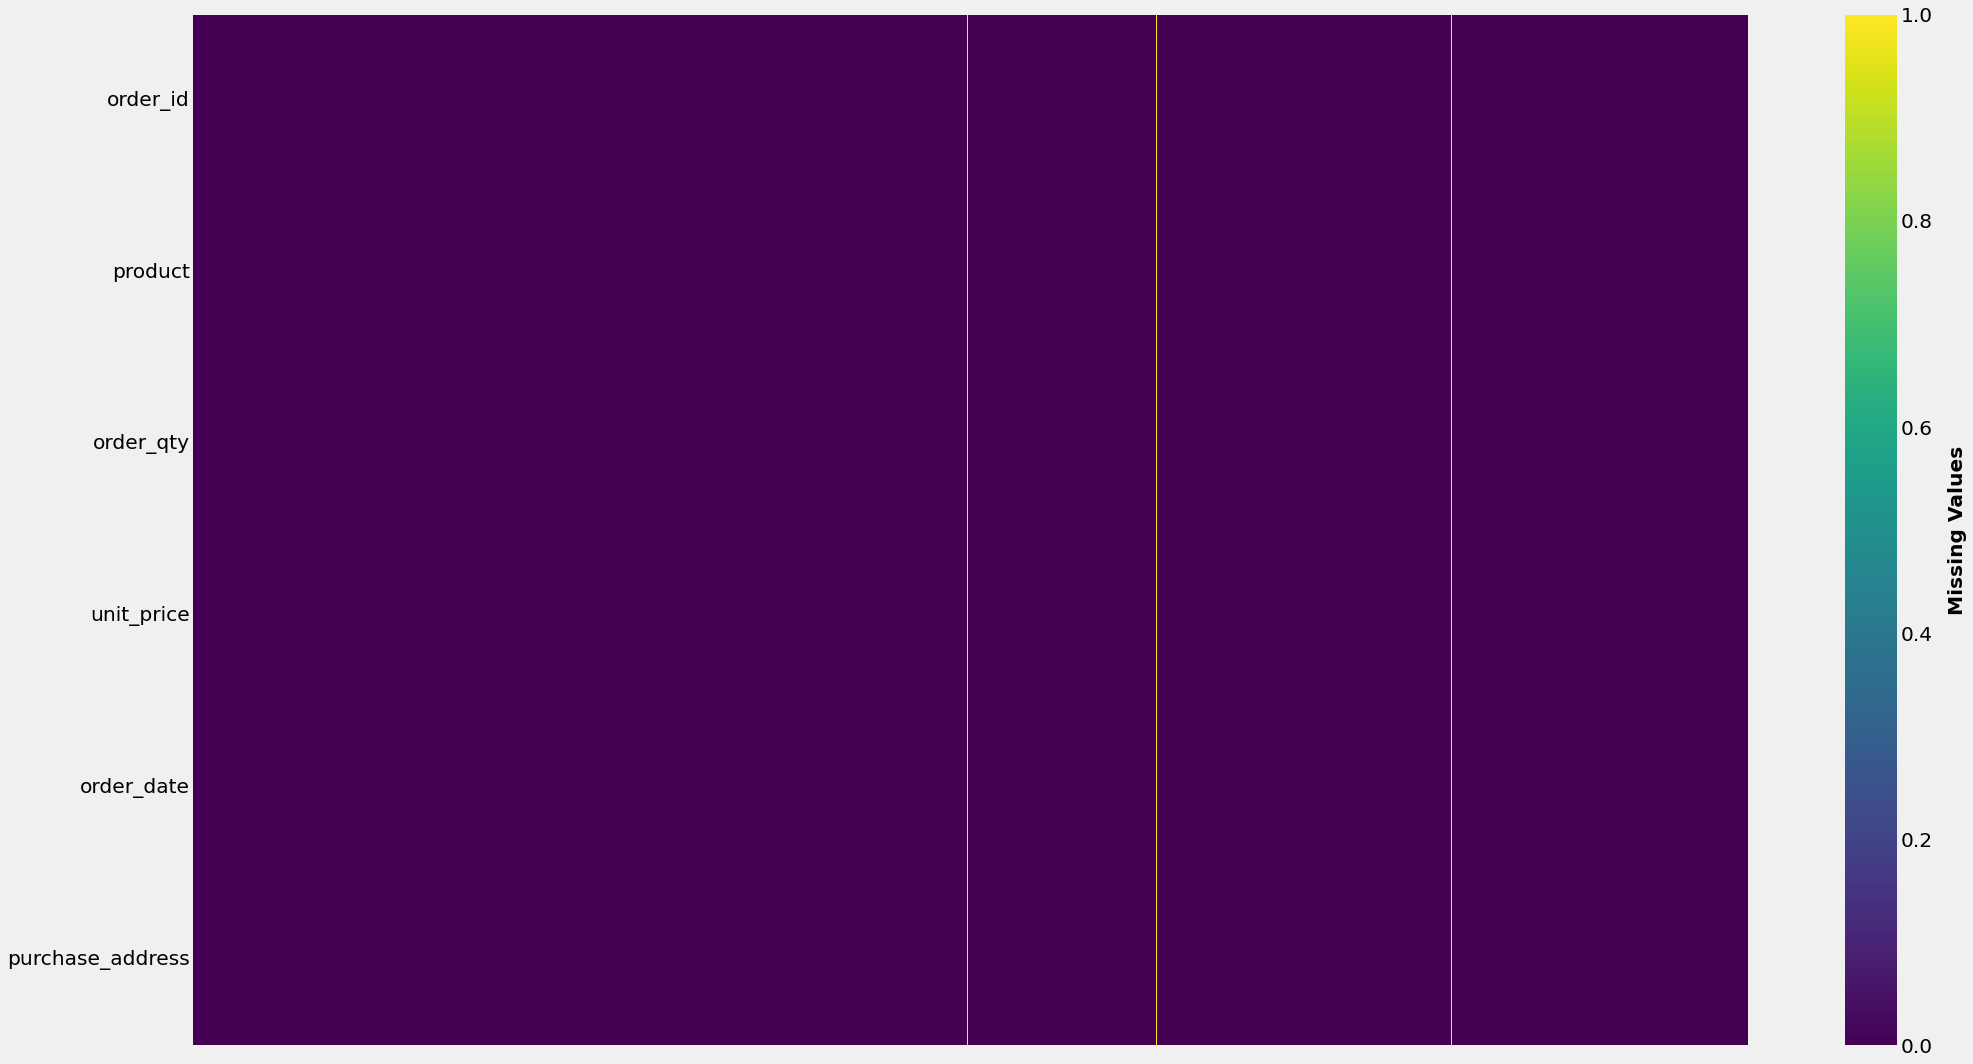

In [25]:
# visualize missing values
sns.heatmap(df.isnull().T,
            xticklabels=False,
            cmap="viridis",
            cbar_kws={"label": "Missing Values"})

plt.tight_layout()
plt.show()

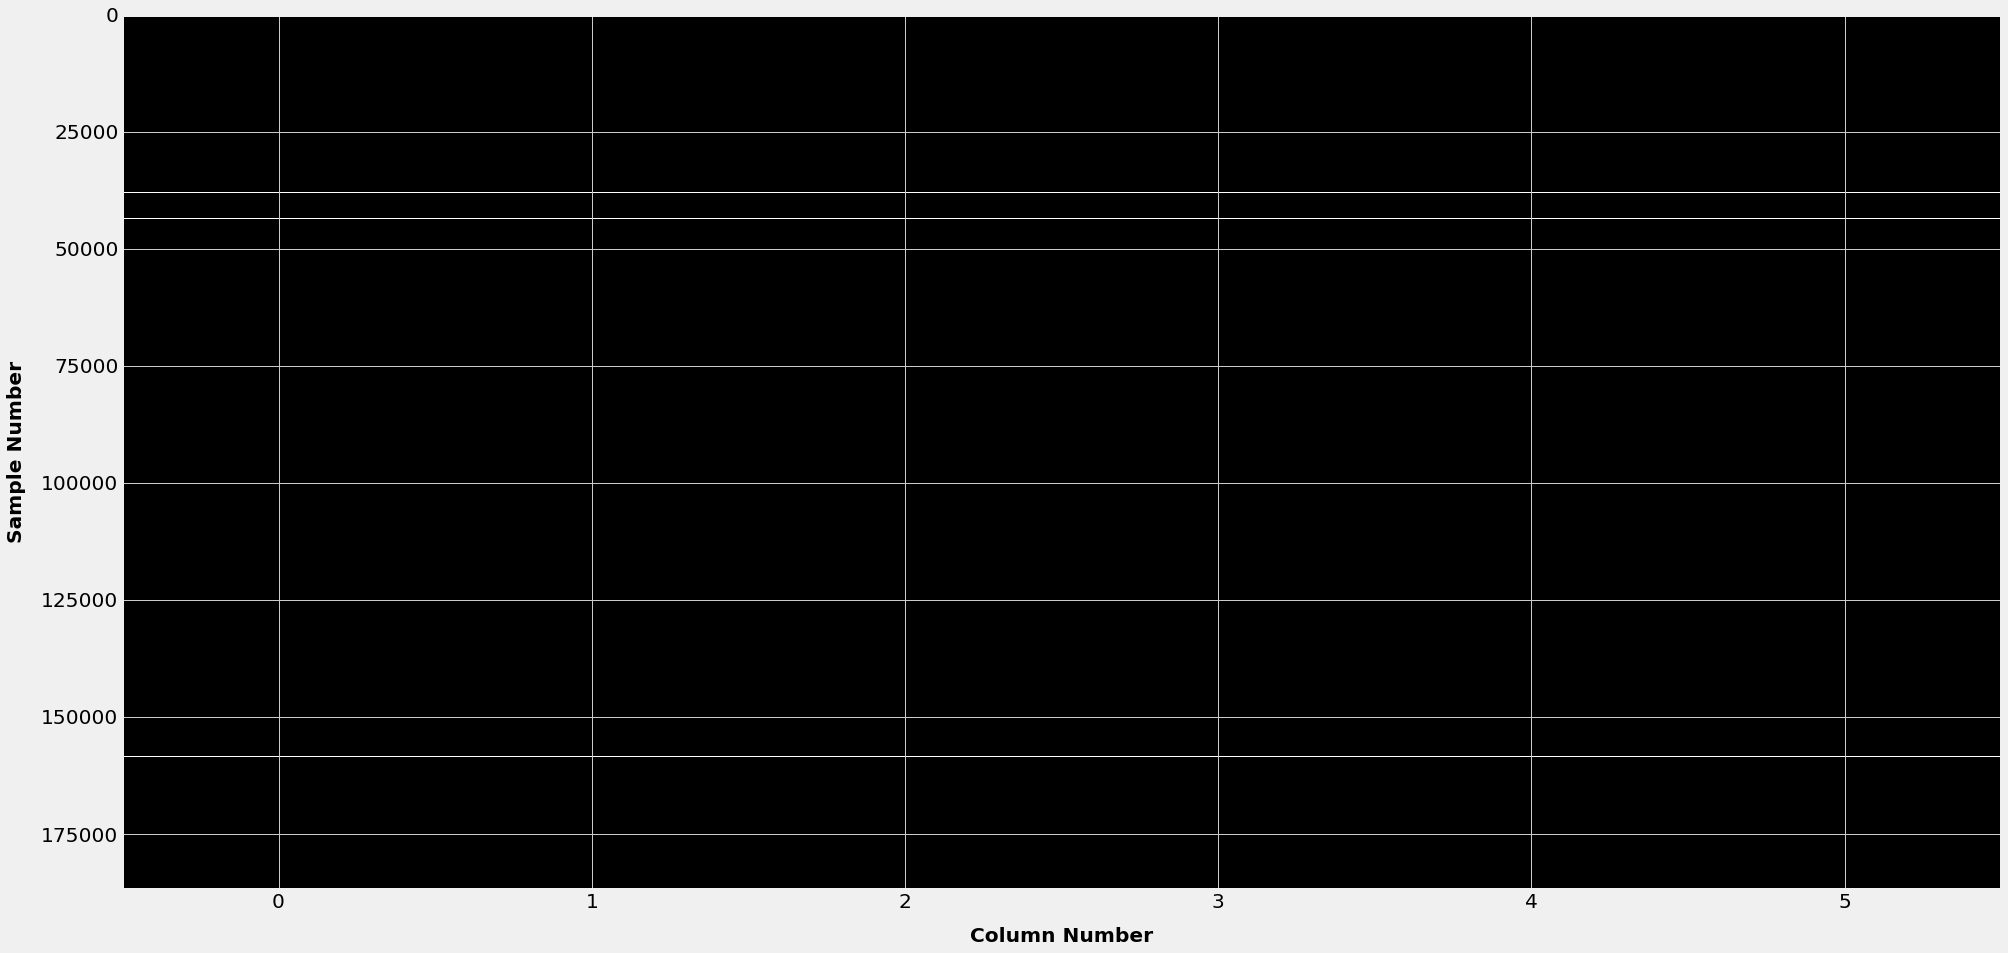

In [26]:
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

<AxesSubplot:>

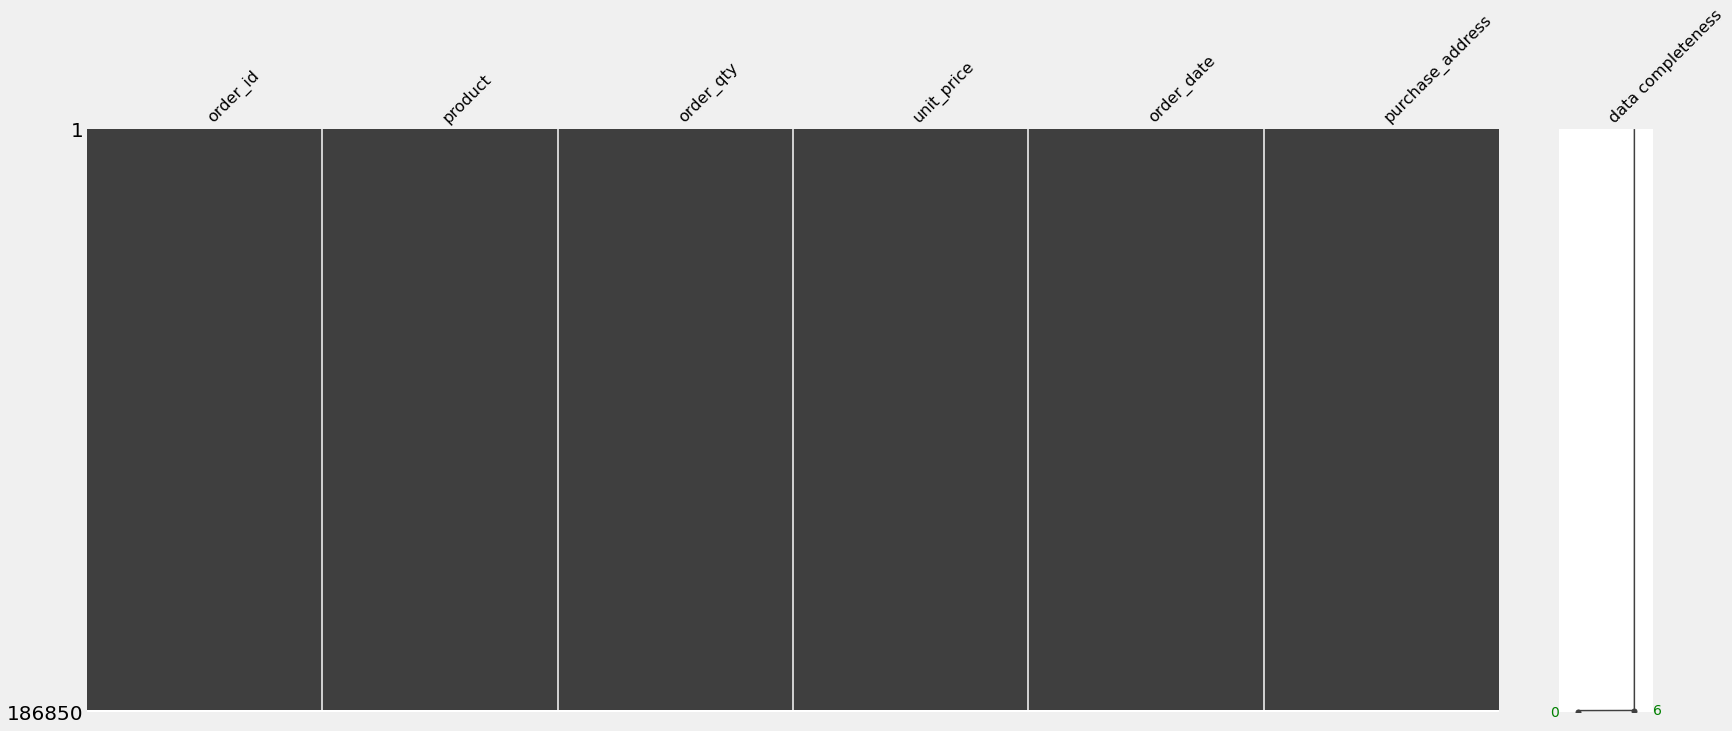

In [27]:
msno.matrix(df, labels=True, sort="descending")

<AxesSubplot:title={'center':'Percentage of missing values per feature'}, ylabel='Ratio of missing values per feature'>

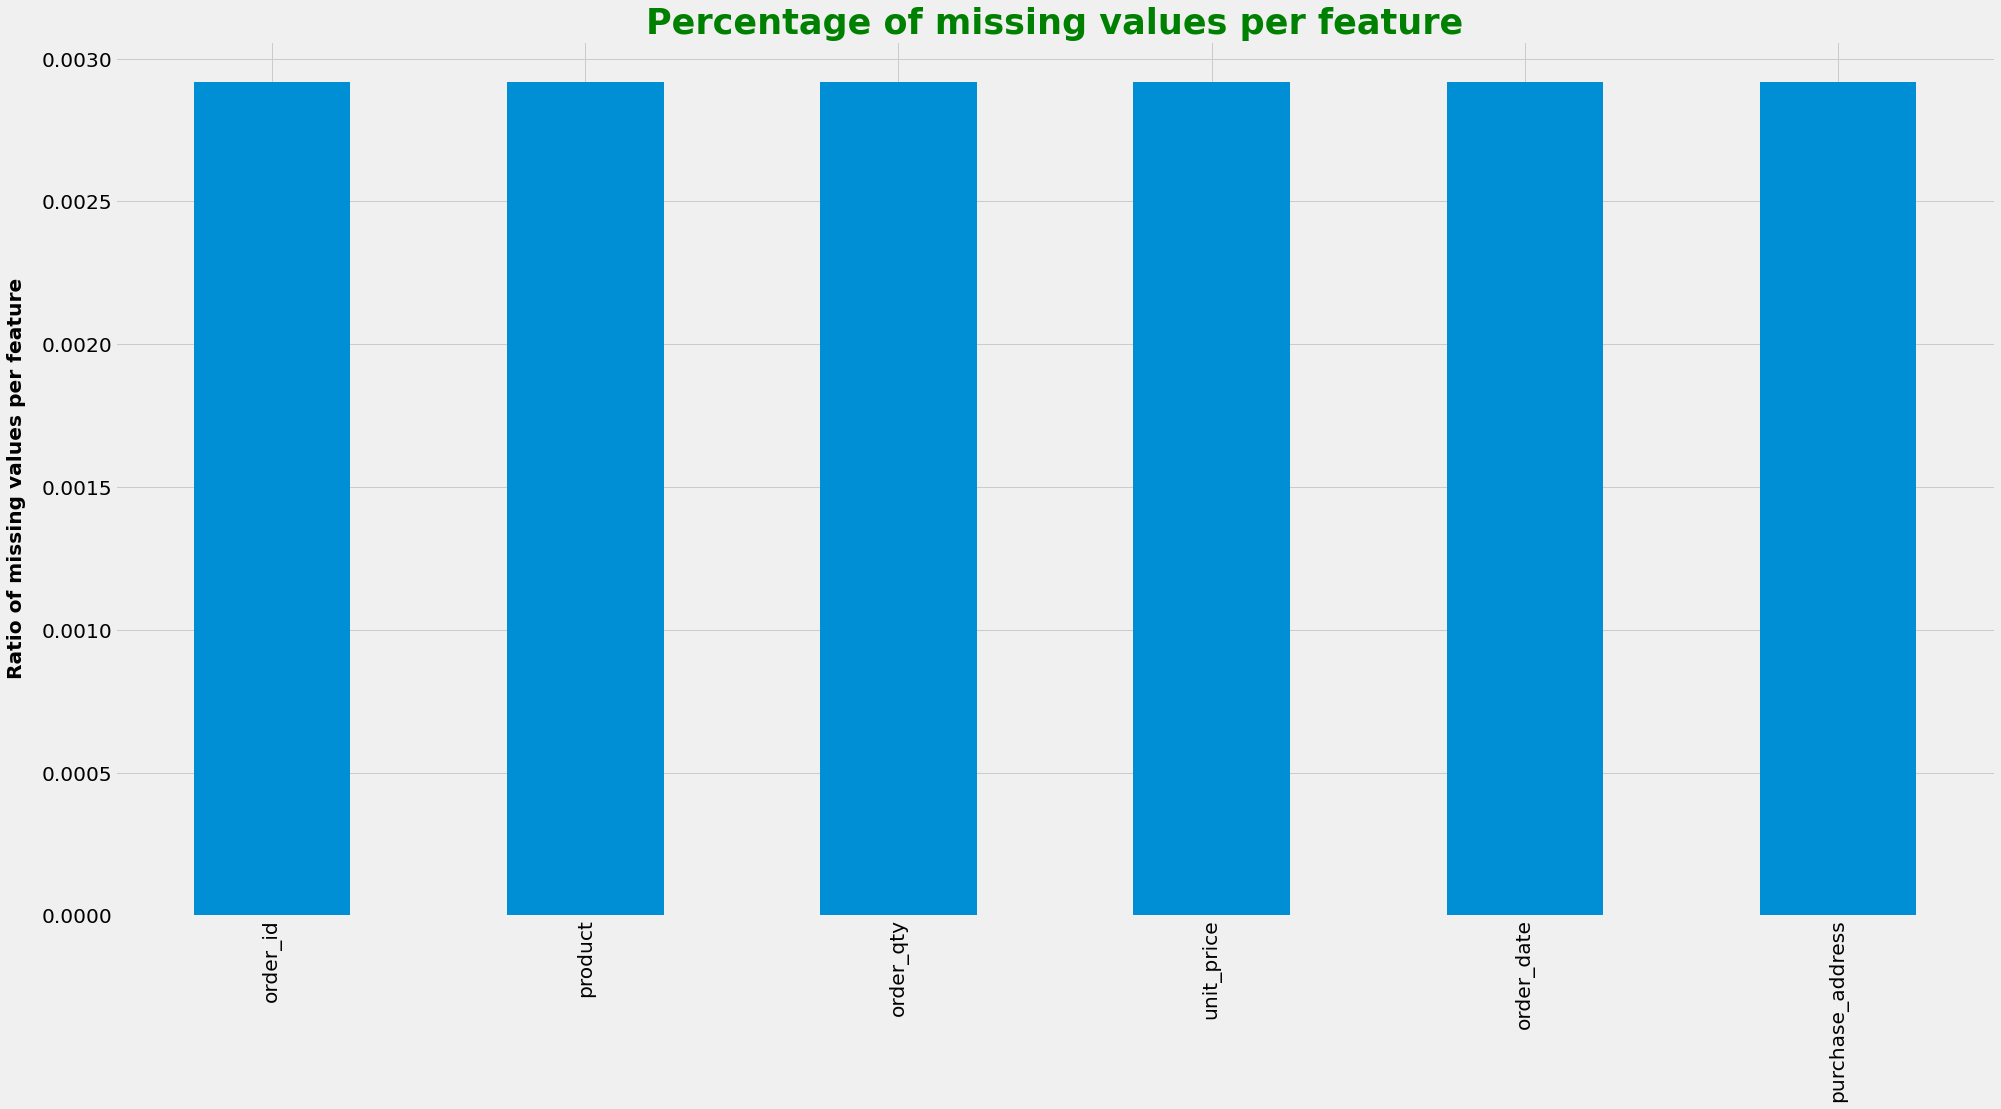

In [28]:
df.isna().mean().sort_values().plot(kind="bar", title="Percentage of missing values per feature", ylabel="Ratio of missing values per feature")

Other methods to visualize missing values

```python
# bar charts
msno.bar(df)
# matrix plots
msno.matrix(df)
# heatmaps
msno.heatmap(df)
```

Based on the figures shown above, we have missing values in our data. If we visualize those values thanks to heatmap, we can see that they are uniform accross all colmuns. Figures from the results have shown that there are 545 missing values for all columns. We can therefore assume that there are 545 lines containing no information at all. Let's confirm that right away. We will select one random column with null values and check if all columns have missing values as well

In [29]:
df[df["product"].isnull()]

order_id product order_qty unit_price order_date purchase_address
264         NaN     NaN       NaN        NaN        NaN              NaN
648         NaN     NaN       NaN        NaN        NaN              NaN
680         NaN     NaN       NaN        NaN        NaN              NaN
1385        NaN     NaN       NaN        NaN        NaN              NaN
1495        NaN     NaN       NaN        NaN        NaN              NaN
...         ...     ...       ...        ...        ...              ...
185795      NaN     NaN       NaN        NaN        NaN              NaN
185868      NaN     NaN       NaN        NaN        NaN              NaN
185887      NaN     NaN       NaN        NaN        NaN              NaN
185960      NaN     NaN       NaN        NaN        NaN              NaN
186580      NaN     NaN       NaN        NaN        NaN              NaN

[545 rows x 6 columns]

Our assumptions are correct. There are 545 rows with missing values across all columns. Let's get rid of those inputs. After dropping all missing values, we should have 186,305 records in our dataset

In [30]:
# drop missing values
df.dropna(inplace=True)

# check results
print(f"Data shape : {df.shape}\n")
print(f"Total values in the dataset : {len(df):,}")
print(f"Total duplicated values : {str(df.duplicated().sum())}")
print(f"Total null values : {df.isnull().sum().sum():,}")
print(f"Total null values for each column :")
display(df.isnull().sum())

# ratio of missing and duplicated values in our data
isnull_ratio = (df.isnull().sum().sum() / len(df)) * 100
dup_ratio = (df.duplicated().sum() / len(df)) * 100
print(f"\nPercentage of null values in the data : {round(isnull_ratio, 2)}%")
print(f"Percentage of duplicates in the data : {round(dup_ratio, 2)}%")

Data shape : (186305, 6)

Total values in the dataset : 186,305
Total duplicated values : 618
Total null values : 0
Total null values for each column :


order_id            0
product             0
order_qty           0
unit_price          0
order_date          0
purchase_address    0
dtype: int64


Percentage of null values in the data : 0.0%
Percentage of duplicates in the data : 0.33%


Perfect. Now, let"s handle duplicated values

### duplicates

After removing null values, number of duplicates have gone from 1,162 to 618. Let"s visualize all duplicated values, including original (actual) inputs

In [31]:
# visualize all duplicated values, including the original inputs
duplicated = df.loc[df.duplicated(keep=False), :].sort_values(by="order_date")
duplicated

order_id                   product         order_qty  unit_price  \
145918    149308  Apple Airpods Headphones                 1         150   
145917    149308  Apple Airpods Headphones                 1         150   
144255    147707          Wired Headphones                 1       11.99   
144254    147707          Wired Headphones                 1       11.99   
141573    145143  Lightning Charging Cable                 1       14.95   
...          ...                       ...               ...         ...   
81100   Order ID                   Product  Quantity Ordered  Price Each   
80979   Order ID                   Product  Quantity Ordered  Price Each   
80367   Order ID                   Product  Quantity Ordered  Price Each   
87239   Order ID                   Product  Quantity Ordered  Price Each   
186532  Order ID                   Product  Quantity Ordered  Price Each   

            order_date                           purchase_address  
145918  01/02/19 23:07    351 Madison St, New York City, NY 10001  
145917  01/02/19 23:07    351 Madison St, New York City, NY 10001  
144255  01/04/19 16:50               883 4th St, Dallas, TX 75001  
144254  01/04/19 16:50               883 4th St, Dallas, TX 75001  
141573  01/06/19 03:01  182 Jefferson St, San Francisco, CA 94016  
...                ...                                        ...  
81100       Order Date                           Purchase Address  
80979       Order Date                           Purchase Address  
80367       Order Date                           Purchase Address  
87239       Order Date                           Purchase Address  
186532      Order Date                           Purchase Address  

[883 rows x 6 columns]

Now let"s check the duplicates (copies) without the actual input (has been duplicated)

In [32]:
# see only duplicates of the original input
duplicates = df.loc[df.duplicated(keep="first"), :].sort_values(by="order_date")
# keep="first" = mark duplicates as True except for the first occurrence

# count nb dupplicate occurences
display(duplicates.groupby("product")[["product"]].count())
print(f"Total duplicates : {len(duplicates)}")

product
product                            
20in Monitor                      3
27in 4K Gaming Monitor            5
27in FHD Monitor                  9
34in Ultrawide Monitor            7
AA Batteries (4-pack)            19
AAA Batteries (4-pack)           29
Apple Airpods Headphones         24
Bose SoundSport Headphones       27
Flatscreen TV                     6
Google Phone                      3
Lightning Charging Cable         48
Macbook Pro Laptop                3
Product                         354
ThinkPad Laptop                   2
USB-C Charging Cable             44
Wired Headphones                 33
iPhone                            2

Total duplicates : 618


In [33]:
# get rid of duplicates
df.drop_duplicates(keep="first", inplace=True)

# check results
print(f"Data shape : {df.shape}\n")
print(f"Total values in the dataset : {len(df):,}")
print(f"Total duplicated values : {str(df.duplicated().sum())}\n")

# ratio of duplicated values in the data
dup_ratio = (df.duplicated().sum() / len(df)) * 100
print(f"Percentage of duplicates in the data : {round(dup_ratio, 2)}%")

Data shape : (185687, 6)

Total values in the dataset : 185,687
Total duplicated values : 0

Percentage of duplicates in the data : 0.0%


Our data is looking better. We can now dig deeper into cleaning our data. Let"s have a global look of each column"s unique values

In [34]:
# check unique values for each column
for col in df.columns:
    
  names = df[col].unique()
  print(f"Values in {col} : \n")
  print(f"{names}")
  print("-" * 75)

Values in order_id : 

['295665' '295666' '295667' ... '222907' '222908' '222909']
---------------------------------------------------------------------------
Values in product : 

['Macbook Pro Laptop' 'LG Washing Machine' 'USB-C Charging Cable'
 '27in FHD Monitor' 'AA Batteries (4-pack)' 'Bose SoundSport Headphones'
 'AAA Batteries (4-pack)' 'ThinkPad Laptop' 'Lightning Charging Cable'
 'Google Phone' 'Wired Headphones' 'Apple Airpods Headphones'
 'Vareebadd Phone' 'iPhone' '20in Monitor' '34in Ultrawide Monitor'
 'Flatscreen TV' '27in 4K Gaming Monitor' 'Product' 'LG Dryer']
---------------------------------------------------------------------------
Values in order_qty : 

['1' '2' '4' '3' 'Quantity Ordered' '7' '5' '6' '8' '9']
---------------------------------------------------------------------------
Values in unit_price : 

['1700' '600.0' '11.95' '149.99' '3.84' '99.99' '2.99' '999.99' '14.95'
 '600' '11.99' '150' '400' '700' '109.99' '379.99' '300' '389.99'
 'Price Each' '700.

We detected some informations that needs some cleaning, mainly order_qty and unit_price. Let"s get into those and fix abnormal values

### outliers

In [35]:
# show abnormal values
df[(df.order_qty == "Quantity Ordered") | (df.unit_price == "Price Each")]

order_id  product         order_qty  unit_price  order_date  \
254  Order ID  Product  Quantity Ordered  Price Each  Order Date   

     purchase_address  
254  Purchase Address

In [36]:
df.loc[(df["product"] == "Vareebadd Phone"), "product"] = "other smartphone"
set(df["product"].unique())

{'20in Monitor',
 '27in 4K Gaming Monitor',
 '27in FHD Monitor',
 '34in Ultrawide Monitor',
 'AA Batteries (4-pack)',
 'AAA Batteries (4-pack)',
 'Apple Airpods Headphones',
 'Bose SoundSport Headphones',
 'Flatscreen TV',
 'Google Phone',
 'LG Dryer',
 'LG Washing Machine',
 'Lightning Charging Cable',
 'Macbook Pro Laptop',
 'Product',
 'ThinkPad Laptop',
 'USB-C Charging Cable',
 'Wired Headphones',
 'iPhone',
 'other smartphone'}

Line 254 has no records. We can discard this input

In [37]:
# delete records for line (index) 254
df.drop(254, inplace=True)

# check results
display(df[(df.order_qty == "Quantity Ordered") | (df.unit_price == "Price Each")])
print(f"Data shape : {df.shape}\n")
print(f"Total values in the dataset : {len(df):,}")

Empty DataFrame
Columns: [order_id, product, order_qty, unit_price, order_date, purchase_address]
Index: []

Data shape : (185686, 6)

Total values in the dataset : 185,686


Now that we fixed input errors, we can head on to converting datatypes

### data types

In [38]:
df.dtypes

order_id            object
product             object
order_qty           object
unit_price          object
order_date          object
purchase_address    object
dtype: object

In [39]:
# transform order_qty, unit_price, & order_date
df[["order_qty", "unit_price"]] = df[["order_qty", "unit_price"]].apply(pd.to_numeric, errors="coerce")
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")

# sort our data by order_date
df.sort_values(by=["order_date"], inplace=True)

# check results
df.dtypes

order_id                    object
product                     object
order_qty                    int64
unit_price                 float64
order_date          datetime64[ns]
purchase_address            object
dtype: object

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## Augment data

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### date

Let"s add a new column to split dates into months, days, and hours. We will fill null values to 0 so we won"t get any error output

In [40]:
# extract infos from date
df["date"] = df["order_date"].dt.day
df["hour"] = df["order_date"].dt.hour
df["quarter"] = df["order_date"].dt.to_period("Q")

Let"s add month and day names for easier reading

In [41]:
# add month and day name
df["month"] = df["order_date"].dt.month_name()
df["day"] = df["order_date"].dt.day_name()

# map month and day names to categorical order
months = ["January",
          "February",
          "March",
          "April",
          "May",
          "June",
          "July",
          "August",
          "September",
          "October",
          "November",
          "December"]

days = ["Sunday",
       "Monday",
       "Tuesday",
       "Wednesday",
       "Thursday",
       "Friday",
       "Saturday"]

df["month"] = pd.CategoricalIndex(df["month"], ordered=True, categories=months)
df["day"] = pd.CategoricalIndex(df["day"], ordered=True, categories=days)

### address 

In [42]:
df[["street", "city", "state"]] = df["purchase_address"].str.split(", ", expand=True)
df[["state", "zipcode"]] = df["state"].str.split(" ", expand=True)

It is necessary to include either the state or zipcode (at least one of them) because the United States has cities that shares the same name but totally independent from each other. For instance, if we look at our data and we group them by city, we"ll see that Portland is duplicated twice, but if you look at the state and the zipcode, you"ll notice that there are actually two Portlands from different region (one in Maine, and one in Oregon)

In [43]:
# verify twin cities and states
df.groupby(["city"])[["state"]].nunique()

state
city                
Atlanta            1
Austin             1
Boston             1
Dallas             1
Los Angeles        1
New York City      1
Portland           2
San Francisco      1
Seattle            1

In [44]:
# verify states
df.groupby(["city", "state", "zipcode"])[["purchase_address"]].nunique()

purchase_address
city          state zipcode                  
Atlanta       GA    30301               12334
Austin        TX    73301                8609
Boston        MA    02215               15706
Dallas        TX    75001               12321
Los Angeles   CA    90001               21450
New York City NY    10001               18807
Portland      ME    04101                2301
              OR    97035                8723
San Francisco CA    94016               28324
Seattle       WA    98101               12212

Let"s add suffix for Portlands in order to distinguish them easily

In [45]:
# add suffix for both Portland
df.loc[((df["city"] == "Portland") & (df["state"] == "OR")), "city"] = "Portland (OR)"
df.loc[((df["city"] == "Portland") & (df["state"] != "OR")), "city"] = "Portland (ME)"

# check results
df.groupby(["city", "state", "zipcode"])[["purchase_address"]].nunique()

purchase_address
city          state zipcode                  
Atlanta       GA    30301               12334
Austin        TX    73301                8609
Boston        MA    02215               15706
Dallas        TX    75001               12321
Los Angeles   CA    90001               21450
New York City NY    10001               18807
Portland (ME) ME    04101                2301
Portland (OR) OR    97035                8723
San Francisco CA    94016               28324
Seattle       WA    98101               12212

See map below, hover over the pinned locations and click to see both Portlands from different cities

In [46]:
# United States of America
maps = folium.Map(height=250, location=[45.5833, -97.4020], tiles="OpenStreetMap", zoom_start=4)

# markers
tooltip = "Portland"
folium.Marker(location=[43.659222, -70.256523], 
              popup="Portland, <b>Maine</b>", 
              tooltip=tooltip, icon=folium.Icon(icon="info-sign", color="black")).add_to(maps)
folium.Marker(location=[45.512230, -122.658722], 
              popup="Portland, <b>Oregon</b>", 
              tooltip=tooltip, icon=folium.Icon(icon="info-sign", color="black")).add_to(maps)

# configuration
# maps.add_child(folium.LatLngPopup())
# help(folium.Icon)

# show
maps

###  product

In [47]:
monitor = ["20in Monitor", "27in 4K Gaming Monitor", "27in FHD Monitor", "34in Ultrawide Monitor"]
battery = ["AA Batteries (4-pack)", "AAA Batteries (4-pack)"]
headphone = ["Apple Airpods Headphones", "Bose SoundSport Headphones", "Wired Headphones"]
tv = ["Flatscreen TV"]
smartphone = ["Google Phone", "iPhone", "other smartphone"]
appliance = ["LG Dryer", "LG Washing Machine"]
cable = ["Lightning Charging Cable", "USB-C Charging Cable"]
laptop = ["Macbook Pro Laptop", "ThinkPad Laptop"]

df["category"] = " "
df.loc[(df["product"].isin(monitor)), "category"] = "monitor"
df.loc[(df["product"].isin(battery)), "category"] = "battery"
df.loc[(df["product"].isin(headphone)), "category"] = "headphone"
df.loc[(df["product"].isin(tv)), "category"] = "tv"
df.loc[(df["product"].isin(smartphone)), "category"] = "smartphone"
df.loc[(df["product"].isin(appliance)), "category"] = "appliance"
df.loc[(df["product"].isin(cable)), "category"] = "charging cable"
df.loc[(df["product"].isin(laptop)), "category"] = "laptop"
df

order_id                     product  order_qty  unit_price  \
143792   147268            Wired Headphones          1       11.99   
144602   148041        USB-C Charging Cable          1       11.95   
145955   149343    Apple Airpods Headphones          1      150.00   
146609   149964      AAA Batteries (4-pack)          1        2.99   
145962   149350        USB-C Charging Cable          2       11.95   
...         ...                         ...        ...         ...   
8914     304165      AAA Batteries (4-pack)          1        2.99   
3633     299125        USB-C Charging Cable          1       11.95   
10667    305840  Bose SoundSport Headphones          1       99.99   
5104     300519    Lightning Charging Cable          1       14.95   
5103     300519  Bose SoundSport Headphones          1       99.99   

                order_date                         purchase_address  date  \
143792 2019-01-01 03:07:00       9 Lake St, New York City, NY 10001     1   
144602 2019-01-01 03:40:00   760 Church St, San Francisco, CA 94016     1   
145955 2019-01-01 04:56:00      735 5th St, New York City, NY 10001     1   
146609 2019-01-01 05:53:00          75 Jackson St, Dallas, TX 75001     1   
145962 2019-01-01 06:03:00            943 2nd St, Atlanta, GA 30301     1   
...                    ...                                      ...   ...   
8914   2020-01-01 04:13:00         825 Adams St, Portland, OR 97035     1   
3633   2020-01-01 04:21:00  754 Hickory St, New York City, NY 10001     1   
10667  2020-01-01 04:54:00    784 River St, San Francisco, CA 94016     1   
5104   2020-01-01 05:13:00   657 Spruce St, New York City, NY 10001     1   
5103   2020-01-01 05:13:00   657 Spruce St, New York City, NY 10001     1   

        hour quarter    month        day          street           city state  \
143792     3  2019Q1  January    Tuesday       9 Lake St  New York City    NY   
144602     3  2019Q1  January    Tuesday   760 Church St  San Francisco    CA   
145955     4  2019Q1  January    Tuesday      735 5th St  New York City    NY   
146609     5  2019Q1  January    Tuesday   75 Jackson St         Dallas    TX   
145962     6  2019Q1  January    Tuesday      943 2nd St        Atlanta    GA   
...      ...     ...      ...        ...             ...            ...   ...   
8914       4  2020Q1  January  Wednesday    825 Adams St  Portland (OR)    OR   
3633       4  2020Q1  January  Wednesday  754 Hickory St  New York City    NY   
10667      4  2020Q1  January  Wednesday    784 River St  San Francisco    CA   
5104       5  2020Q1  January  Wednesday   657 Spruce St  New York City    NY   
5103       5  2020Q1  January  Wednesday   657 Spruce St  New York City    NY   

       zipcode        category  
143792   10001       headphone  
144602   94016  charging cable  
145955   10001       headphone  
146609   75001         battery  
145962   30301  charging cable  
...        ...             ...  
8914     97035         battery  
3633     10001  charging cable  
10667    94016       headphone  
5104     10001  charging cable  
5103     10001       headphone  

[185686 rows x 16 columns]

### sales revenues

In [48]:
df["sales"] = df["order_qty"] * df["unit_price"]

Let"s do a quick peak for orders with more than one unit quantity

In [49]:
df[df["order_qty"] > 1].sample(10)

order_id                   product  order_qty  unit_price  \
159778   223793  Lightning Charging Cable          2       14.95   
158769   259277          Wired Headphones          2       11.99   
145269   148688    AAA Batteries (4-pack)          3        2.99   
186555   222630    AAA Batteries (4-pack)          2        2.99   
77629    243247     AA Batteries (4-pack)          2        3.84   
91808    202678      USB-C Charging Cable          2       11.95   
144470   147913    AAA Batteries (4-pack)          2        2.99   
152387   253158    AAA Batteries (4-pack)          4        2.99   
68107    174010    AAA Batteries (4-pack)          2        2.99   
115262   293946    AAA Batteries (4-pack)          2        2.99   

                order_date                         purchase_address  date  \
159778 2019-07-20 09:48:00       838 Highland St, Atlanta, GA 30301    20   
158769 2019-09-28 13:07:00   795 Willow St, New York City, NY 10001    28   
145269 2019-01-05 13:23:00      111 6th St, San Francisco, CA 94016     5   
186555 2019-06-11 14:03:00             935 1st St, Boston, MA 02215    11   
77629  2019-08-01 21:44:00         684 Dogwood St, Dallas, TX 75001     1   
91808  2019-05-05 20:06:00  277 Johnson St, San Francisco, CA 94016     5   
144470 2019-01-16 20:49:00           32 Center St, Boston, MA 02215    16   
152387 2019-09-29 00:37:00            40 Ridge St, Dallas, TX 75001    29   
68107  2019-03-16 12:16:00   839 Wilson St, New York City, NY 10001    16   
115262 2019-11-18 08:23:00    152 Cedar St, San Francisco, CA 94016    18   

        hour quarter      month        day           street           city  \
159778     9  2019Q3       July   Saturday  838 Highland St        Atlanta   
158769    13  2019Q3  September   Saturday    795 Willow St  New York City   
145269    13  2019Q1    January   Saturday       111 6th St  San Francisco   
186555    14  2019Q2       June    Tuesday       935 1st St         Boston   
77629     21  2019Q3     August   Thursday   684 Dogwood St         Dallas   
91808     20  2019Q2        May     Sunday   277 Johnson St  San Francisco   
144470    20  2019Q1    January  Wednesday     32 Center St         Boston   
152387     0  2019Q3  September     Sunday      40 Ridge St         Dallas   
68107     12  2019Q1      March   Saturday    839 Wilson St  New York City   
115262     8  2019Q4   November     Monday     152 Cedar St  San Francisco   

       state zipcode        category  sales  
159778    GA   30301  charging cable  29.90  
158769    NY   10001       headphone  23.98  
145269    CA   94016         battery   8.97  
186555    MA   02215         battery   5.98  
77629     TX   75001         battery   7.68  
91808     CA   94016  charging cable  23.90  
144470    MA   02215         battery   5.98  
152387    TX   75001         battery  11.96  
68107     NY   10001         battery   5.98  
115262    CA   94016         battery   5.98

### data info

In [50]:
# arrange columns
df = df[["order_id", "category", "product", "order_qty", "unit_price", "sales", "street", "city", "state", "zipcode", "order_date", "quarter", "day", "month", "date", "hour", "purchase_address"]]

# check data info
print(f"Data shape : {df.shape}\n")
print(f"{df.info(memory_usage='deep')}\n")
print(f"{df.memory_usage(deep=True)}")

# visualize data
display(df.sample(3))

# export data as csv
# df.to_csv("./sales_tableau.csv", index=False)

Data shape : (185686, 17)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 143792 to 5103
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          185686 non-null  object        
 1   category          185686 non-null  object        
 2   product           185686 non-null  object        
 3   order_qty         185686 non-null  int64         
 4   unit_price        185686 non-null  float64       
 5   sales             185686 non-null  float64       
 6   street            185686 non-null  object        
 7   city              185686 non-null  object        
 8   state             185686 non-null  object        
 9   zipcode           185686 non-null  object        
 10  order_date        185686 non-null  datetime64[ns]
 11  quarter           185686 non-null  period[Q-DEC] 
 12  day               185686 non-null  category      
 13  month             185686 non-

order_id   category             product  order_qty  unit_price  \
5807     301194         tv       Flatscreen TV          1      300.00   
3649     299137  headphone    Wired Headphones          1       11.99   
137672   141453     laptop  Macbook Pro Laptop          1     1700.00   

          sales          street           city state zipcode  \
5807     300.00  576 Dogwood St         Austin    TX   73301   
3649      11.99    114 Cedar St  New York City    NY   10001   
137672  1700.00      469 4th St        Atlanta    GA   30301   

                order_date quarter        day     month  date  hour  \
5807   2019-12-11 14:27:00  2019Q4  Wednesday  December    11    14   
3649   2019-12-29 16:45:00  2019Q4     Sunday  December    29    16   
137672 2019-01-06 13:09:00  2019Q1     Sunday   January     6    13   

                             purchase_address  
5807         576 Dogwood St, Austin, TX 73301  
3649    114 Cedar St, New York City, NY 10001  
137672          469 4th St, Atlanta, GA 30301

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## Exploratory data analysis

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### overview

In [51]:
df.describe(exclude="number")

order_id   category               product      street           city  \
count    185686     185686                185686      185686         185686   
unique   178437          8                    19       46837             10   
top      160873  headphone  USB-C Charging Cable  986 7th St  San Francisco   
freq          5      47672                 21859          14          44662   
first       NaN        NaN                   NaN         NaN            NaN   
last        NaN        NaN                   NaN         NaN            NaN   

         state zipcode           order_date quarter      day     month  \
count   185686  185686               185686  185686   185686    185686   
unique       8      10               142395       5        7        12   
top         CA   94016  2019-12-15 20:16:00  2019Q4  Tuesday  December   
freq     74226   44662                    8   62737    27137     24944   
first      NaN     NaN  2019-01-01 03:07:00     NaN      NaN       NaN   
last       NaN     NaN  2020-01-01 05:13:00     NaN      NaN       NaN   

                              purchase_address  
count                                   185686  
unique                                  140787  
top     193 Forest St, San Francisco, CA 94016  
freq                                         9  
first                                      NaN  
last                                       NaN

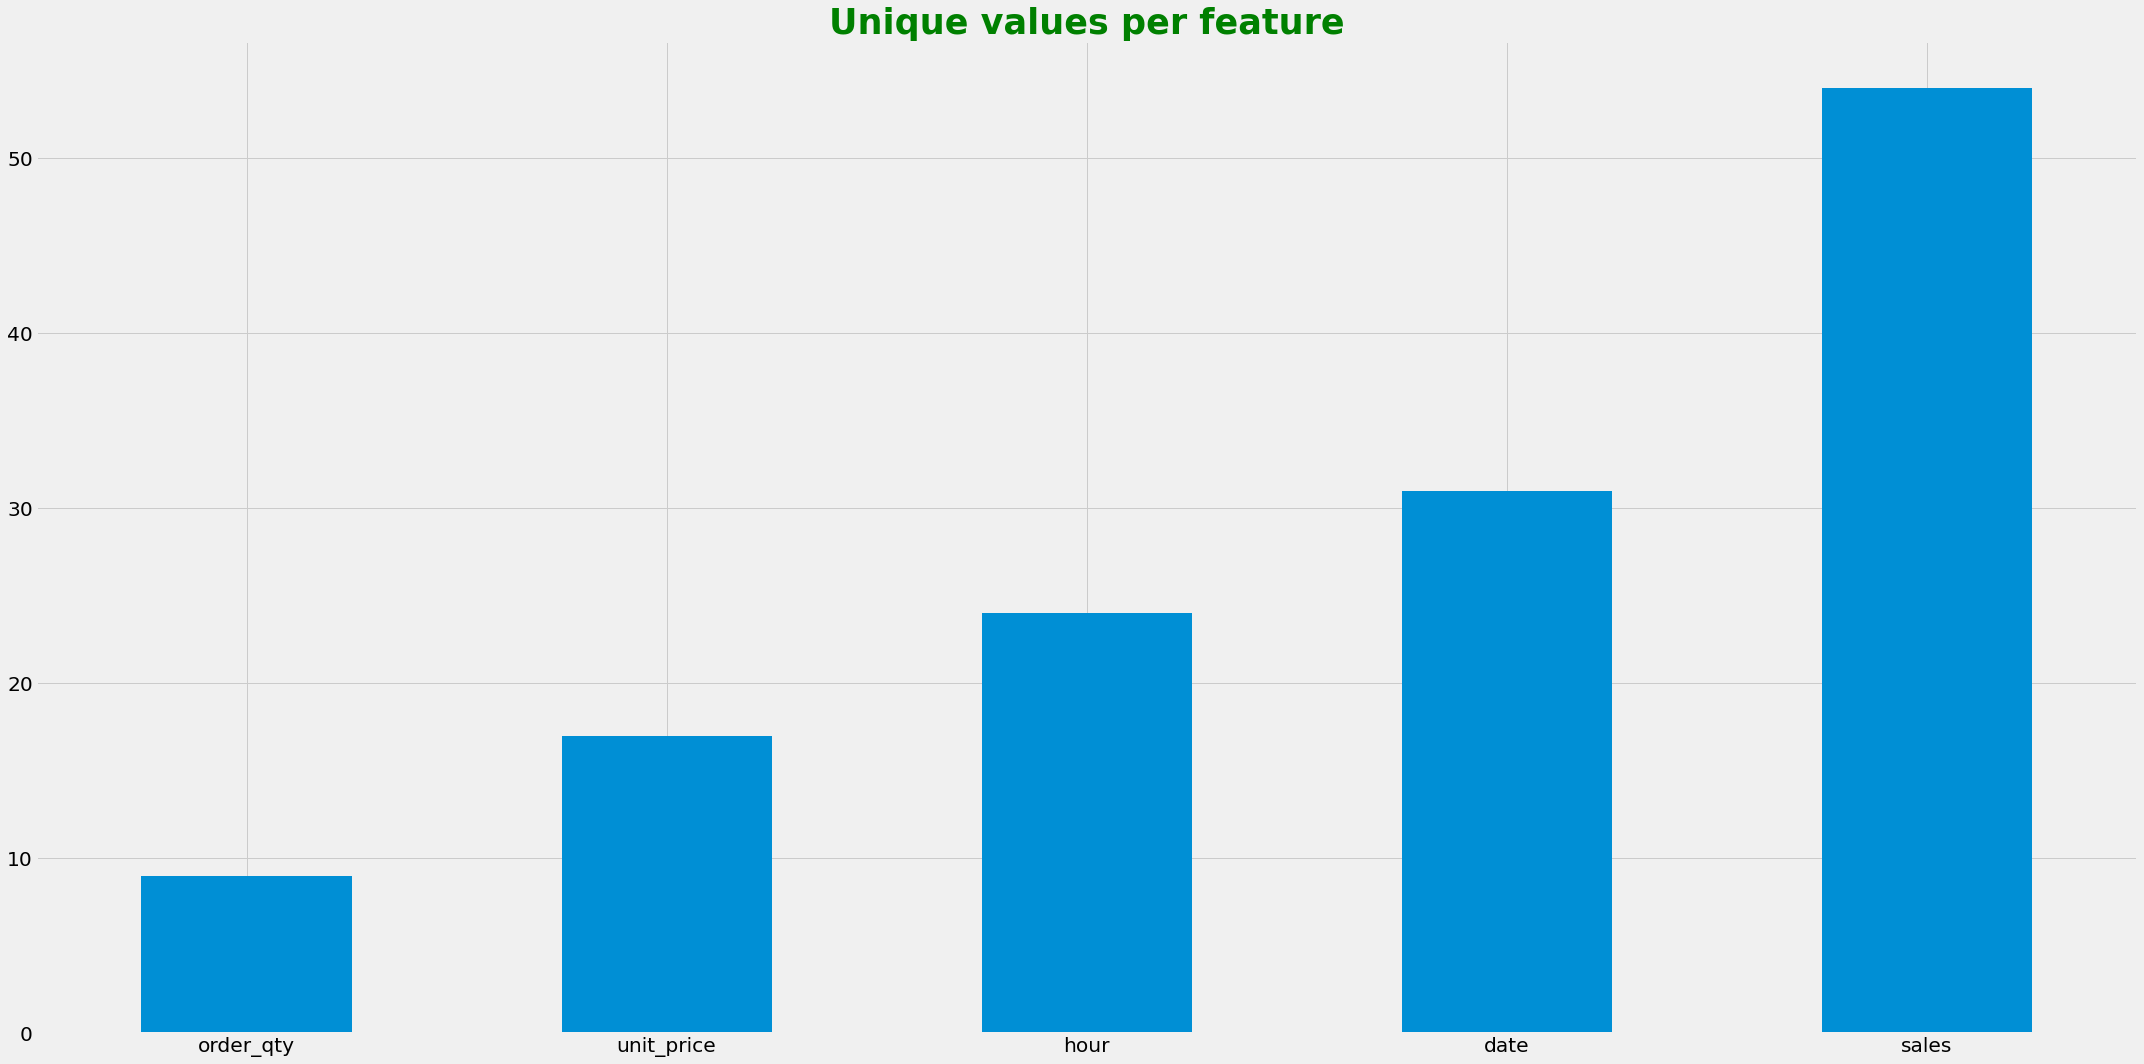

In [52]:
# for each numerical feature compute number of unique entries
unique_values = df.select_dtypes(include="number").nunique().sort_values()

# plot information with y-axis in log-scale
unique_values.plot.bar(logy=False, title="Unique values per feature")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

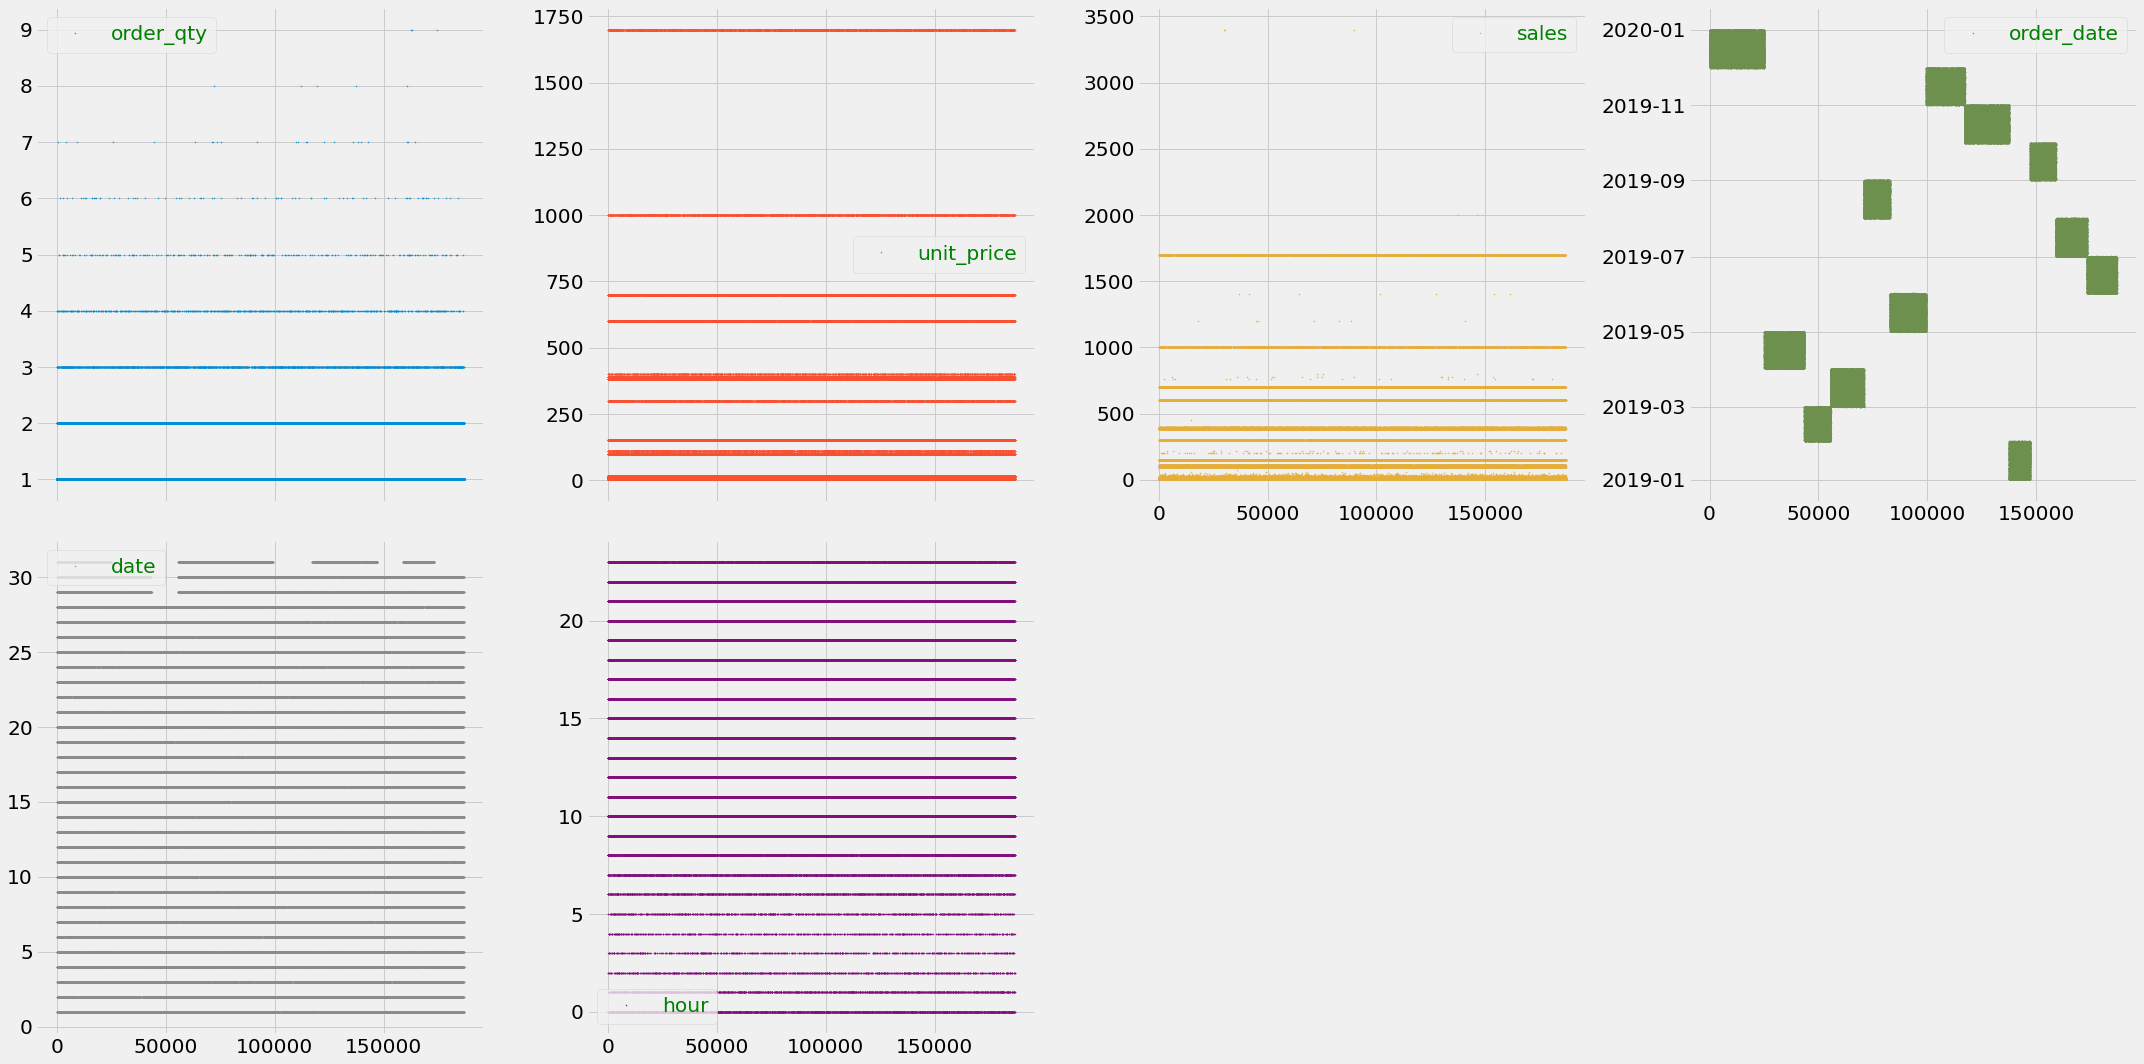

In [53]:
df.plot(lw=0, marker=".", subplots=True, layout=(-1, 4), markersize=1)
plt.tight_layout()
plt.show()

In [54]:
df.describe(exclude=["number", "datetime"])

order_id   category               product      street           city  \
count    185686     185686                185686      185686         185686   
unique   178437          8                    19       46837             10   
top      160873  headphone  USB-C Charging Cable  986 7th St  San Francisco   
freq          5      47672                 21859          14          44662   

         state zipcode quarter      day     month  \
count   185686  185686  185686   185686    185686   
unique       8      10       5        7        12   
top         CA   94016  2019Q4  Tuesday  December   
freq     74226   44662   62737    27137     24944   

                              purchase_address  
count                                   185686  
unique                                  140787  
top     193 Forest St, San Francisco, CA 94016  
freq                                         9

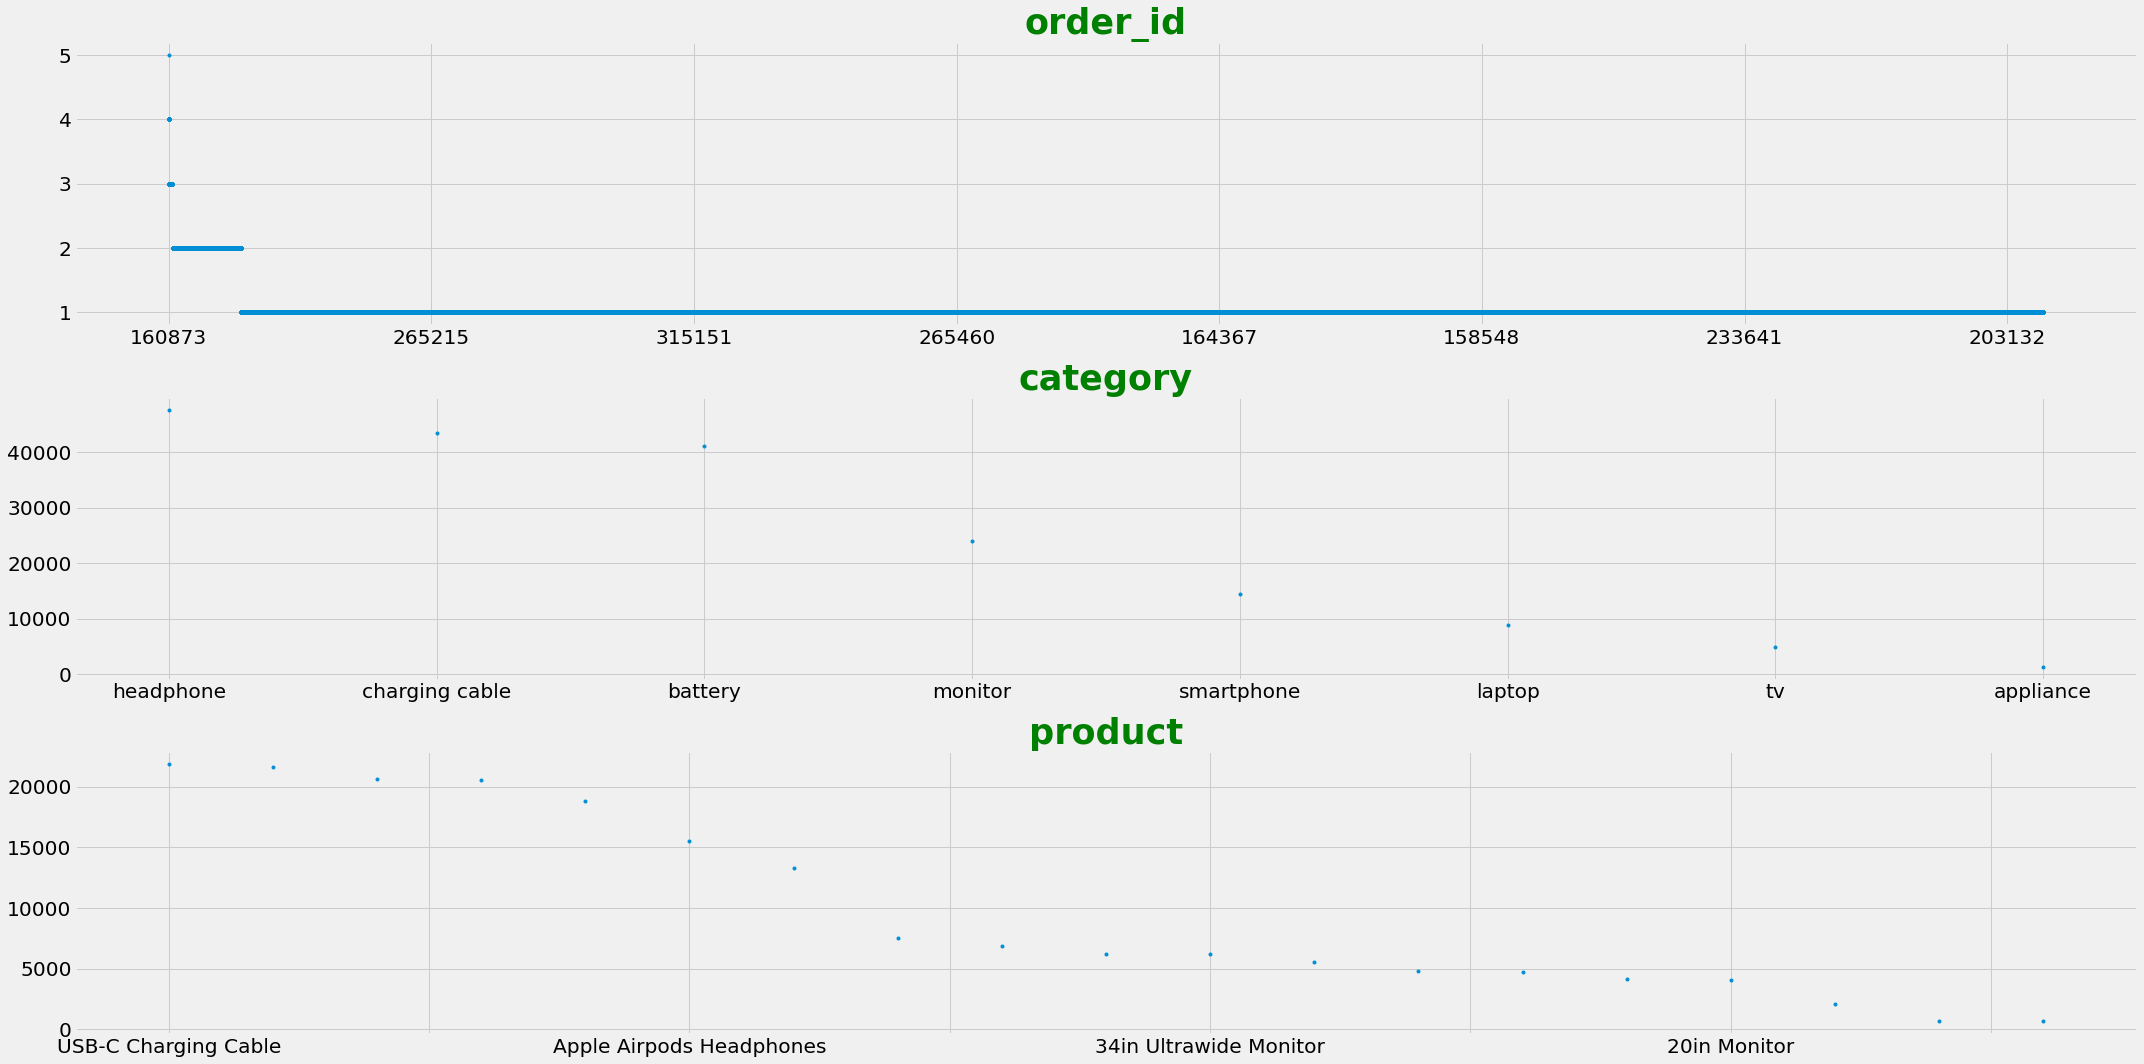

In [55]:
# create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=3)

# identify non-numerical features
df_non_numerical = df.select_dtypes(exclude=["number", "datetime"])

# loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    # selects one single feature and counts number of unique value
    df_non_numerical[col].value_counts().plot(

        # plots this information in a figure with log-scaled y-axis
        logy=False, title=col, lw=0, marker=".", ax=ax)
    
plt.tight_layout()
plt.show()

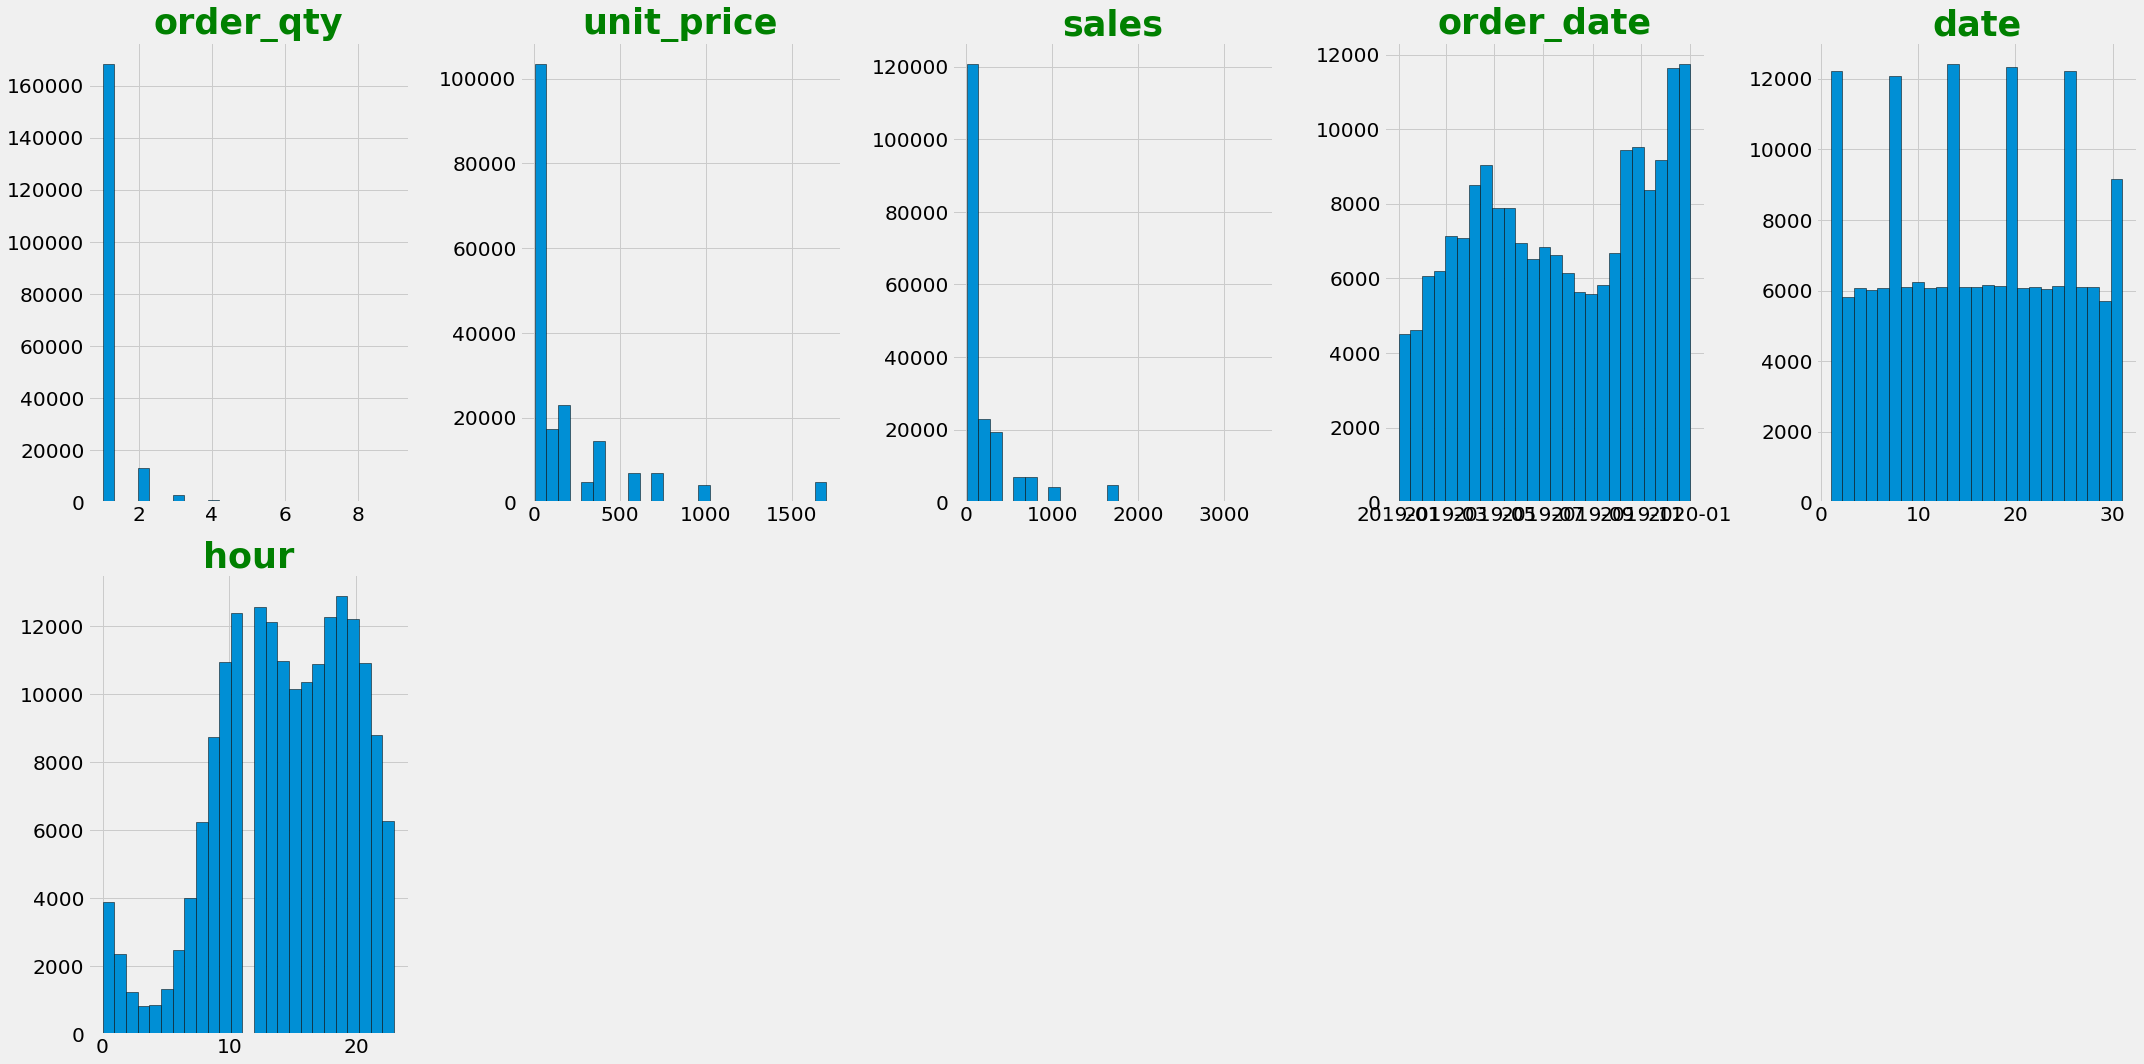

In [56]:
# plots the histogram for each numerical feature in a separate subplot
df.hist(bins=25, layout=(-1, 5), edgecolor="black")
plt.tight_layout()
plt.show()

### client

Gini index = 73.38%


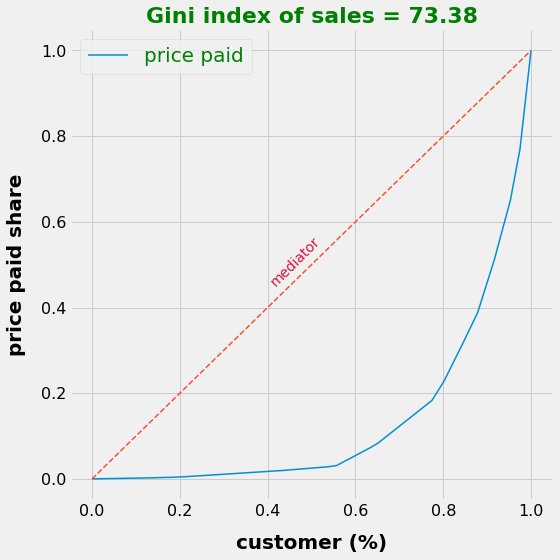

In [57]:
# ensure your arr is sorted from lowest to highest values first!
revenues = df["sales"].values
arr = np.sort(revenues)

def gini(arr):
    count = arr.size
    coefficient = 2 / count
    indexes = np.arange(1, count + 1)
    weighted_sum = (indexes * arr).sum()
    total = arr.sum()
    constant = (count + 1) / count
    return coefficient * weighted_sum / total - constant

def lorenz(arr):
    # this divides the prefix sum by the total sum
    # this ensures all the values are between 0 and 1.0
    scaled_prefix_sum = arr.cumsum() / arr.sum()
    # this prepends the 0 value (because 0% of all people have 0% of all wealth)
    return np.insert(scaled_prefix_sum, 0, 0)

# show the gini index!
print(f"Gini index = {(gini(arr)*100).round(2)}%")

plt.figure(figsize=(8,8))
lorenz_curve = lorenz(arr)

# we need the X values to be between 0.0 to 1.0
plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve)
# plot the straight line perfect equality curve
plt.plot([0,1], [0,1], linestyle="--", label="mediator")
plt.text(0.4, 0.45, "mediator", fontsize=14, rotation=45, color="crimson")
plt.title("Gini index of sales = %s" % ((gini(arr)*100).round(2)), fontsize=22)
plt.ylabel("price paid share", fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel("customer (%)", fontsize=20)
plt.xticks(fontsize=16)
label = ["price paid"]
plt.legend(label, prop={"size":20})
plt.tight_layout()
plt.show()

In [58]:
client_expense = df.groupby(["order_id"])[["order_qty", "sales"]].sum().rename(columns={"order_qty":"basket_size", "sales":"total_expense"})
client_checkout = df["order_id"].value_counts().to_frame().rename(columns={"order_id":"nb_checkout"})

client_info = client_expense.join(client_checkout)
client_info = client_info[["nb_checkout", "basket_size", "total_expense"]]

# play around
client_info.sort_values(by="total_expense", ascending=False).head()

nb_checkout  basket_size  total_expense
order_id                                         
181069              2            3        3779.99
210292              1            2        3400.00
200528              1            2        3400.00
181544              1            2        3400.00
307153              2            2        2699.99

### price

In [59]:
price_asset = df.groupby("unit_price")[["order_qty", "sales"]].sum().rename(columns={"sales":"revenues"})
price_asset["order_qty%"] = ((price_asset["order_qty"] / price_asset["order_qty"].sum()) * 100).round(2)
price_asset["revenues%"] = ((price_asset["revenues"] / price_asset["revenues"].sum()) * 100).round(2)

price_freq = df["unit_price"].value_counts().to_frame().rename(columns={"unit_price":"price_count"})
price_freq["price_count%"] = ((price_freq["price_count"] / price_freq["price_count"].sum()) * 100).round(2)

price_info = price_asset.join(price_freq)
price_info = price_info[["price_count", "price_count%", "order_qty", "order_qty%", "revenues", "revenues%"]]

# play around
price_info.sort_values(by="unit_price", ascending=True)

price_count  price_count%  order_qty  order_qty%    revenues  \
unit_price                                                                 
2.99              20612         11.10      30986       14.84    92648.14   
3.84              20558         11.07      27615       13.22   106041.60   
11.95             21859         11.77      23931       11.46   285975.45   
11.99             18849         10.15      20524        9.83   246082.76   
14.95             21610         11.64      23169       11.10   346376.55   
99.99             13298          7.16      13430        6.43  1342865.70   
109.99             4098          2.21       4126        1.98   453818.74   
149.99             7498          4.04       7541        3.61  1131074.59   
150.00            15525          8.36      15637        7.49  2345550.00   
300.00             4794          2.58       4813        2.30  1443900.00   
379.99             6174          3.32       6192        2.97  2352898.08   
389.99             6225          3.35       6239        2.99  2433147.61   
400.00             2065          1.11       2068        0.99   827200.00   
600.00             6834          3.68       6841        3.28  4104600.00   
700.00             6840          3.68       6847        3.28  4792900.00   
999.99             4126          2.22       4128        1.98  4127958.72   
1700.00            4721          2.54       4725        2.26  8032500.00   

            revenues%  
unit_price             
2.99             0.27  
3.84             0.31  
11.95            0.83  
11.99            0.71  
14.95            1.00  
99.99            3.90  
109.99           1.32  
149.99           3.28  
150.00           6.81  
300.00           4.19  
379.99           6.83  
389.99           7.06  
400.00           2.40  
600.00          11.91  
700.00          13.91  
999.99          11.98  
1700.00         23.31

### product

In [60]:
product_asset = df.groupby("product")[["order_qty", "sales"]].sum().round(2)
product_asset["order_qty%"] = ((product_asset["order_qty"] / product_asset["order_qty"].sum()) * 100).round(2)
product_asset["sales%"] = ((product_asset["sales"] / product_asset["sales"].sum()) * 100).round(2)

product_freq = df["product"].value_counts().to_frame().rename(columns={"product":"product_count"})
product_freq["product_count%"] = ((product_freq["product_count"] / product_freq["product_count"].sum()) * 100).round(2)

product_price = df[["product", "unit_price"]].drop_duplicates().copy()

product_info = product_asset.join(product_freq)
product_info = pd.merge(product_info, product_price, how="left", on="product")

product_info = product_info[["product", "unit_price", "product_count", "product_count%", "order_qty", "order_qty%", "sales", "sales%"]]
product_info["rank"] = product_info["sales%"].rank().astype(int)

# subset
product_info.sort_values(by="sales", ascending=False)

product  unit_price  product_count  product_count%  \
13          Macbook Pro Laptop     1700.00           4721            2.54   
17                      iPhone      700.00           6840            3.68   
14             ThinkPad Laptop      999.99           4126            2.22   
9                 Google Phone      600.00           5522            2.97   
1       27in 4K Gaming Monitor      389.99           6225            3.35   
3       34in Ultrawide Monitor      379.99           6174            3.32   
6     Apple Airpods Headphones      150.00          15525            8.36   
8                Flatscreen TV      300.00           4794            2.58   
7   Bose SoundSport Headphones       99.99          13298            7.16   
2             27in FHD Monitor      149.99           7498            4.04   
18            other smartphone      400.00           2065            1.11   
0                 20in Monitor      109.99           4098            2.21   
11          LG Washing Machine      600.00            666            0.36   
10                    LG Dryer      600.00            646            0.35   
12    Lightning Charging Cable       14.95          21610           11.64   
15        USB-C Charging Cable       11.95          21859           11.77   
16            Wired Headphones       11.99          18849           10.15   
4        AA Batteries (4-pack)        3.84          20558           11.07   
5       AAA Batteries (4-pack)        2.99          20612           11.10   

    order_qty  order_qty%       sales  sales%  rank  
13       4725        2.26  8032500.00   23.31    19  
17       6847        3.28  4792900.00   13.91    18  
14       4128        1.98  4127958.72   11.98    17  
9        5529        2.65  3317400.00    9.63    16  
1        6239        2.99  2433147.61    7.06    15  
3        6192        2.97  2352898.08    6.83    14  
6       15637        7.49  2345550.00    6.81    13  
8        4813        2.30  1443900.00    4.19    12  
7       13430        6.43  1342865.70    3.90    11  
2        7541        3.61  1131074.59    3.28    10  
18       2068        0.99   827200.00    2.40     9  
0        4126        1.98   453818.74    1.32     8  
11        666        0.32   399600.00    1.16     7  
10        646        0.31   387600.00    1.12     6  
12      23169       11.10   346376.55    1.00     5  
15      23931       11.46   285975.45    0.83     4  
16      20524        9.83   246082.76    0.71     3  
4       27615       13.22   106041.60    0.31     2  
5       30986       14.84    92648.14    0.27     1

### category

In [61]:
category_asset = df.groupby("category")[["order_qty", "sales"]].sum().round(2)
category_asset["order_qty%"] = ((category_asset["order_qty"] / category_asset["order_qty"].sum()) * 100).round(2)
category_asset["sales%"] = ((category_asset["sales"] / category_asset["sales"].sum()) * 100).round(2)

category_freq = df["category"].value_counts().to_frame().rename(columns={"category":"category_count"})
category_freq["category_count%"] = ((category_freq["category_count"] / category_freq["category_count"].sum()) * 100).round(2)

category_info = category_asset.join(category_freq)

category_info = category_info.reset_index()[["category", "category_count", "category_count%", "order_qty", "order_qty%", "sales", "sales%"]]

# subset
category_info.sort_values(by="order_qty", ascending=False)

category  category_count  category_count%  order_qty  order_qty%  \
1         battery           41170            22.17      58601       28.06   
3       headphone           47672            25.67      49591       23.75   
2  charging cable           43469            23.41      47100       22.56   
5         monitor           23995            12.92      24098       11.54   
6      smartphone           14427             7.77      14444        6.92   
4          laptop            8847             4.76       8853        4.24   
7              tv            4794             2.58       4813        2.30   
0       appliance            1312             0.71       1312        0.63   

         sales  sales%  
1    198689.74    0.58  
3   3934498.46   11.42  
2    632352.00    1.83  
5   6370939.02   18.48  
6   8937500.00   25.93  
4  12160458.72   35.28  
7   1443900.00    4.19  
0    787200.00    2.28

### city

In [62]:
city_asset = df.groupby("city")[["order_qty", "sales"]].sum().round(2)
city_asset["order_qty%"] = ((city_asset["order_qty"] / city_asset["order_qty"].sum()) * 100).round(2)
city_asset["sales%"] = ((city_asset["sales"] / city_asset["sales"].sum()) * 100).round(2)

city_freq = df["city"].value_counts().to_frame().rename(columns={"city":"city_count"})
city_freq["city_count%"] = ((city_freq["city_count"] / city_freq["city_count"].sum()) * 100).round(2)

city_info = city_asset.join(city_freq)
city_info = city_info[["city_count", "city_count%", "order_qty", "order_qty%", "sales", "sales%"]]

# subset
city_info

city_count  city_count%  order_qty  order_qty%       sales  \
city                                                                        
Atlanta             14863         8.00      16584        7.94  2794199.07   
Austin               9890         5.33      11137        5.33  1818044.33   
Boston              19901        10.72      22494       10.77  3658627.65   
Dallas              14797         7.97      16707        8.00  2765373.96   
Los Angeles         29564        15.92      33247       15.92  5448304.28   
New York City       24847        13.38      27903       13.36  4661867.14   
Portland (ME)        2451         1.32       2746        1.32   449321.38   
Portland (OR)        9998         5.38      11291        5.41  1870010.56   
San Francisco       44662        24.05      50169       24.03  8254743.55   
Seattle             14713         7.92      16534        7.92  2745046.02   

               sales%  
city                   
Atlanta          8.11  
Austin           5.27  
Boston          10.62  
Dallas           8.02  
Los Angeles     15.81  
New York City   13.53  
Portland (ME)    1.30  
Portland (OR)    5.43  
San Francisco   23.95  
Seattle          7.96

### dates

In [63]:
# month
month_asset = df.groupby("month")[["order_qty", "sales"]].sum().round(2).rename(columns={"sales":"revenues"})
month_asset["order_qty%"] = ((month_asset["order_qty"] / month_asset["order_qty"].sum()) * 100).round(2)
month_asset["revenues%"] = ((month_asset["revenues"] / month_asset["revenues"].sum()) * 100).round(2)
month_asset["last_month"] = month_asset["revenues"].shift(1)
month_asset["growth"] = (((month_asset["revenues"] - month_asset["last_month"]) /month_asset["last_month"])*100).round(2)
month_asset["growth%"] = ((month_asset["growth"] / month_asset["growth"].sum()) * 100).round(2)

month_freq = df["month"].value_counts().to_frame().rename(columns={"month":"month_count"})
month_freq["month_count%"] = ((month_freq["month_count"] / month_freq["month_count"].sum()) * 100).round(2)

month_info = month_asset.join(month_freq)
month_info = month_info[["month_count", "month_count%", "order_qty", "order_qty%", "revenues", "revenues%", "last_month", "growth", "growth%"]]

# subset
month_info

month_count  month_count%  order_qty  order_qty%    revenues  \
month                                                                     
January           9699          5.22      10893        5.22  1821413.16   
February         11957          6.44      13431        6.43  2200078.08   
March            15128          8.15      16979        8.13  2804973.35   
April            18257          9.83      20536        9.83  3389217.98   
May              16552          8.91      18653        8.93  3150616.23   
June             13535          7.29      15234        7.30  2576280.15   
July             14275          7.69      16054        7.69  2646461.32   
August           11943          6.43      13429        6.43  2241083.37   
September        11603          6.25      13091        6.27  2094465.69   
October          20249         10.90      22669       10.86  3734777.86   
November         17544          9.45      19769        9.47  3197875.05   
December         24944         13.43      28074       13.44  4608295.70   

           revenues%  last_month  growth  growth%  
month                                              
January         5.28         NaN     NaN      NaN  
February        6.38  1821413.16   20.79    15.66  
March           8.14  2200078.08   27.49    20.71  
April           9.83  2804973.35   20.83    15.69  
May             9.14  3389217.98   -7.04    -5.30  
June            7.47  3150616.23  -18.23   -13.73  
July            7.68  2576280.15    2.72     2.05  
August          6.50  2646461.32  -15.32   -11.54  
September       6.08  2241083.37   -6.54    -4.93  
October        10.84  2094465.69   78.32    59.00  
November        9.28  3734777.86  -14.38   -10.83  
December       13.37  3197875.05   44.10    33.22

In [64]:
# date
date_asset = df.groupby("date")[["order_qty", "sales"]].sum().round(2).rename(columns={"sales":"revenues"})
date_asset["order_qty%"] = ((date_asset["order_qty"] / date_asset["order_qty"].sum()) * 100).round(2)
date_asset["revenues%"] = ((date_asset["revenues"] / date_asset["revenues"].sum()) * 100).round(2)

date_freq = df["date"].value_counts().to_frame().rename(columns={"date":"date_count"})
date_freq["date_count%"] = ((date_freq["date_count"] / date_freq["date_count"].sum()) * 100).round(2)

date_info = date_asset.join(date_freq)
date_info = date_info[["date_count", "date_count%", "order_qty", "order_qty%", "revenues", "revenues%"]]

# subset
date_info

date_count  date_count%  order_qty  order_qty%    revenues  revenues%
date                                                                       
1           6042         3.25       6858        3.28  1164859.49       3.38
2           6187         3.33       6952        3.33  1137215.59       3.30
3           5815         3.13       6530        3.13  1074294.06       3.12
4           6058         3.26       6805        3.26  1163640.17       3.38
5           6015         3.24       6811        3.26  1135007.86       3.29
6           6081         3.27       6771        3.24  1151786.51       3.34
7           6025         3.24       6770        3.24  1093460.78       3.17
8           6065         3.27       6816        3.26  1106530.63       3.21
9           6100         3.29       6822        3.27  1169049.22       3.39
10          6241         3.36       6957        3.33  1168880.92       3.39
11          6060         3.26       6752        3.23  1167460.67       3.39
12          6086         3.28       6916        3.31  1108765.36       3.22
13          6291         3.39       7097        3.40  1136428.04       3.30
14          6126         3.30       6904        3.31  1133735.76       3.29
15          6106         3.29       6790        3.25  1115556.91       3.24
16          6109         3.29       6890        3.30  1098952.09       3.19
17          6165         3.32       6960        3.33  1138569.63       3.30
18          6132         3.30       6832        3.27  1163342.14       3.38
19          6184         3.33       6999        3.35  1098082.38       3.19
20          6144         3.31       6919        3.31  1143969.50       3.32
21          6085         3.28       6859        3.28  1121199.18       3.25
22          6101         3.29       6878        3.29  1139204.57       3.31
23          6041         3.25       6806        3.26  1089079.93       3.16
24          6141         3.31       6903        3.31  1120851.96       3.25
25          6054         3.26       6794        3.25  1166707.99       3.39
26          6150         3.31       7010        3.36  1135988.62       3.30
27          6108         3.29       6822        3.27  1127447.34       3.27
28          6093         3.28       6855        3.28  1119014.81       3.25
29          5709         3.07       6412        3.07  1082839.03       3.14
30          5623         3.03       6310        3.02  1039032.63       3.01
31          3549         1.91       4012        1.92   654584.17       1.90

In [65]:
# day
day_asset = df.groupby("day")[["order_qty", "sales"]].sum().round(2).rename(columns={"sales":"revenues"})
day_asset["order_qty%"] = ((day_asset["order_qty"] / day_asset["order_qty"].sum()) * 100).round(2)
day_asset["revenues%"] = ((day_asset["revenues"] / day_asset["revenues"].sum()) * 100).round(2)

day_freq = df["day"].value_counts().to_frame().rename(columns={"day":"day_count"})
day_freq["day_count%"] = ((day_freq["day_count"] / day_freq["day_count"].sum()) * 100).round(2)

day_info = day_asset.join(day_freq)
day_info = day_info[["day_count", "day_count%", "order_qty", "order_qty%", "revenues", "revenues%"]]

# subset
day_info

day_count  day_count%  order_qty  order_qty%    revenues  revenues%
day                                                                           
Sunday         26518       14.28      29745       14.24  4927249.40      14.30
Monday         26508       14.28      29860       14.30  4877588.21      14.15
Tuesday        27137       14.61      30686       14.70  5086275.40      14.76
Wednesday      26438       14.24      29759       14.25  4986823.36      14.47
Thursday       26418       14.23      29618       14.18  4833763.73      14.02
Friday         26214       14.12      29415       14.09  4853642.26      14.08
Saturday       26453       14.25      29729       14.24  4900195.58      14.22

In [66]:
# quarter
quarter_asset = df.groupby("quarter")[["order_qty", "sales"]].sum().round(2).rename(columns={"sales":"revenues"})
quarter_asset["order_qty%"] = ((quarter_asset["order_qty"] / quarter_asset["order_qty"].sum()) * 100).round(2)
quarter_asset["revenues%"] = ((quarter_asset["revenues"] / quarter_asset["revenues"].sum()) * 100).round(2)
quarter_asset["last_month"] = quarter_asset["revenues"].shift(1)
quarter_asset["growth"] = (((quarter_asset["revenues"] - quarter_asset["last_month"]) /quarter_asset["last_month"])*100).round(2)

quarter_freq = df["quarter"].value_counts().to_frame().rename(columns={"quarter":"quarter_count"})
quarter_freq["quarter_count%"] = ((quarter_freq["quarter_count"] / quarter_freq["quarter_count"].sum()) * 100).round(2)

quarter_info = quarter_asset.join(quarter_freq)
quarter_info = quarter_info[["quarter_count", "order_qty", "revenues", "quarter_count%", "order_qty%", "revenues%", "growth", "last_month"]]

# subset
quarter_info.drop(quarter_info.tail(1).index,inplace=True)
quarter_info

quarter_count  order_qty     revenues  quarter_count%  order_qty%  \
quarter                                                                      
2019Q1           36750      41262   6817794.30           19.79       19.76   
2019Q2           48344      54423   9116114.36           26.04       26.06   
2019Q3           37821      42574   6982010.38           20.37       20.39   
2019Q4           62737      70512  11540948.61           33.79       33.77   

         revenues%  growth  last_month  
quarter                                 
2019Q1       19.78     NaN         NaN  
2019Q2       26.45   33.71  6817794.30  
2019Q3       20.26  -23.41  9116114.36  
2019Q4       33.49   65.30  6982010.38

In [67]:
# hour
hour_asset = df.groupby("hour")[["order_qty", "sales"]].sum().round(2).rename(columns={"sales":"revenues"})
hour_asset["order_qty%"] = ((hour_asset["order_qty"] / hour_asset["order_qty"].sum()) * 100).round(2)
hour_asset["revenues%"] = ((hour_asset["revenues"] / hour_asset["revenues"].sum()) * 100).round(2)

hour_freq = df["hour"].value_counts().to_frame().rename(columns={"hour":"hour_count"})
hour_freq["hour_count%"] = ((hour_freq["hour_count"] / hour_freq["hour_count"].sum()) * 100).round(2)

hour_info = hour_asset.join(hour_freq)
hour_info = hour_info[["hour_count", "hour_count%", "order_qty", "order_qty%", "revenues", "revenues%"]]

# subset
hour_info

hour_count  hour_count%  order_qty  order_qty%    revenues  revenues%
hour                                                                       
0           3902         2.10       4420        2.12   713548.66       2.07
1           2347         1.26       2616        1.25   460563.90       1.34
2           1242         0.67       1397        0.67   234839.45       0.68
3            830         0.45        927        0.44   145742.94       0.42
4            852         0.46        935        0.45   162546.07       0.47
5           1320         0.71       1492        0.71   230664.87       0.67
6           2481         1.34       2809        1.35   447963.01       1.30
7           4002         2.16       4547        2.18   744067.32       2.16
8           6252         3.37       6998        3.35  1192309.20       3.46
9           8740         4.71       9808        4.70  1638784.04       4.75
10         10929         5.89      12292        5.89  1942988.08       5.64
11         12392         6.67      13986        6.70  2296619.84       6.66
12         12573         6.77      14188        6.79  2314359.85       6.71
13         12115         6.52      13671        6.55  2152369.98       6.24
14         10965         5.91      12343        5.91  2082513.70       6.04
15         10159         5.47      11375        5.45  1940623.20       5.63
16         10359         5.58      11636        5.57  1902523.20       5.52
17         10884         5.86      12214        5.85  2126553.97       6.17
18         12263         6.60      13785        6.60  2218374.01       6.44
19         12886         6.94      14451        6.92  2411971.14       7.00
20         12218         6.58      13758        6.59  2280784.36       6.62
21         10905         5.87      12228        5.86  2040790.48       5.92
22          8808         4.74       9884        4.73  1606243.85       4.66
23          6262         3.37       7052        3.38  1177792.82       3.42

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## Sales analysis

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### 1. Evolution of turnover over the year

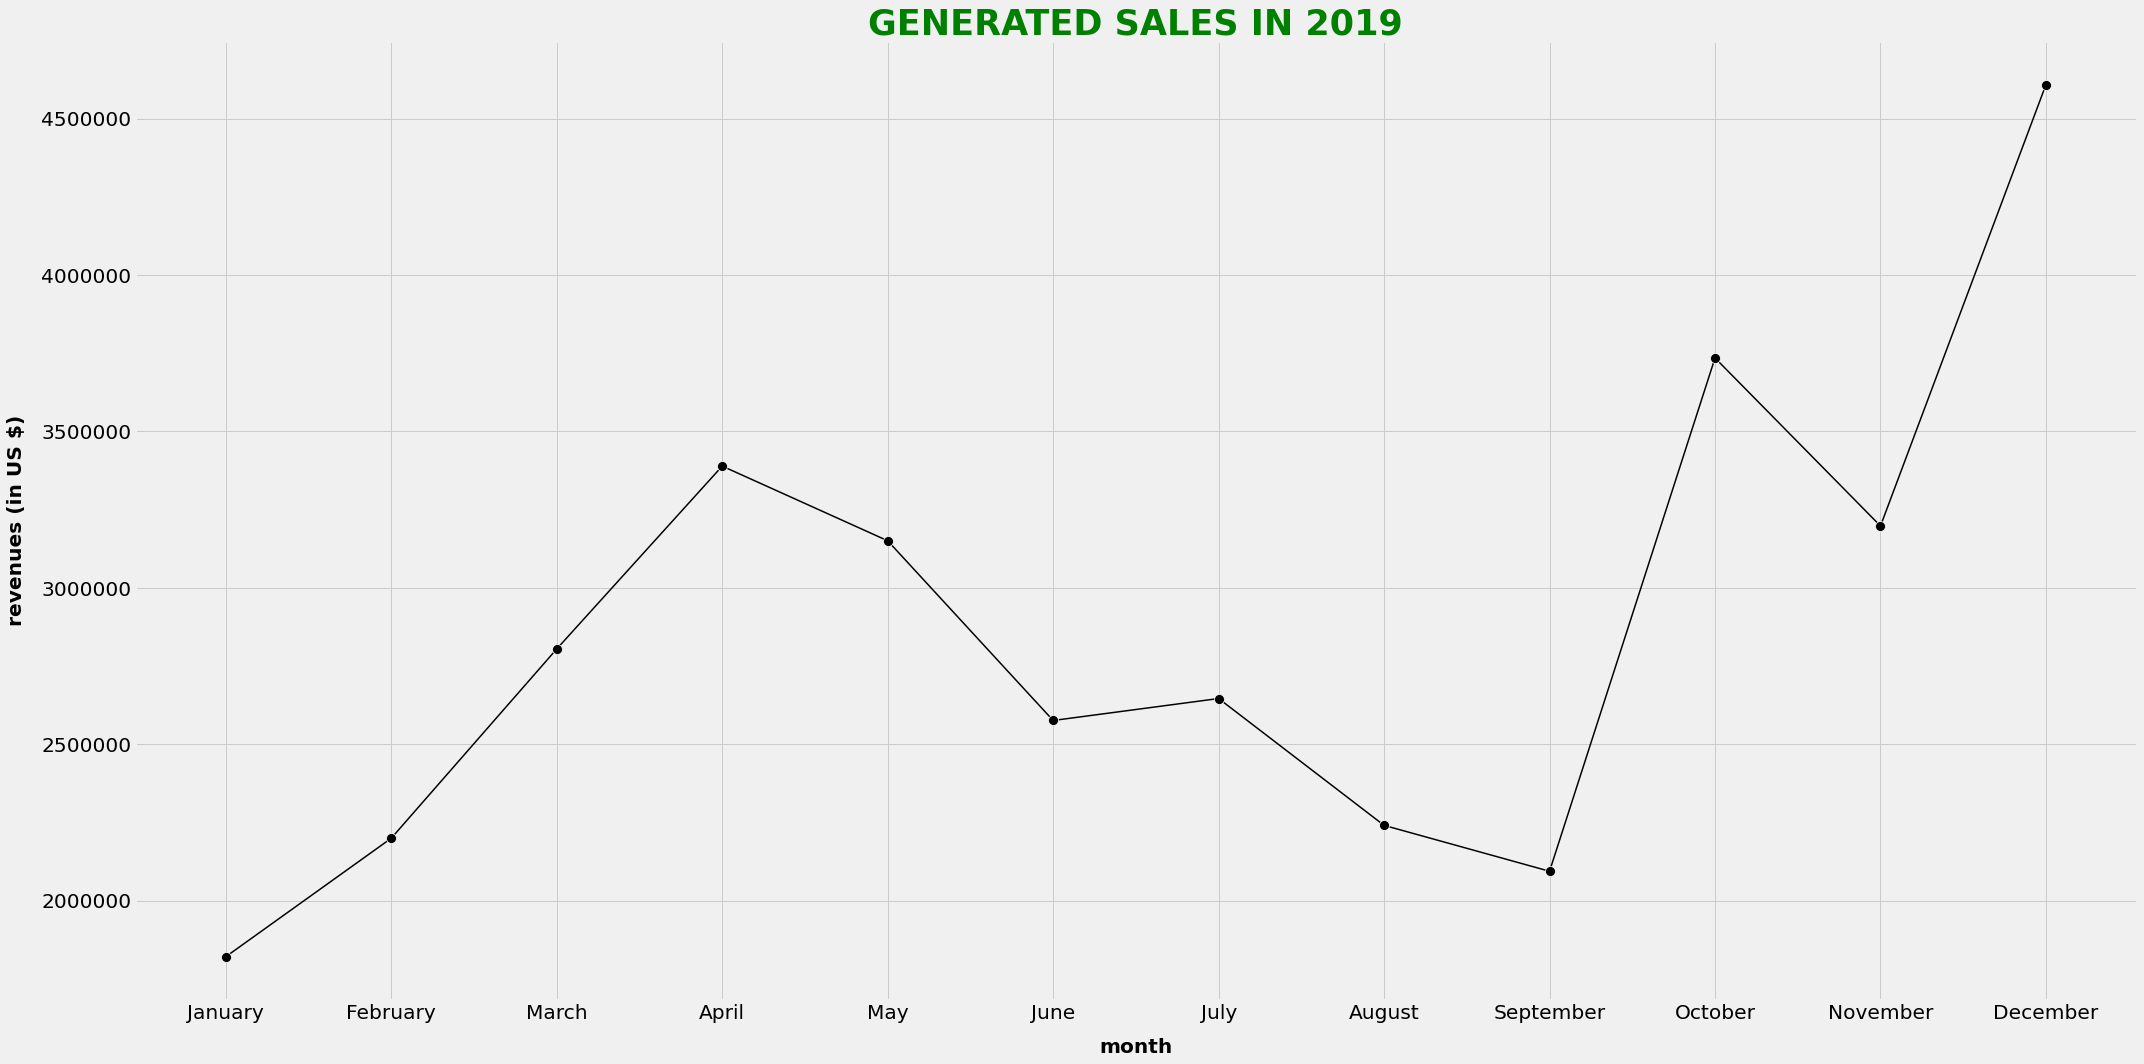

In [68]:
# plot
ax = sns.lineplot(data=month_info, y="revenues", x="month", marker="o", markersize=10, color="black", ci=None)

# configuration
ax.ticklabel_format(style="plain", axis="y")
# plt.axhline(2872128.16, color="red")
# plt.text(5, 2900000, f"average revenues = {str(round(month_info.revenues.mean(),2))}", fontsize=25, color="black")

# parameters
plt.title("GENERATED SALES IN 2019")
plt.ylabel("revenues (in US $)")
plt.tight_layout()
plt.show()

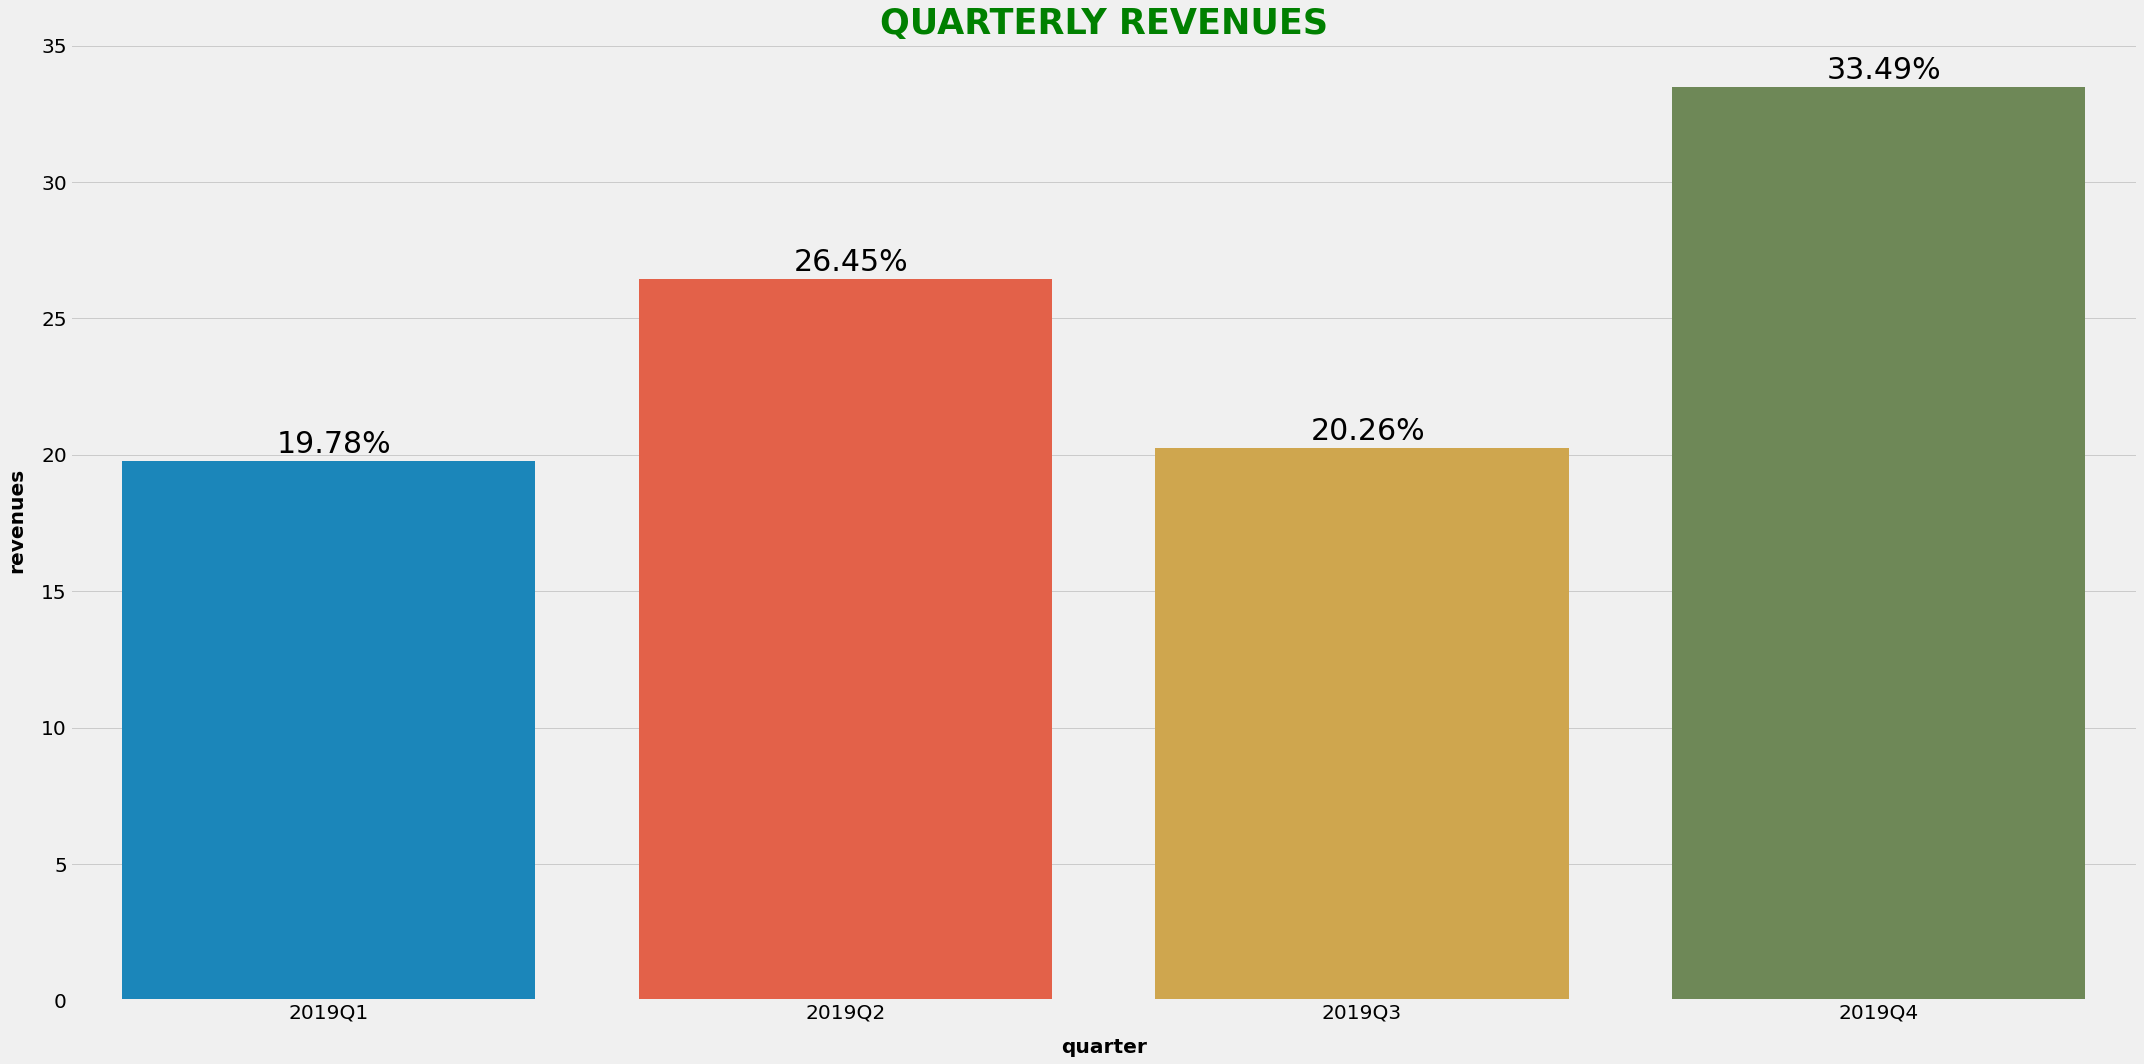

In [69]:
# plot
ax1 = sns.barplot(data=quarter_info, x=quarter_info.index, y="revenues%")

# configuration ax1
ax1.ticklabel_format(style="plain", axis="y")
ax1.set(xlabel="quarter", ylabel="revenues")
for p in ax1.patches:
    ax1.annotate(f"\n{p.get_height()}%", (p.get_x()+0.3, p.get_height()+0.3), color="k", fontsize=30)

# parameters
plt.title("QUARTERLY REVENUES")
plt.tight_layout()
plt.show()

### 2. Key dates

#### A. Best performing month

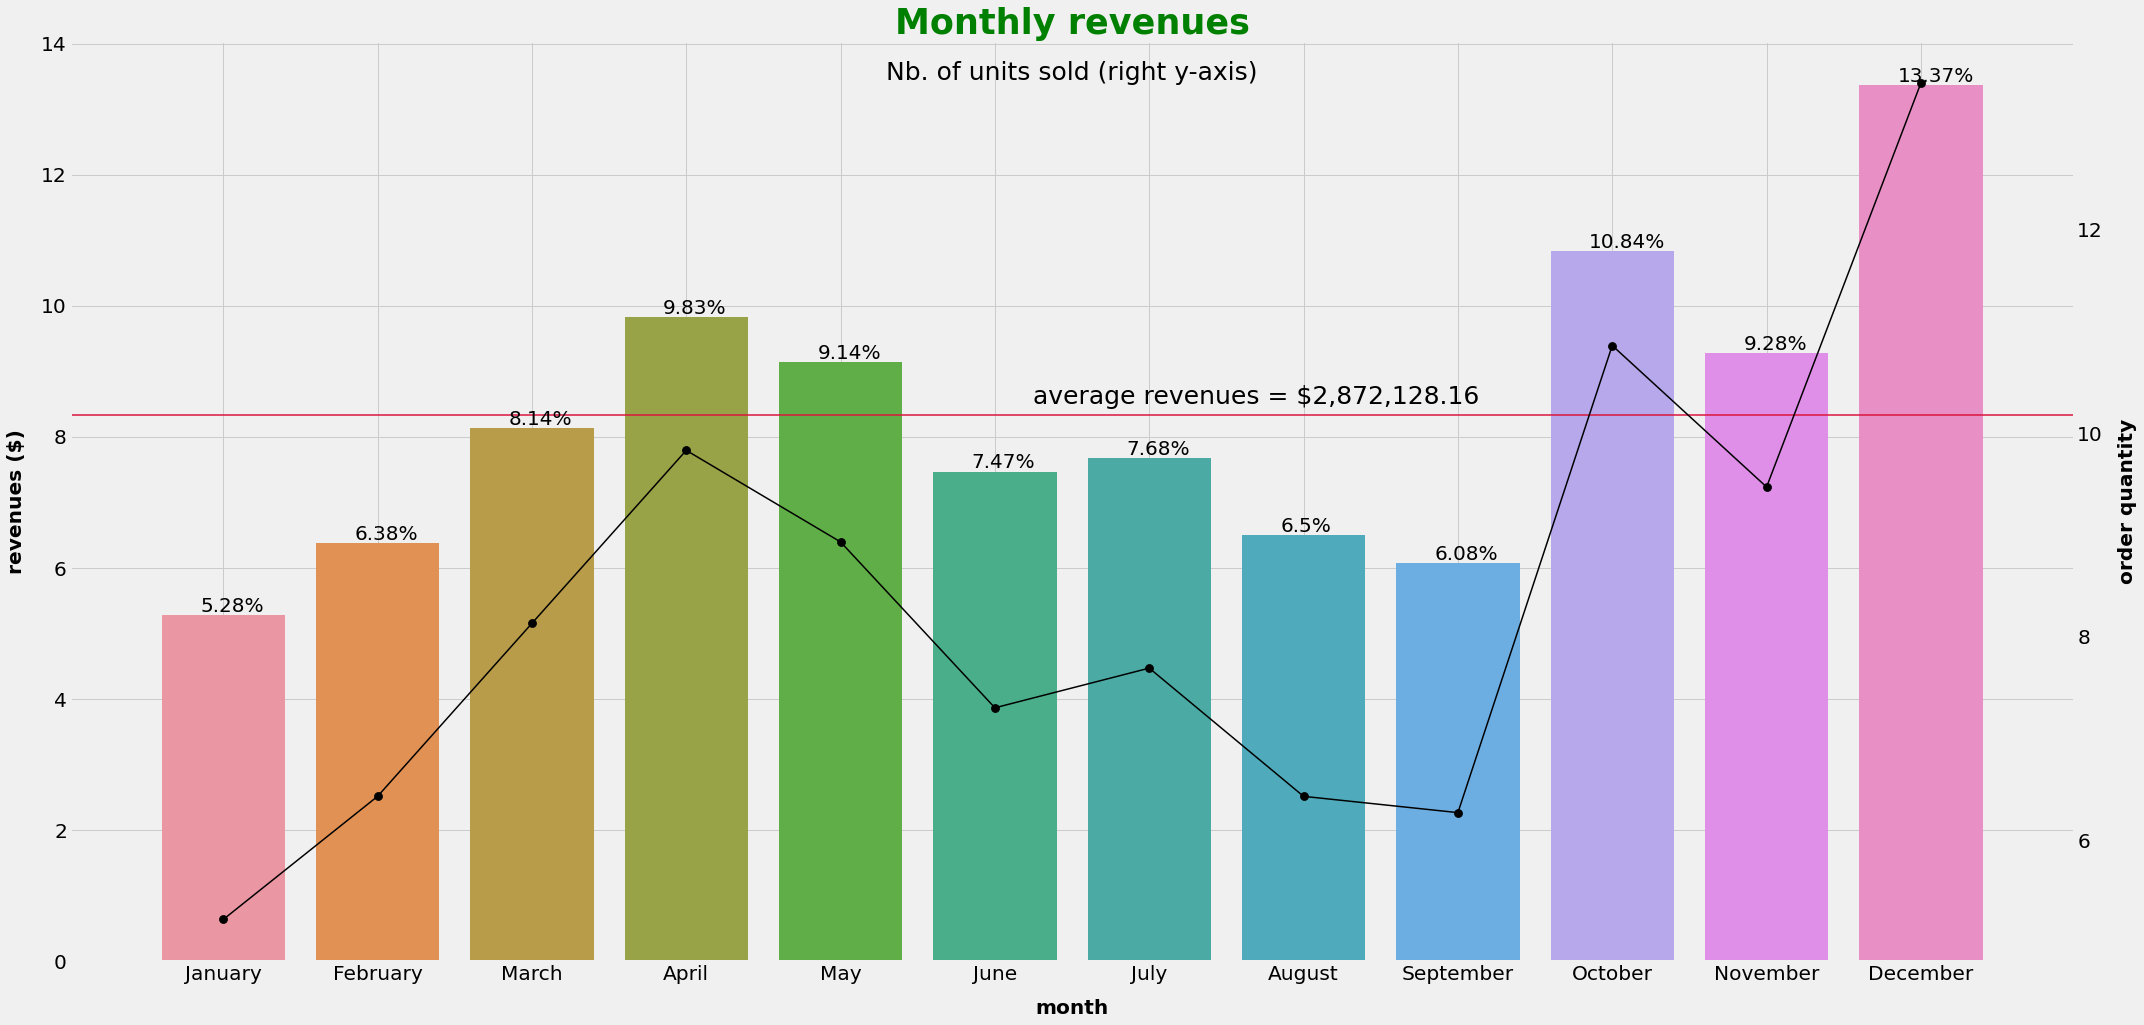

In [70]:
# plot
ax1 = sns.barplot(data=month_info, x=month_info.index, y="revenues%")
ax2 = ax1.twinx()

# plotting
sns.lineplot(data=month_info, x=month_info.index, y="order_qty%", 
             marker="o", markeredgecolor="black", markersize=8,
             color="black", ci=None, ax=ax2)

# configuration ax1
ax1.ticklabel_format(style="plain", axis="y")
ax1.set(xlabel="month", ylabel="revenues ($)")
for p in ax1.patches:
    ax1.annotate(f'\n{p.get_height()}%', (p.get_x()+0.25, p.get_height()+0.05), color="k", fontsize=20)
ax1.axhline(8.33, color="crimson")
ax1.text(5.25, 8.5, f"average revenues = ${month_info['revenues'].mean():,.2f}", fontsize=25, color="black")
ax1.grid(True)
# configuration ax2
ax2.set(ylabel="order quantity")
ax2.grid(False)

# parameters
plt.title("Monthly revenues")
plt.suptitle("Nb. of units sold (right y-axis)", y=0.9, fontsize=25, color="black", x=0.5)
plt.tight_layout()
plt.show()

#### B. Peak times for placing orders

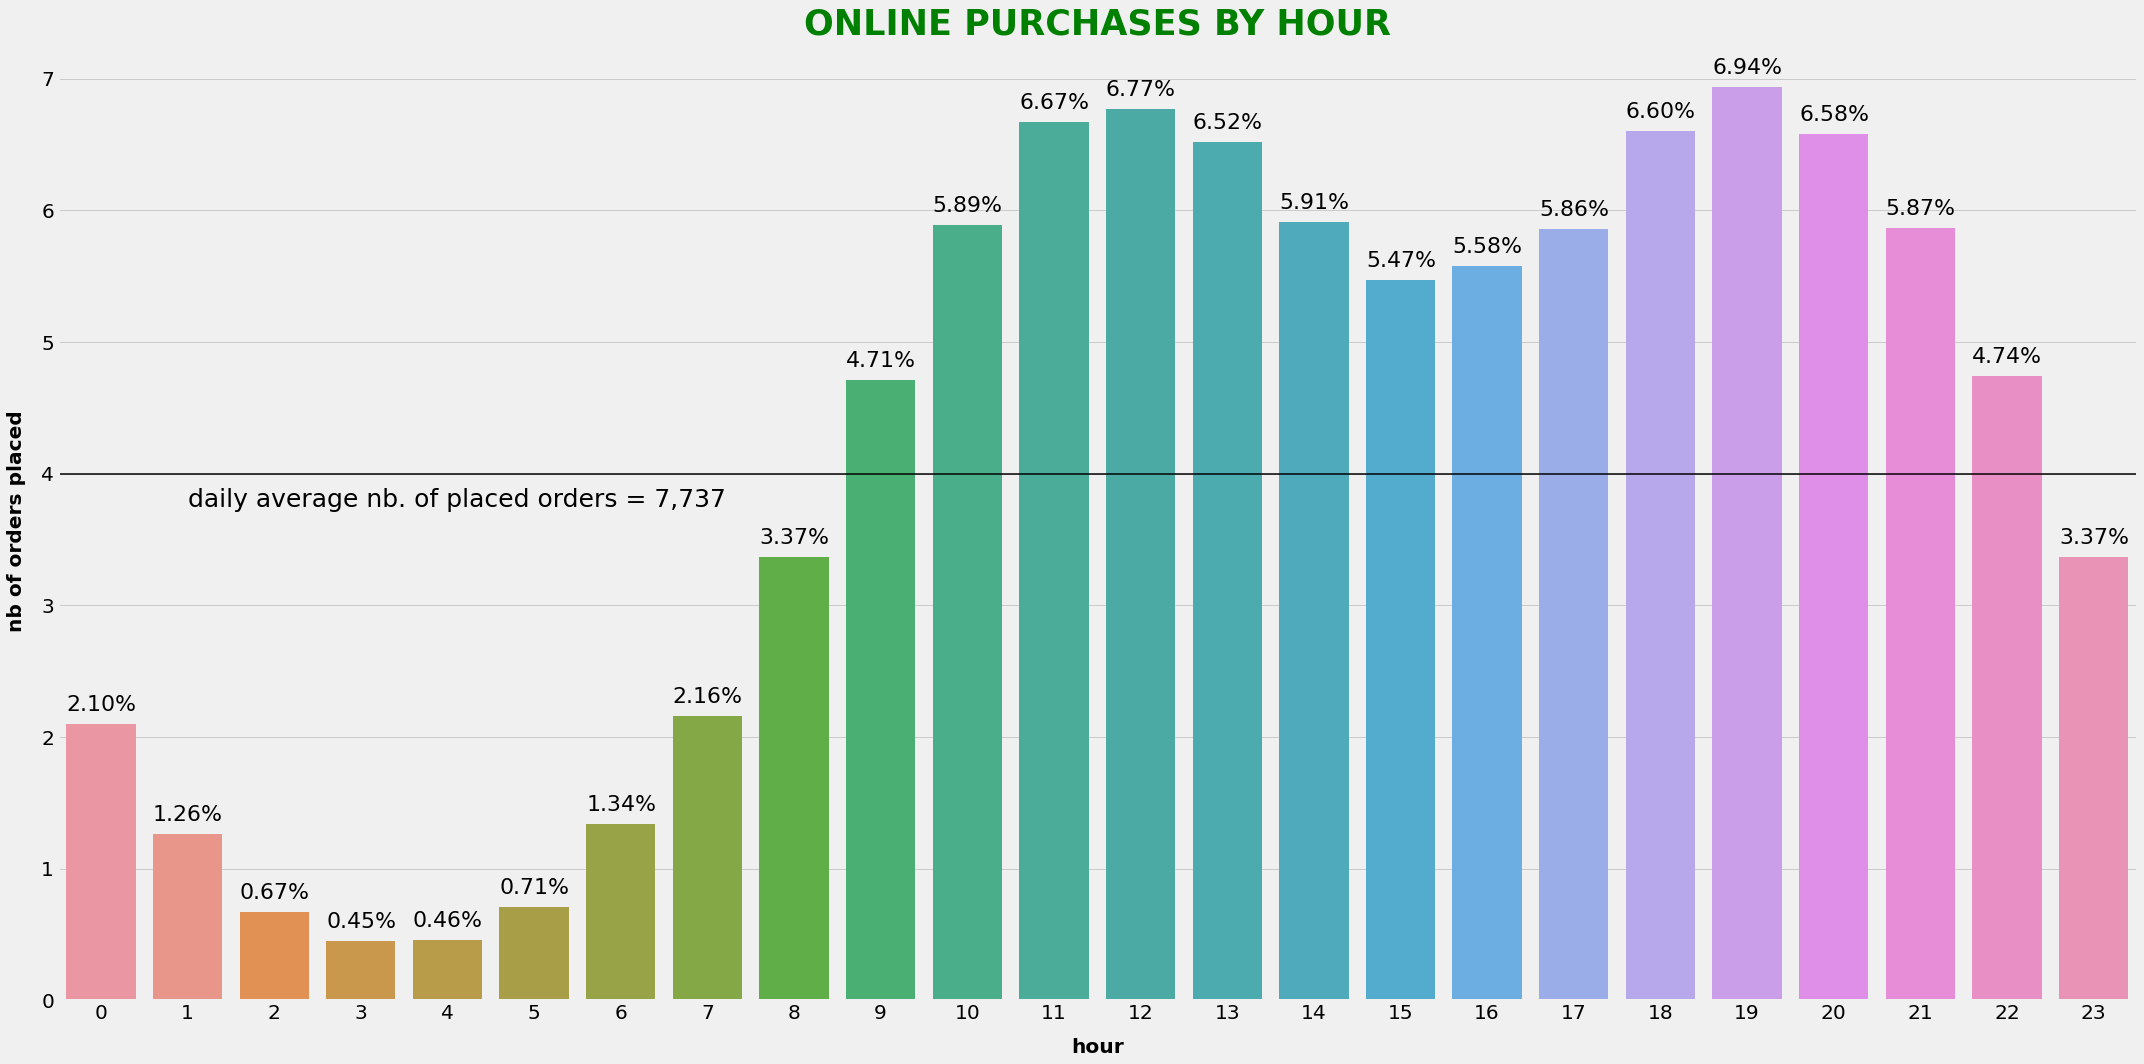

In [71]:
# plot
ax1 = sns.barplot(data=hour_info, x=hour_info.index, y="hour_count%")

# configuration ax1
ax1.ticklabel_format(style="plain", axis="y")
ax1.set(xlabel="hour", ylabel="nb of orders placed", title="ONLINE PURCHASES BY HOUR")
for p in ax1.patches:
    ax1.annotate(f"\n{p.get_height():,.2f}%", (p.get_x()+0, p.get_height()+0.1), color="k", fontsize=22)
plt.axhline(4, color="black")
plt.text(1, 3.75, f"daily average nb. of placed orders = {round(hour_info['hour_count'].mean()):,}", fontsize=25, color="black")

# parameters
plt.tight_layout()
plt.show()

#### C. Best day of the week for online sales

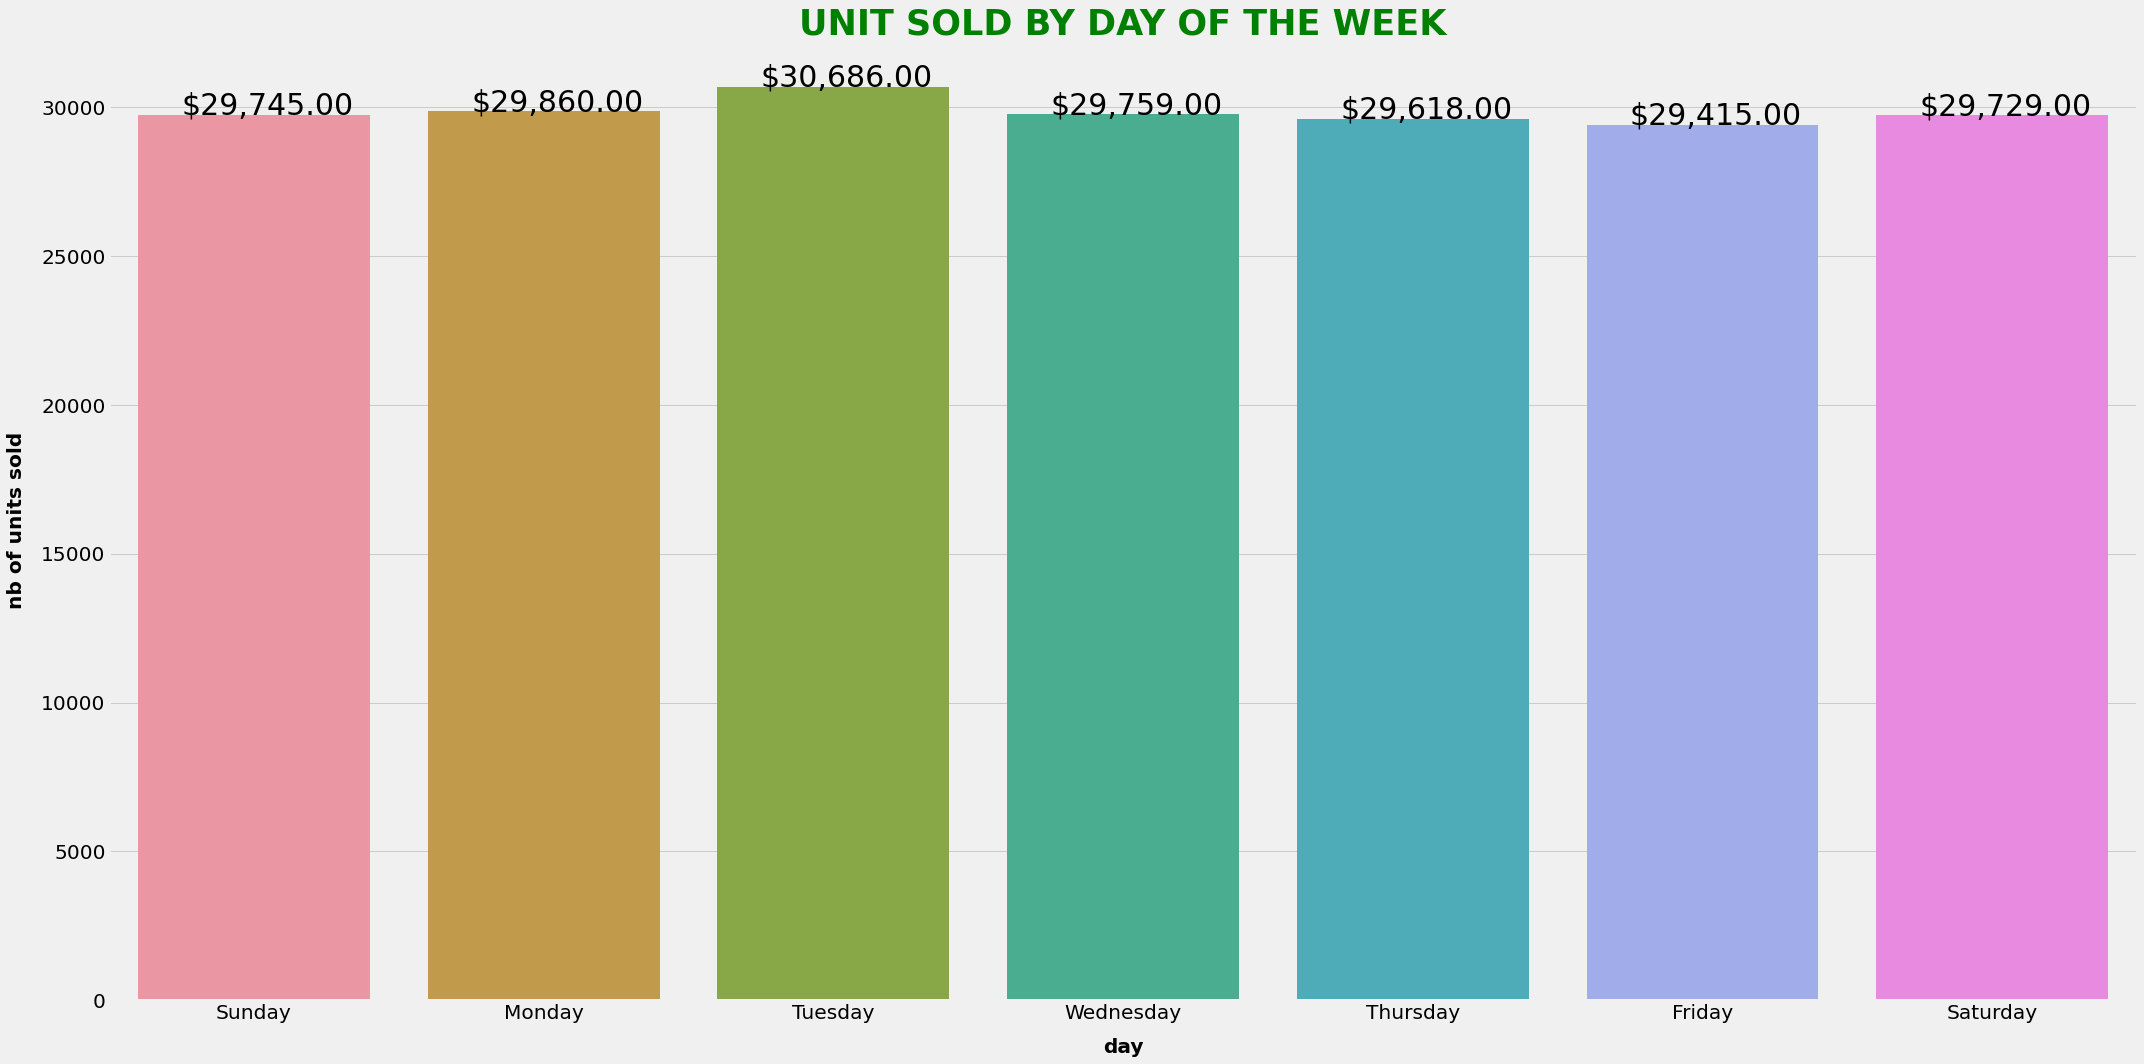

In [72]:
# plot
ax1 = sns.barplot(data=day_info, x=day_info.index, y="order_qty")

# configuration ax1
ax1.ticklabel_format(style="plain", axis="y")
ax1.set(xlabel="day", ylabel="nb of units sold", title="UNIT SOLD BY DAY OF THE WEEK")
for p in ax1.patches:
    ax1.annotate(f"\n${p.get_height():,.2f}", (p.get_x()+0.15, p.get_height()+0.2), color="k", fontsize=30)
# plt.axhline(14, color="black")
# plt.text(0, 13.5, f"average order quantity = {str(round(day_info['order_qty%'].mean()))}", fontsize=25, color="black")

# parameters
plt.tight_layout()
plt.show()

#### D. Monthly sales pattern

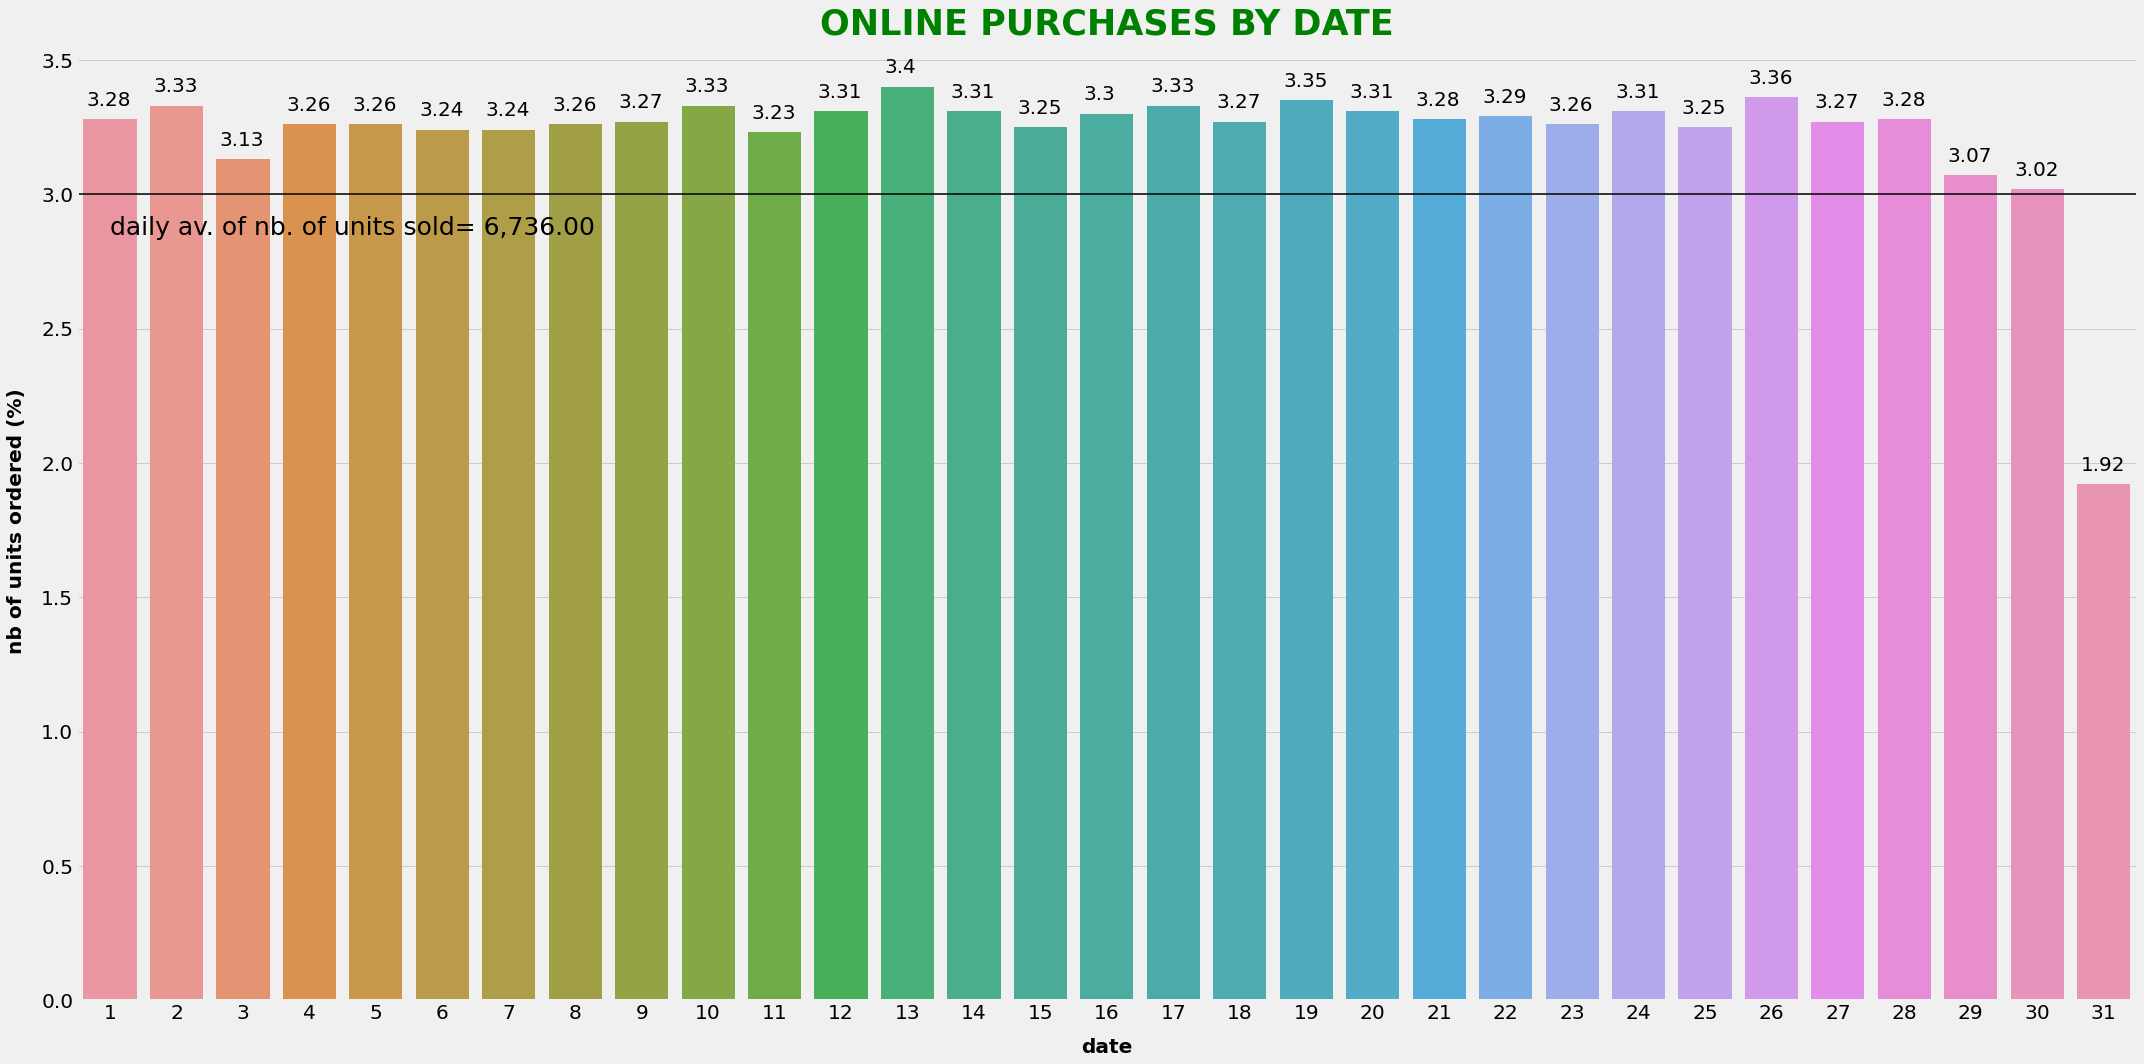

In [73]:
# plot
ax1 = sns.barplot(data=date_info, x=date_info.index, y="order_qty%")

# configuration ax1
ax1.ticklabel_format(style="plain", axis="y")
ax1.set(xlabel="date", ylabel="nb of units ordered (%)", title="ONLINE PURCHASES BY DATE")
for p in ax1.patches:
    ax1.annotate(f"\n{p.get_height()}", (p.get_x()+0.05, p.get_height()+0.05), color="k", fontsize=20)
plt.axhline(3, color="black")
plt.text(0, 2.85, f"daily av. of nb. of units sold= {round(date_info['order_qty'].mean()):,.2f}", fontsize=25, color="black")

# parameters
plt.tight_layout()
plt.show()

### 3. Geographic distribution

In [74]:
# United States of America
maps = folium.Map(location=[38.6993, -99.3849], tiles="OpenStreetMap", zoom_start=4)

# markers
tooltip = "Click here to find out more !"
folium.Marker(location=[43.659222, -70.256523], 
              popup="Portland, <b>Maine</b>", 
              tooltip=tooltip, icon=folium.Icon(icon="info-sign", color="black")).add_to(maps)
folium.Marker(location=[45.512230, -122.658722], 
              popup="Portland, <b>Oregon</b>", 
              tooltip=tooltip, icon=folium.Icon(icon="info-sign", color="black")).add_to(maps)
folium.Marker(location=[33.748997, -84.387985], 
              popup="Atlanta, <b>Georgia</b>", 
              tooltip=tooltip, icon=folium.Icon(icon="info-sign", color="blue")).add_to(maps)
folium.Marker(location=[30.267153, -97.743057], 
              popup="Austin, <b>Texas</b>", 
              tooltip=tooltip, icon=folium.Icon(icon="info-sign", color="red")).add_to(maps)
folium.Marker(location=[42.358990, -71.058632], 
              popup="Boston, <b>Massachusetts</b>", 
              tooltip=tooltip, icon=folium.Icon(icon="info-sign", color="lightgray")).add_to(maps)
folium.Marker(location=[32.776665, -96.796989], 
              popup="Dallas, <b>Texas</b>", 
              tooltip=tooltip, icon=folium.Icon(icon="info-sign", color="orange")).add_to(maps)
folium.Marker(location=[34.052235, -118.243683], 
              popup="Los Angeles, <b>California</b>", 
              tooltip=tooltip, icon=folium.Icon(icon="info-sign", color="purple")).add_to(maps)
folium.Marker(location=[40.712776, -74.005974], 
              popup="New York City, <b>New York</b>", 
              tooltip=tooltip, icon=folium.Icon(icon="info-sign", color="pink")).add_to(maps)
folium.Marker(location=[37.774929, -122.419418], 
              popup="San Francisco, <b>California</b>", 
              tooltip=tooltip, icon=folium.Icon(icon="info-sign", color="green")).add_to(maps)
folium.Marker(location=[47.606209, -122.332069], 
              popup="Seattle, <b>Washington</b>", 
              tooltip=tooltip, icon=folium.Icon(icon="info-sign", color="darkblue")).add_to(maps)


# configuration
# maps.add_child(folium.LatLngPopup())
# help(folium.Icon)

# show
# maps

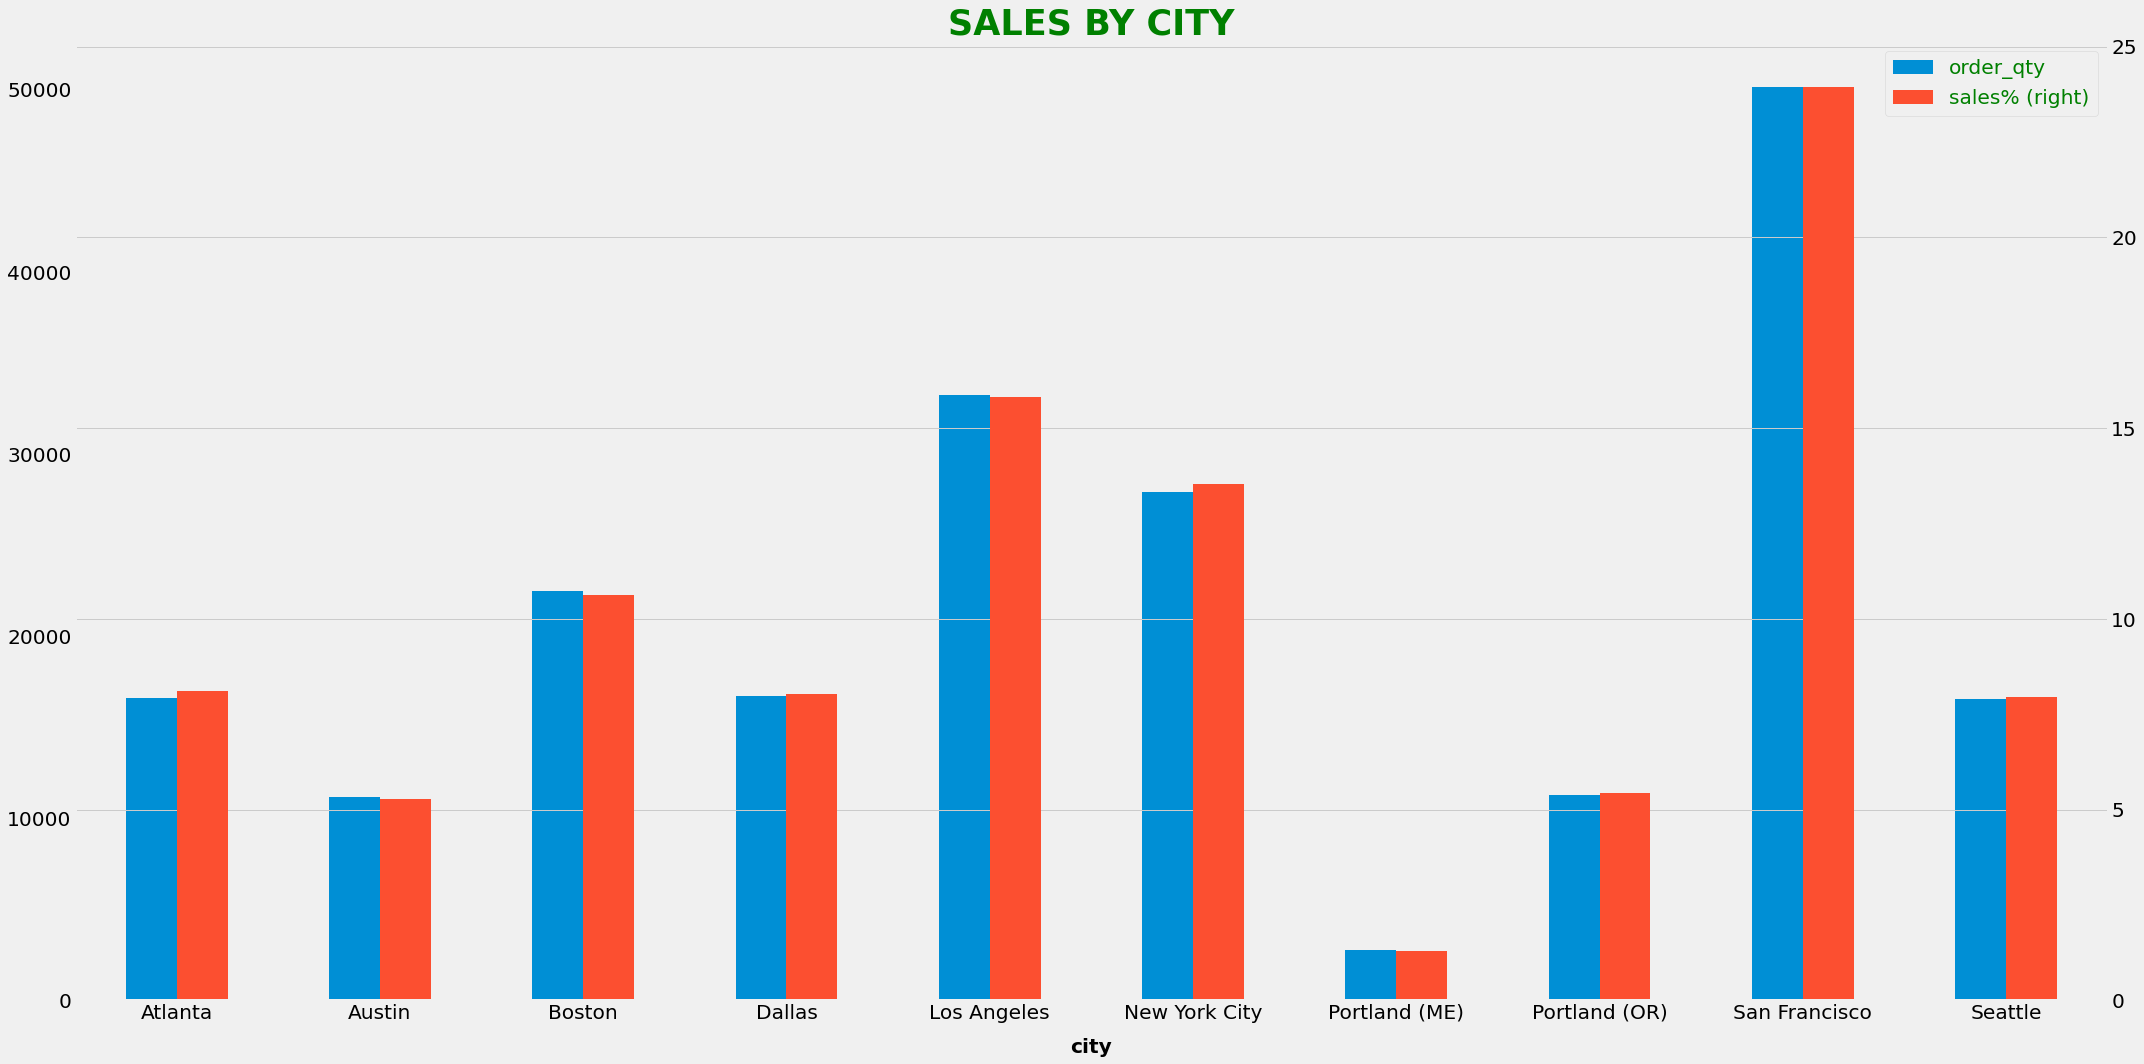

In [75]:
city_info = city_info.reset_index()[["city", "order_qty", "sales%"]]

_ = city_info.plot(kind="bar", x="city", secondary_y="sales%", rot=0)

plt.ticklabel_format(style="plain", axis="y")
plt.title("SALES BY CITY")
plt.tight_layout()
plt.show()

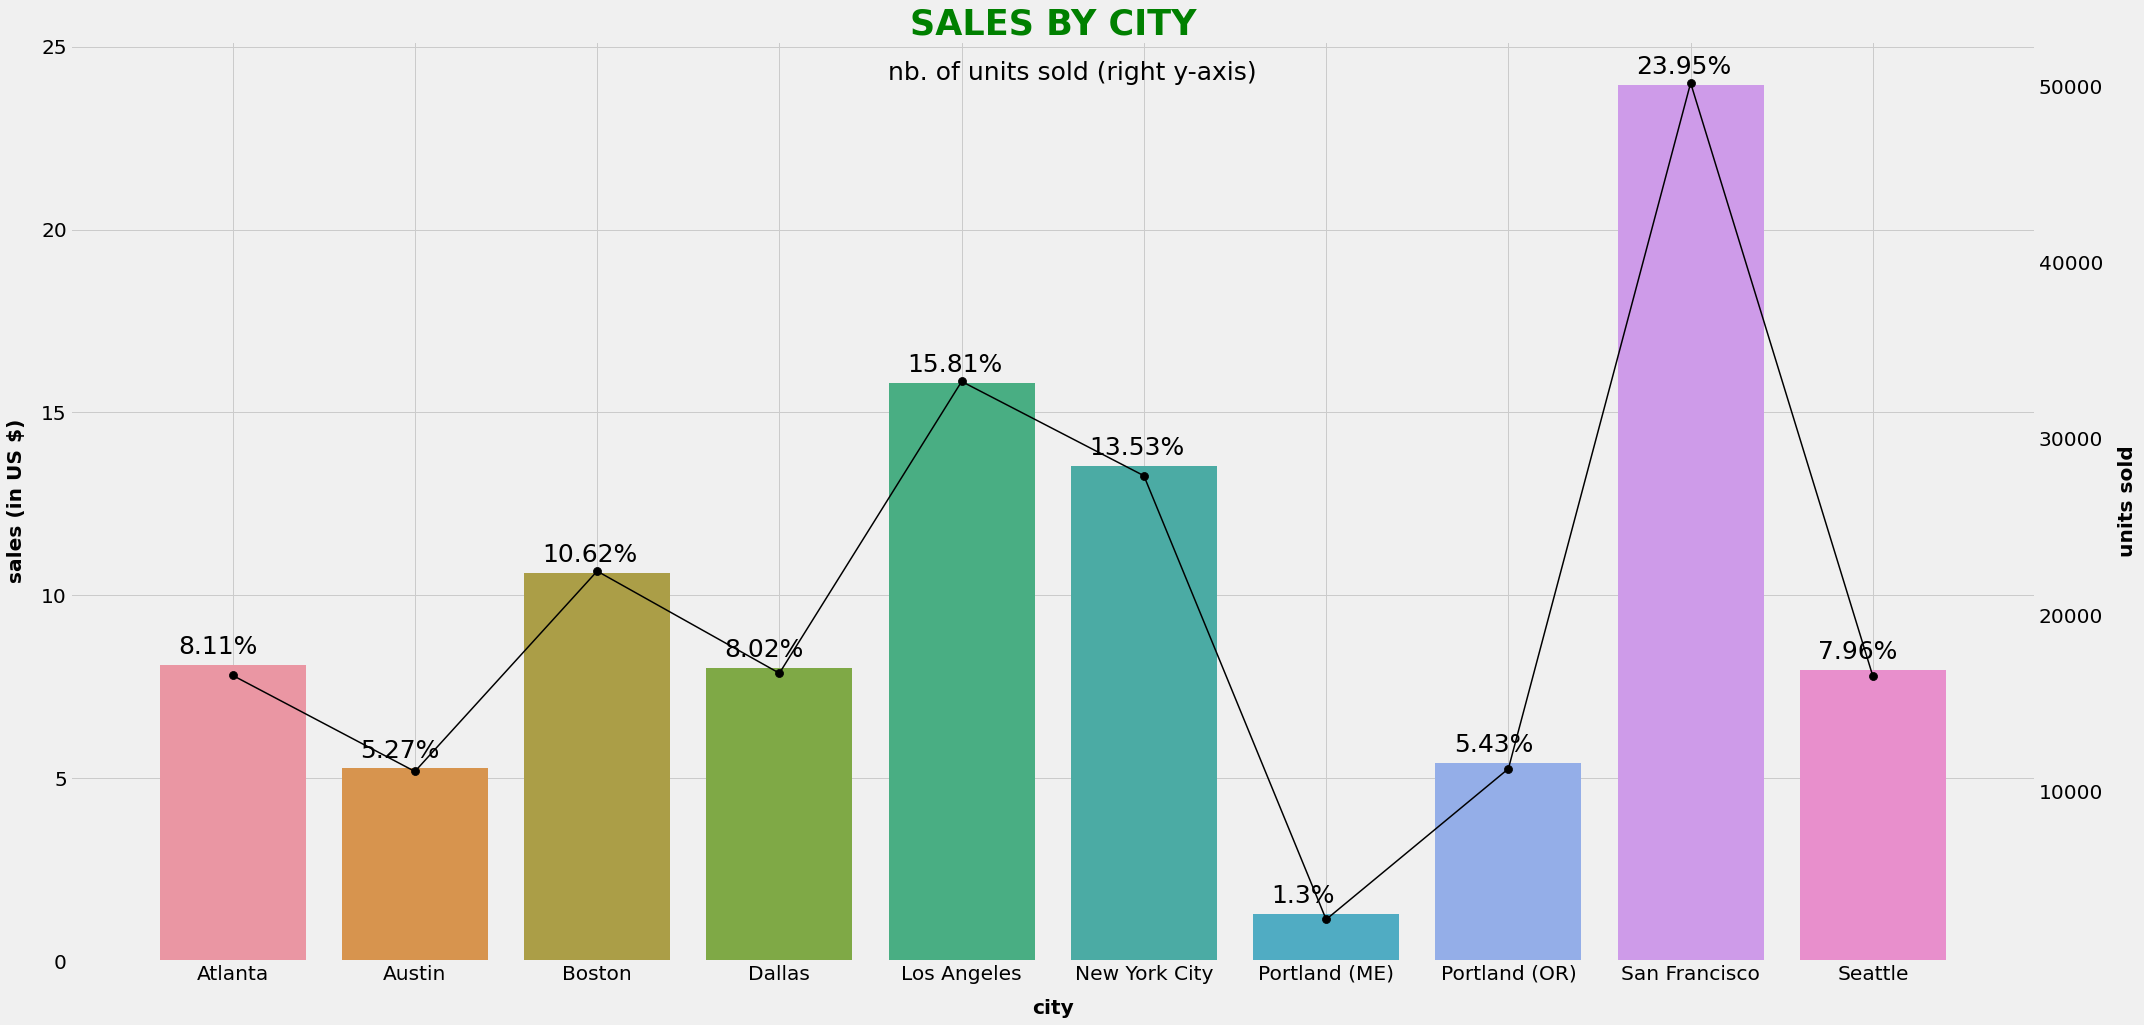

In [76]:
# plot
ax1 = sns.barplot(data=city_info, x="city", y="sales%")
ax2 = ax1.twinx()

# plotting
sns.lineplot(data=city_info, x="city", y="order_qty", 
             marker="o", markeredgecolor="black", markersize=8,
             color="black", ci=None, ax=ax2)

# configuration ax1
ax1.ticklabel_format(style="plain", axis="y")
ax1.set(xlabel="city", ylabel="sales (in US $)")
for p in ax1.patches:
    ax1.annotate(f'\n{p.get_height()}%', (p.get_x()+0.1, p.get_height()+0.3), color="k", fontsize=25)
ax1.grid(True)
# configuration ax2
ax2.set(ylabel="units sold")
ax2.grid(False)

# parameters
plt.title("SALES BY CITY")
plt.suptitle("nb. of units sold (right y-axis)", y=0.9, fontsize=25, color="black")
plt.tight_layout()
plt.show()

### 4. Product ranking

#### A. Most profitable product

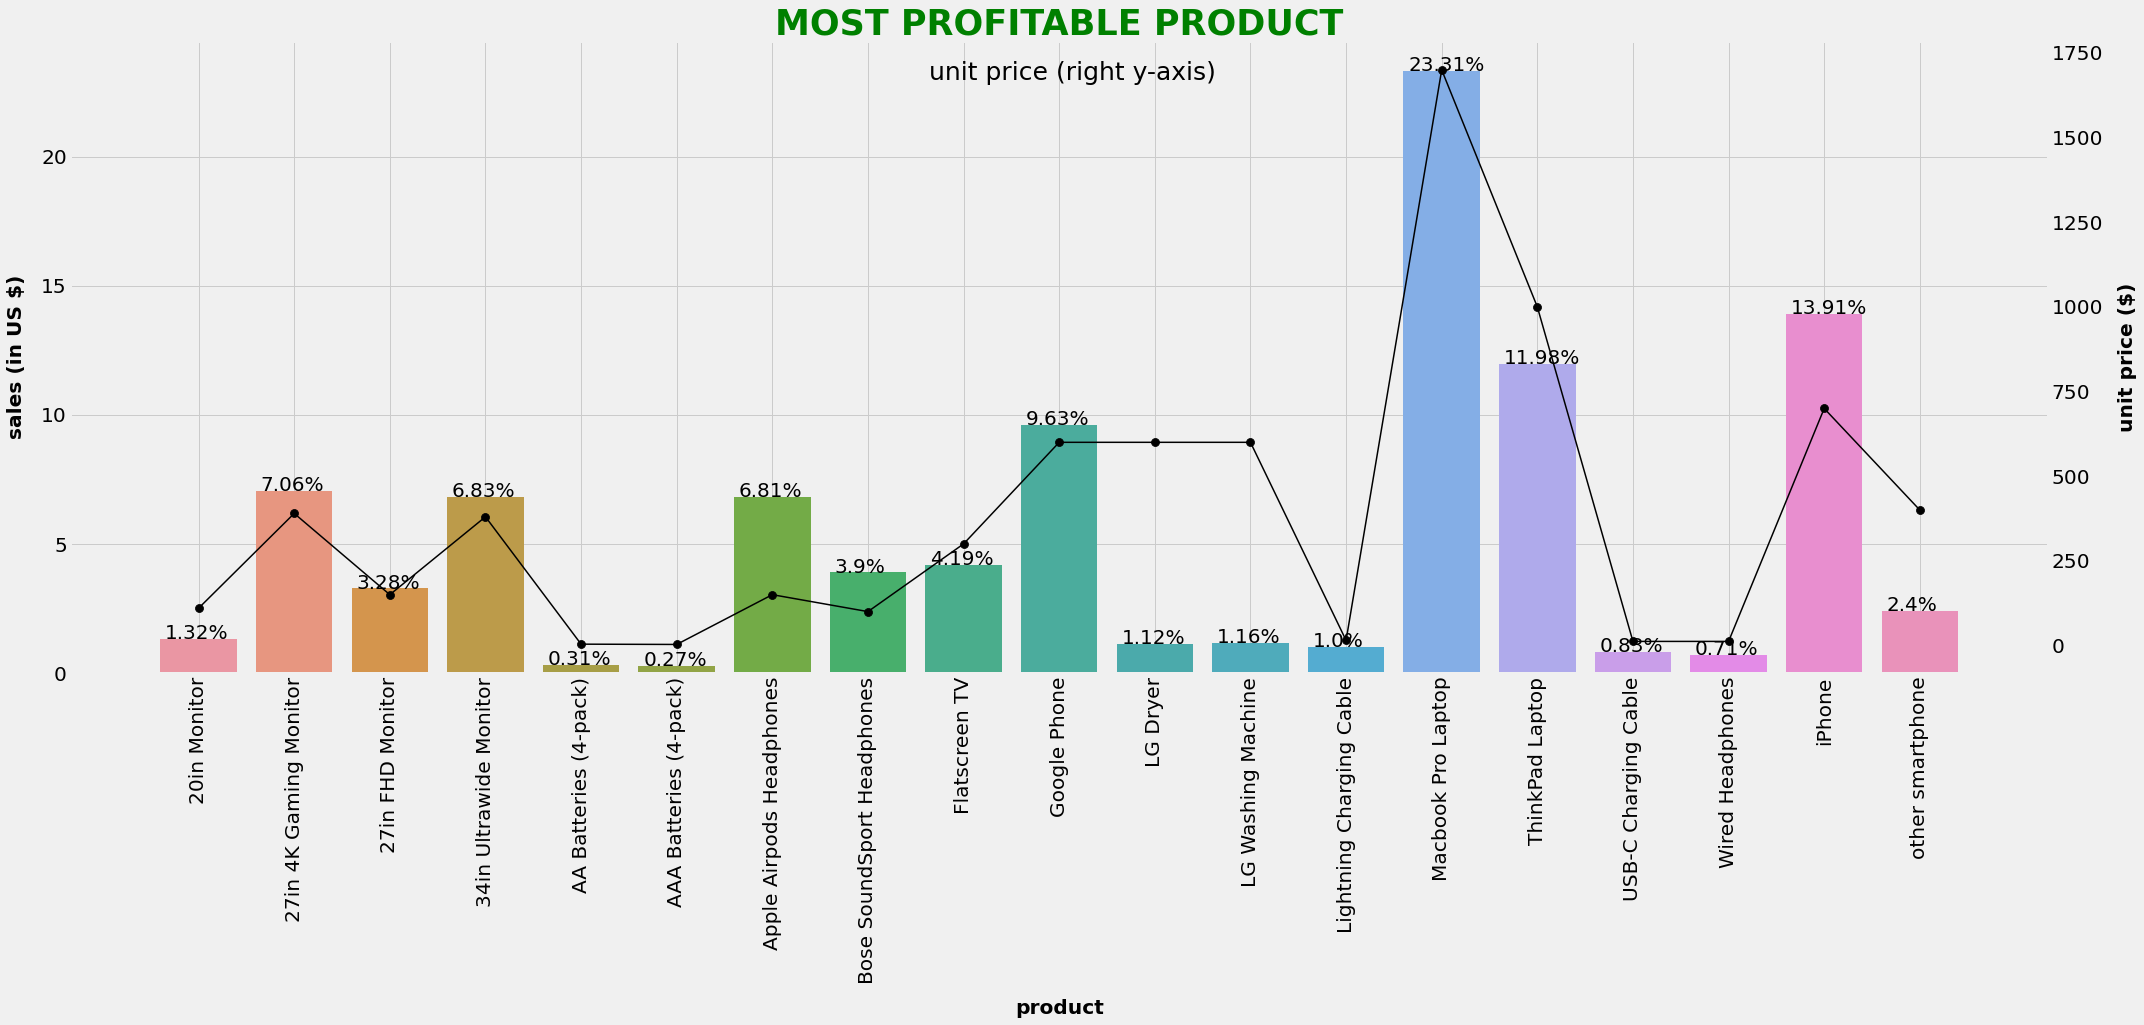

In [77]:
# plot
ax1 = sns.barplot(data=product_info, x="product", y="sales%")
plt.xticks(rotation=90)
ax2 = ax1.twinx()

# plotting
sns.lineplot(data=product_info, x="product", y="unit_price", 
             marker="o", markeredgecolor="black", markersize=8,
             color="black", ci=None, ax=ax2)

# configuration ax1
ax1.ticklabel_format(style="plain", axis="y")
ax1.set(xlabel="product", ylabel="sales (in US $)")
for p in ax1.patches:
    ax1.annotate(f'\n{p.get_height()}%', (p.get_x()+0.05, p.get_height()+0), color="k", fontsize=20)
ax1.grid(True)
# configuration ax2
ax2.set(ylabel="unit price ($)")
ax2.grid(False)

# parameters
plt.title("MOST PROFITABLE PRODUCT")
plt.suptitle("unit price (right y-axis)", y=0.9, fontsize=25, color="black")
plt.tight_layout()
plt.show()

#### B. Highest selling product

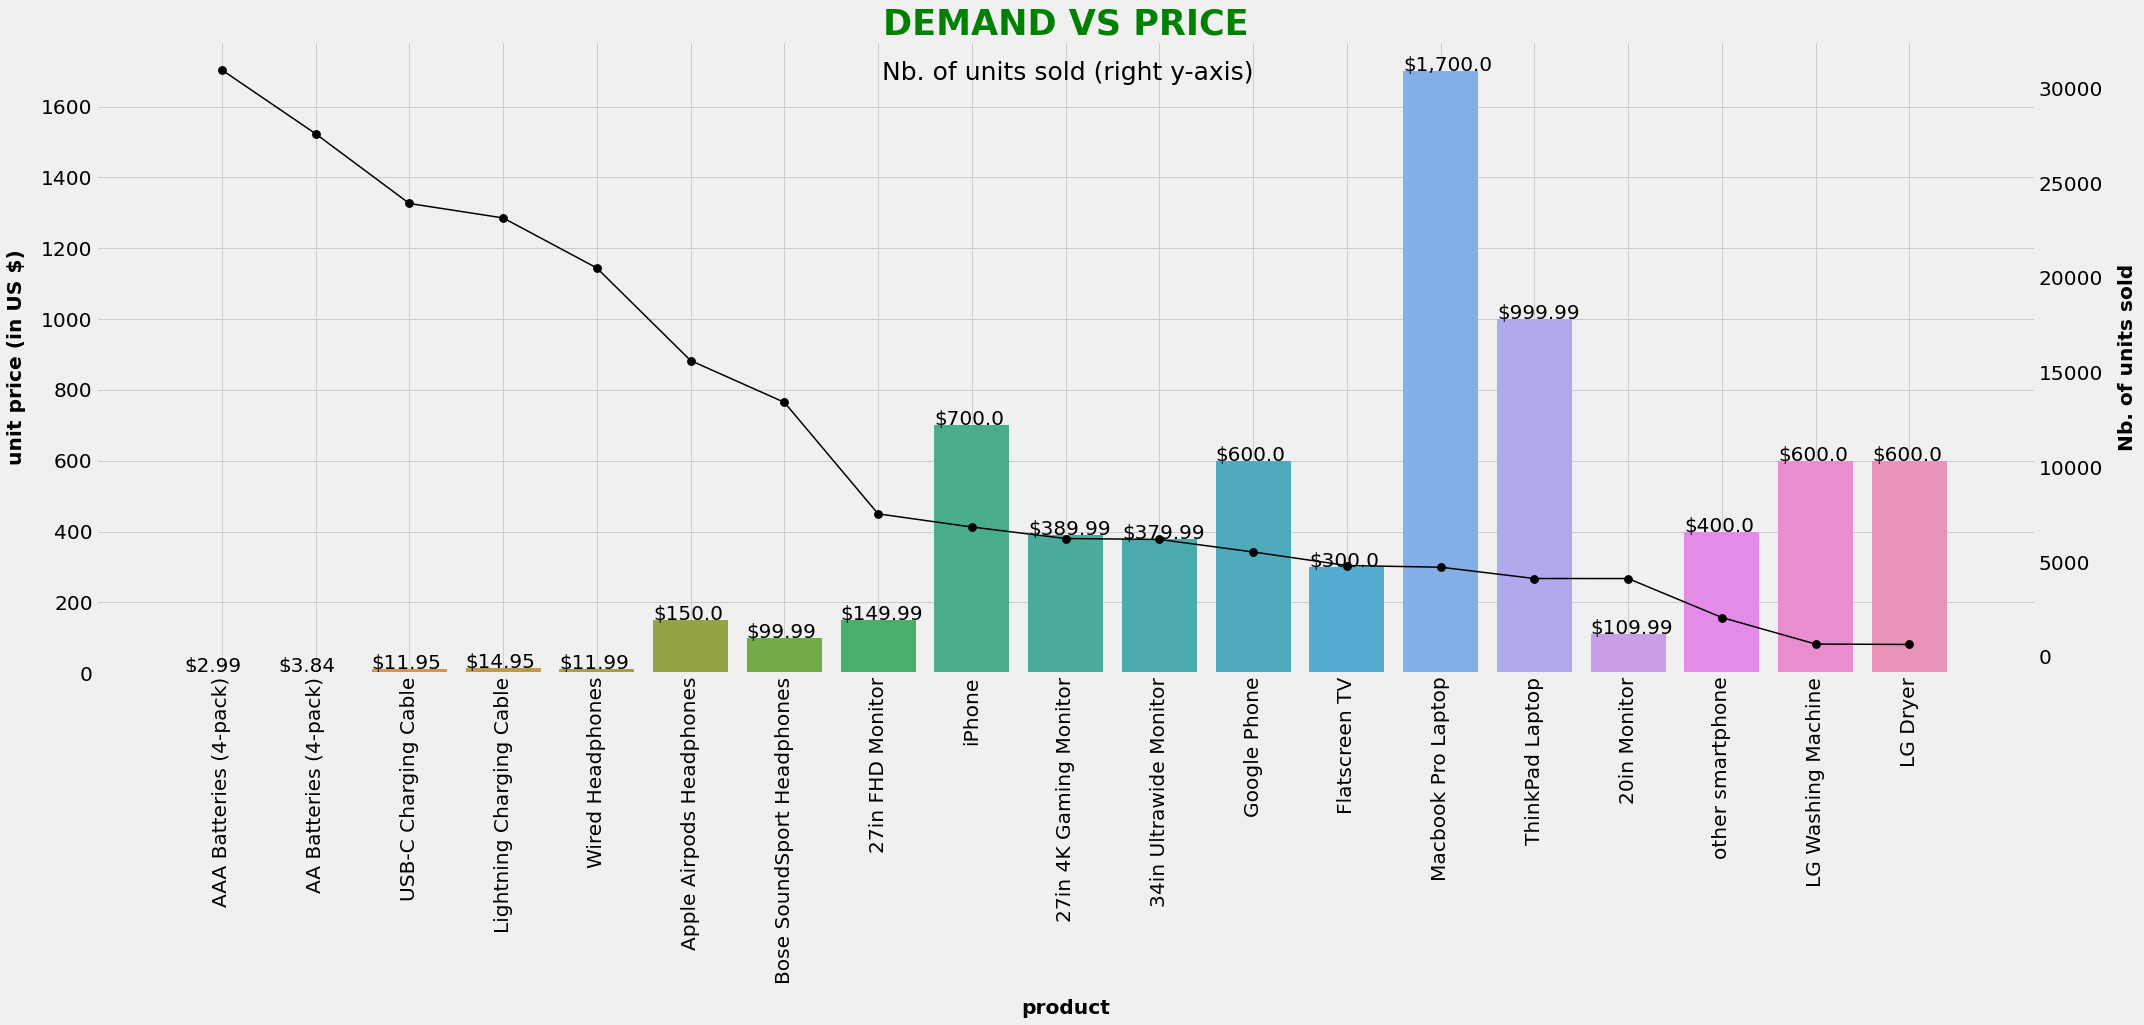

In [78]:
# plot
qsd = product_info.sort_values(by="order_qty", ascending=False)
ax1 = sns.barplot(data=qsd, x="product", y="unit_price")
plt.xticks(rotation=90)
ax2 = ax1.twinx()

# plotting
sns.lineplot(data=qsd, x="product", y="order_qty", 
             marker="o", markeredgecolor="black", markersize=8,
             color="black", ci=None, ax=ax2)

# configuration ax1
ax1.ticklabel_format(style="plain", axis="y")
ax1.set(xlabel="product", ylabel="unit price (in US $)")
for p in ax1.patches:
    ax1.annotate(f'\n${p.get_height():,}', (p.get_x()+0, p.get_height()+0), color="k", fontsize=20)
ax1.grid(True)
# configuration ax2
ax2.set(ylabel="Nb. of units sold")
ax2.grid(False)

# parameters
plt.title("DEMAND VS PRICE")
plt.suptitle("Nb. of units sold (right y-axis)", y=0.9, fontsize=25, color="black", x=0.498)
plt.tight_layout()
plt.show()

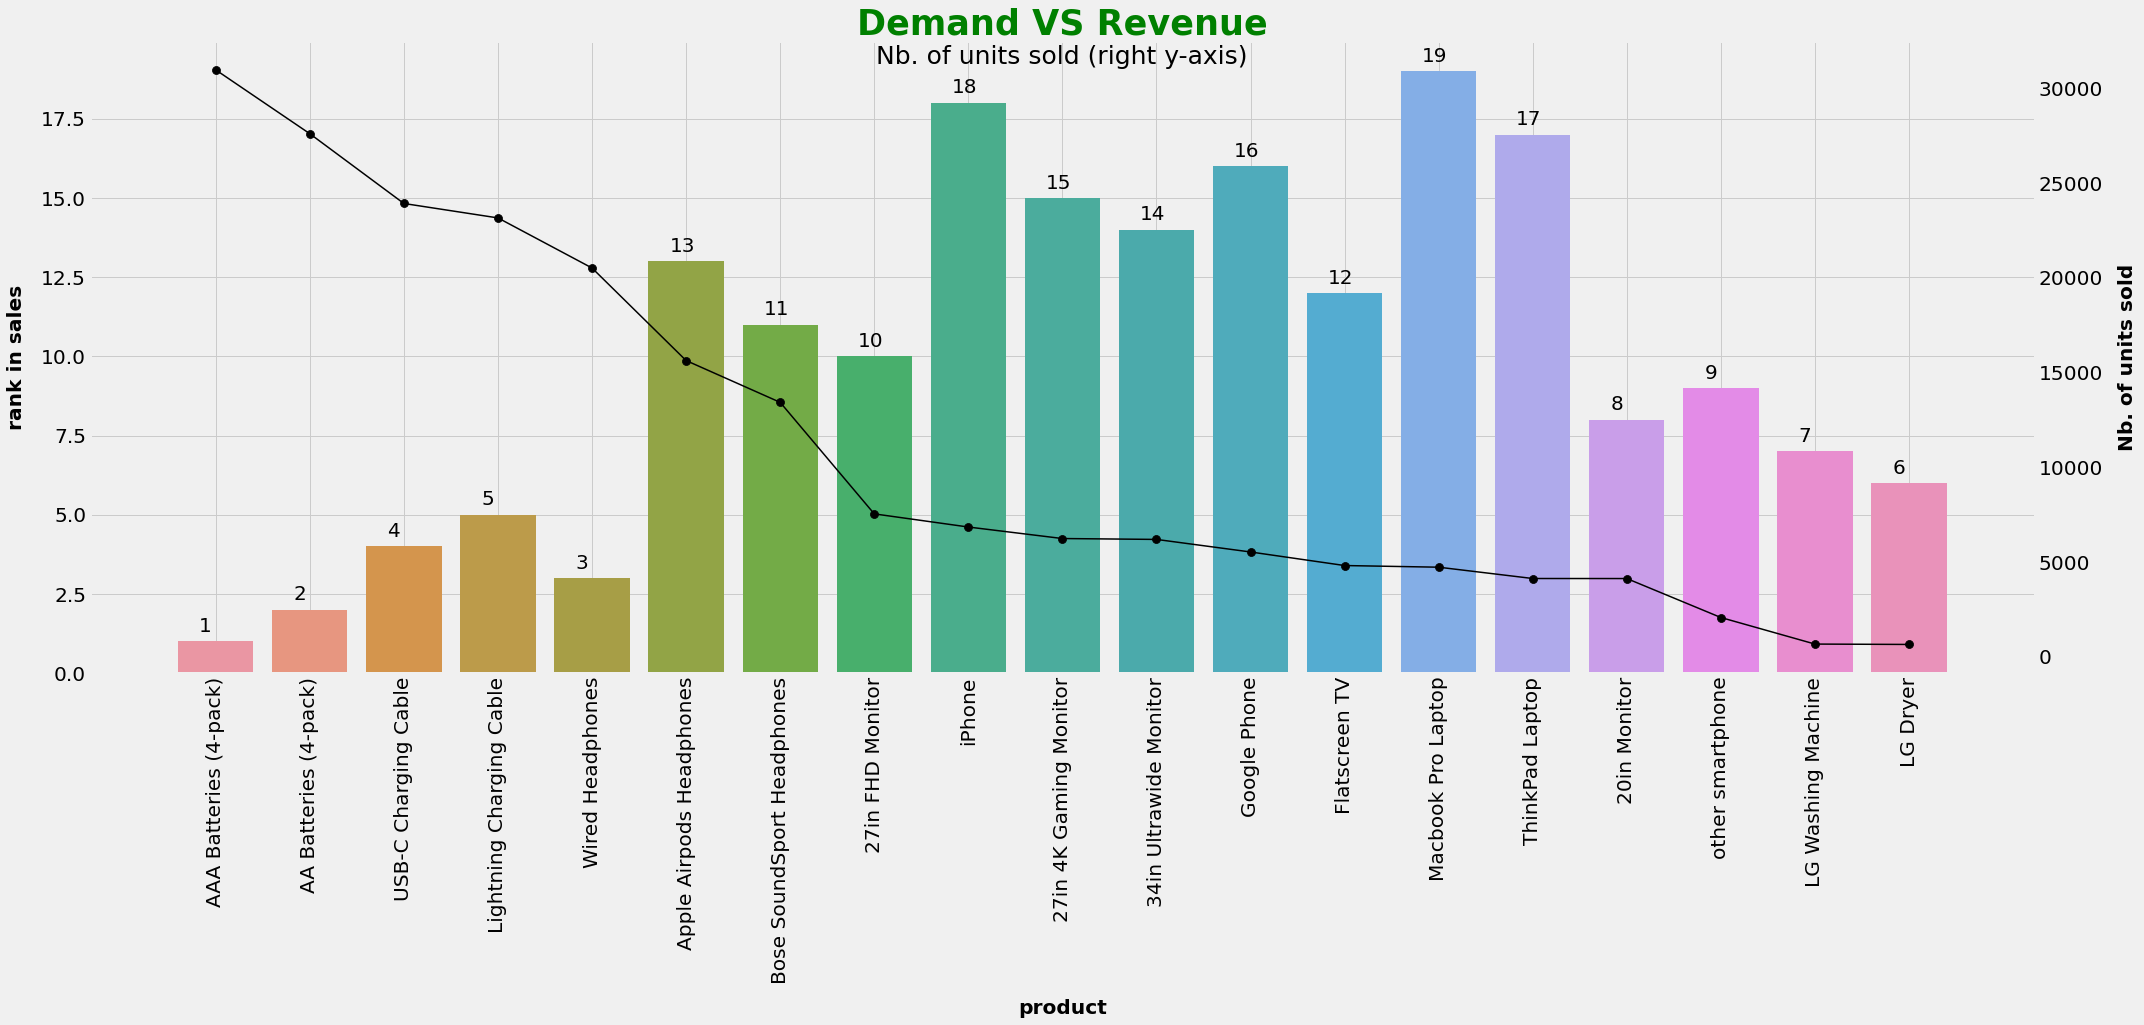

In [79]:
# plot
product_info = product_info.sort_values(by="order_qty", ascending=False)
ax1 = sns.barplot(data=product_info, x="product", y="rank")
plt.xticks(rotation=90)
ax2 = ax1.twinx()

# plotting
sns.lineplot(data=product_info, x="product", y="order_qty", 
             marker="o", markeredgecolor="black", markersize=8,
             color="black", ci=None, ax=ax2)

# configuration ax1
ax1.ticklabel_format(style="plain", axis="y")
ax1.set(xlabel="product", ylabel="rank in sales")
for p in ax1.patches:
    ax1.annotate(f'\n{p.get_height():.0f}', (p.get_x()+0.225, p.get_height()+0.3), color="k", fontsize=20)
ax1.grid(True)
# configuration ax2
ax2.set(ylabel="Nb. of units sold")
ax2.grid(False)

# parameters
plt.title("Demand VS Revenue")
plt.suptitle("Nb. of units sold (right y-axis)", y=0.915, fontsize=25, color="black", x=0.495)
plt.tight_layout()
plt.show()

#### C. Category

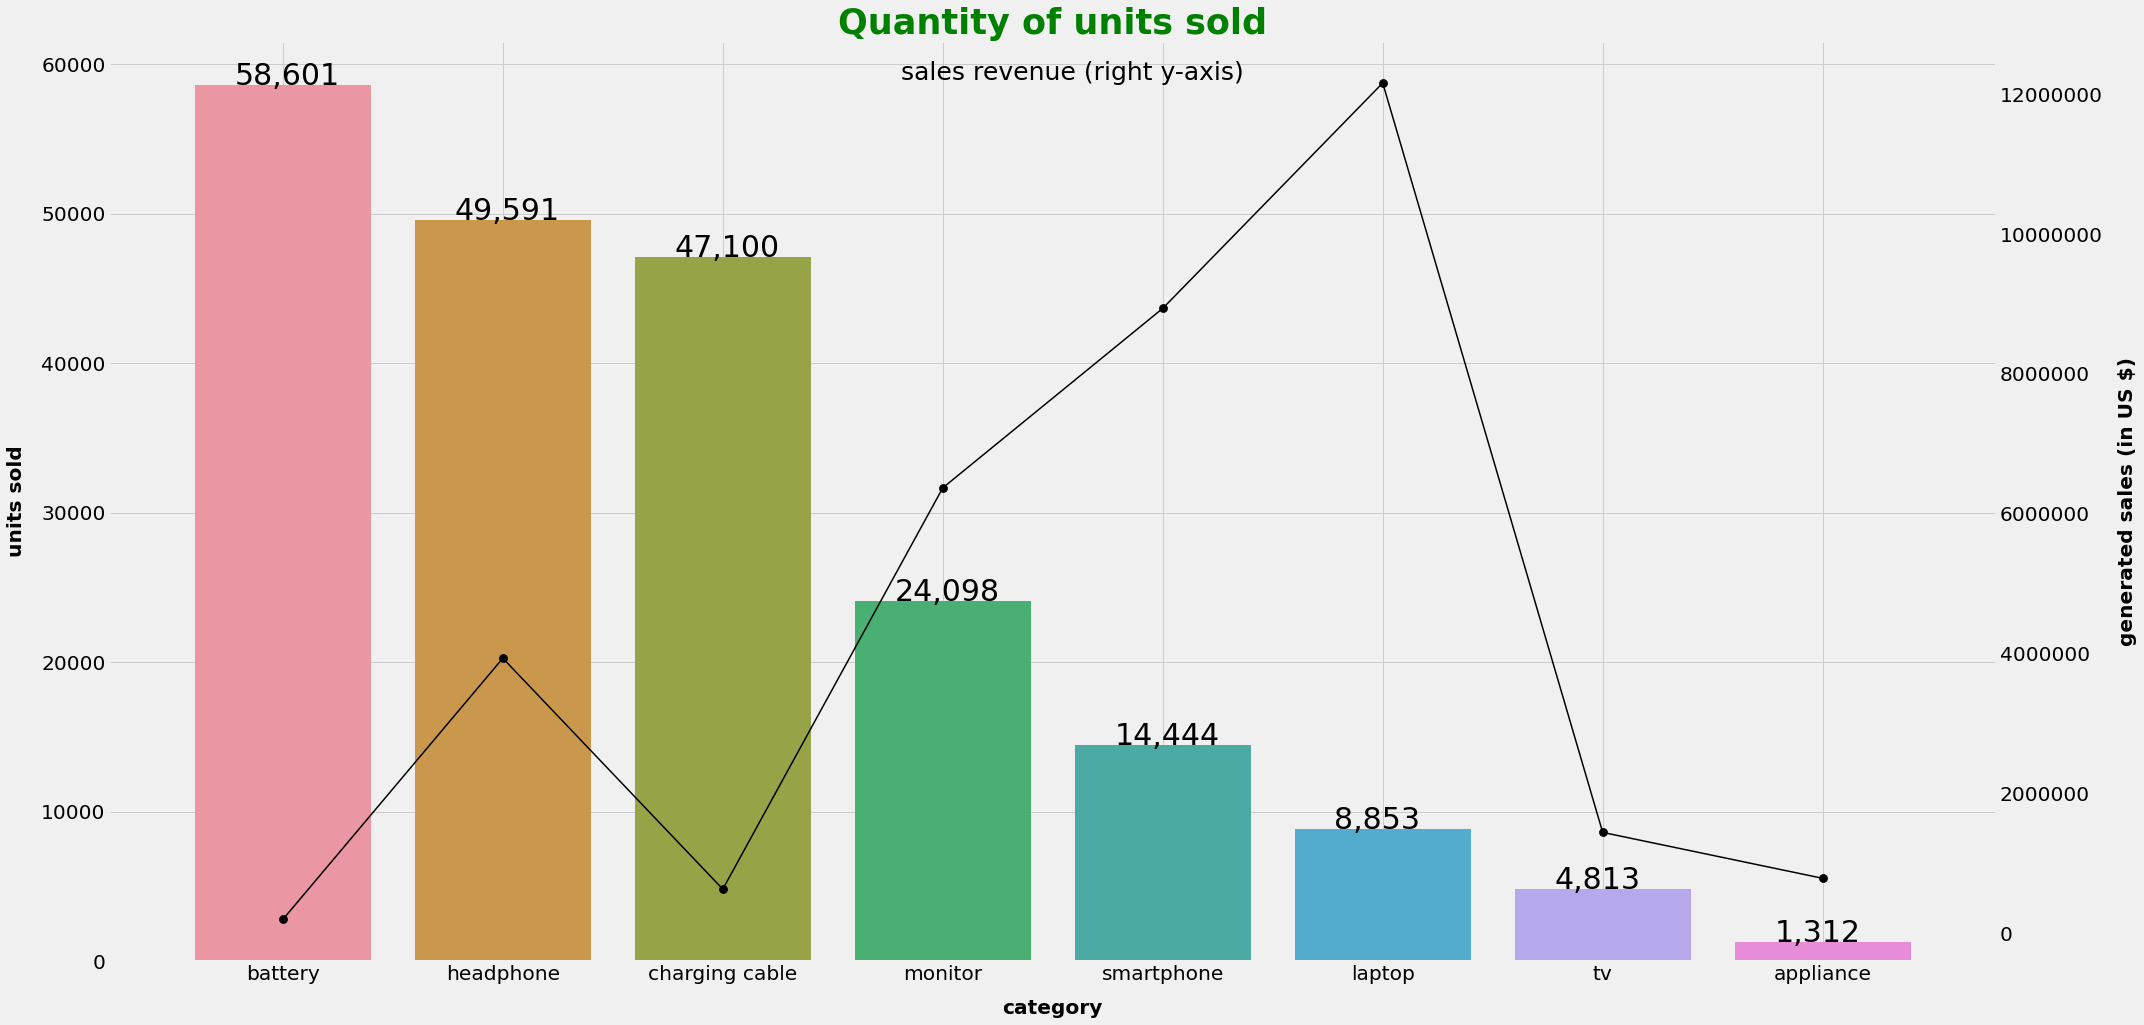

In [80]:
# plot
sdsd = category_info.sort_values(by="order_qty", ascending=False)
ax1 = sns.barplot(data=sdsd, x="category", y="order_qty")
ax2 = ax1.twinx()

# plotting
sns.lineplot(data=sdsd, x="category", y="sales", 
             marker="o", markeredgecolor="black", markersize=8,
             color="black", ci=None, ax=ax2)

# configuration ax1
ax1.ticklabel_format(style="plain", axis="y")
ax1.set(xlabel="category", ylabel="units sold")
for p in ax1.patches:
    ax1.annotate(f'\n{p.get_height():,.0f}', (p.get_x()+0.18, p.get_height()+0.3), color="k", fontsize=30)
ax1.grid(True)
# configuration ax2
ax2.ticklabel_format(style="plain", axis="y")
ax2.set(ylabel="generated sales (in US $)")
ax2.grid(False)

# parameters
plt.title("Quantity of units sold")
plt.suptitle("sales revenue (right y-axis)", y=0.9, fontsize=25, color="black")
plt.tight_layout()
plt.show()

#### D. Frequently bought together

In [81]:
order_combo = df[df["order_id"].duplicated(keep=False)].copy()

order_combo["group"] = order_combo.groupby(["order_id"])[["product"]].transform(lambda x: ", ".join(x))
order_combo = order_combo[["order_id", "group"]].drop_duplicates()
order_combo.sample(5)

order_id                                              group
177055   213554                              iPhone, Flatscreen TV
114076   292818                 Google Phone, USB-C Charging Cable
128733   270492              ThinkPad Laptop, USB-C Charging Cable
171337   234860       Wired Headphones, Bose SoundSport Headphones
2930     298464  Lightning Charging Cable, Bose SoundSport Head...

In [82]:
count = Counter()

for row in order_combo["group"]:
    row_list = row.split(", ")
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(f"{key, value}")

(('iPhone', 'Lightning Charging Cable'), 521)
(('USB-C Charging Cable', 'Google Phone'), 506)
(('Google Phone', 'USB-C Charging Cable'), 491)
(('Lightning Charging Cable', 'iPhone'), 490)
(('iPhone', 'Wired Headphones'), 233)
(('Wired Headphones', 'iPhone'), 229)
(('Wired Headphones', 'Google Phone'), 229)
(('other smartphone', 'USB-C Charging Cable'), 196)
(('iPhone', 'Apple Airpods Headphones'), 195)
(('Google Phone', 'Wired Headphones'), 193)


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## Forecasting 

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### 1. Data preparation

#### A. subset

In [83]:
# Ddtaset
data = df.set_index("order_date").resample("D").sum()[["sales"]].iloc[:-1, :]
data["log"] = np.log(data["sales"])
data["diff"] = data["log"].diff()
data.sample(5)

sales        log      diff
order_date                                
2019-01-06   52762.54  10.873557  0.125820
2019-06-19   94337.88  11.454638 -0.039164
2019-11-12  100467.22  11.517587 -0.096503
2019-06-07   77574.34  11.258992 -0.118721
2019-03-18  100966.63  11.522545  0.218875

#### B. plot 

<AxesSubplot:xlabel='order_date'>

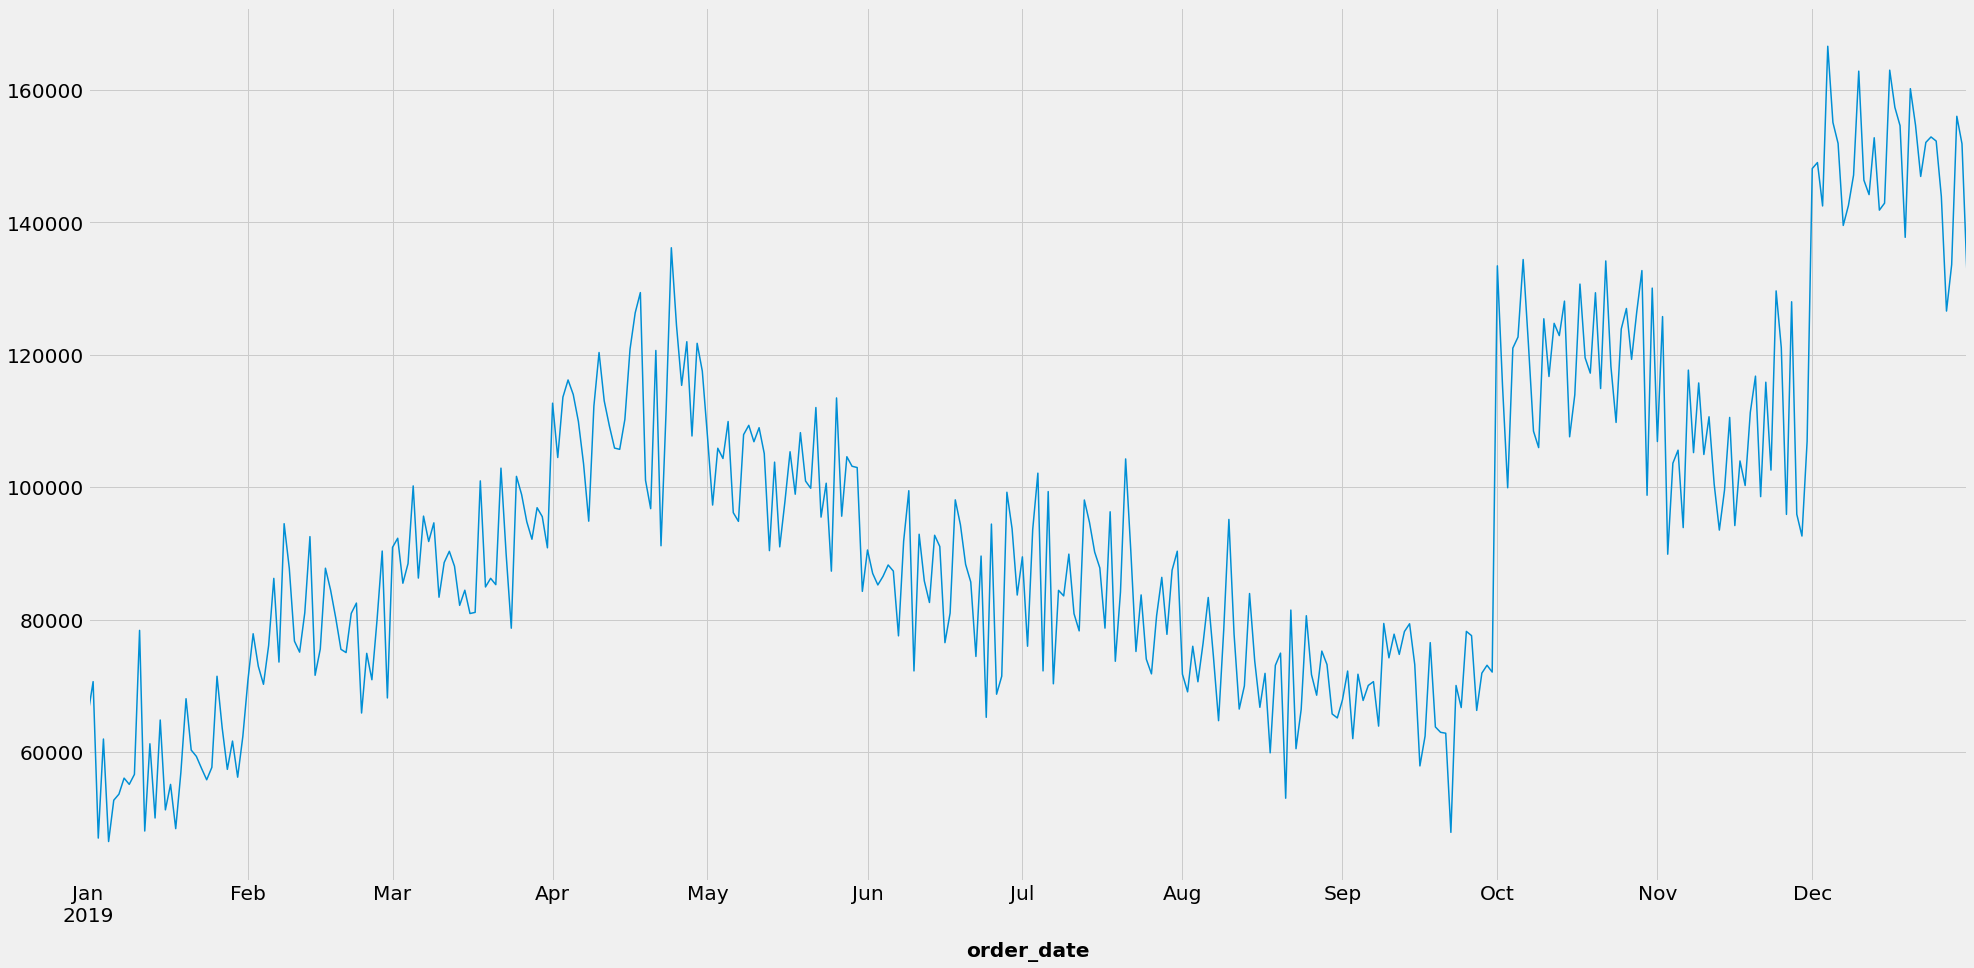

In [84]:
data.sales.plot()

#### C. decomposition 

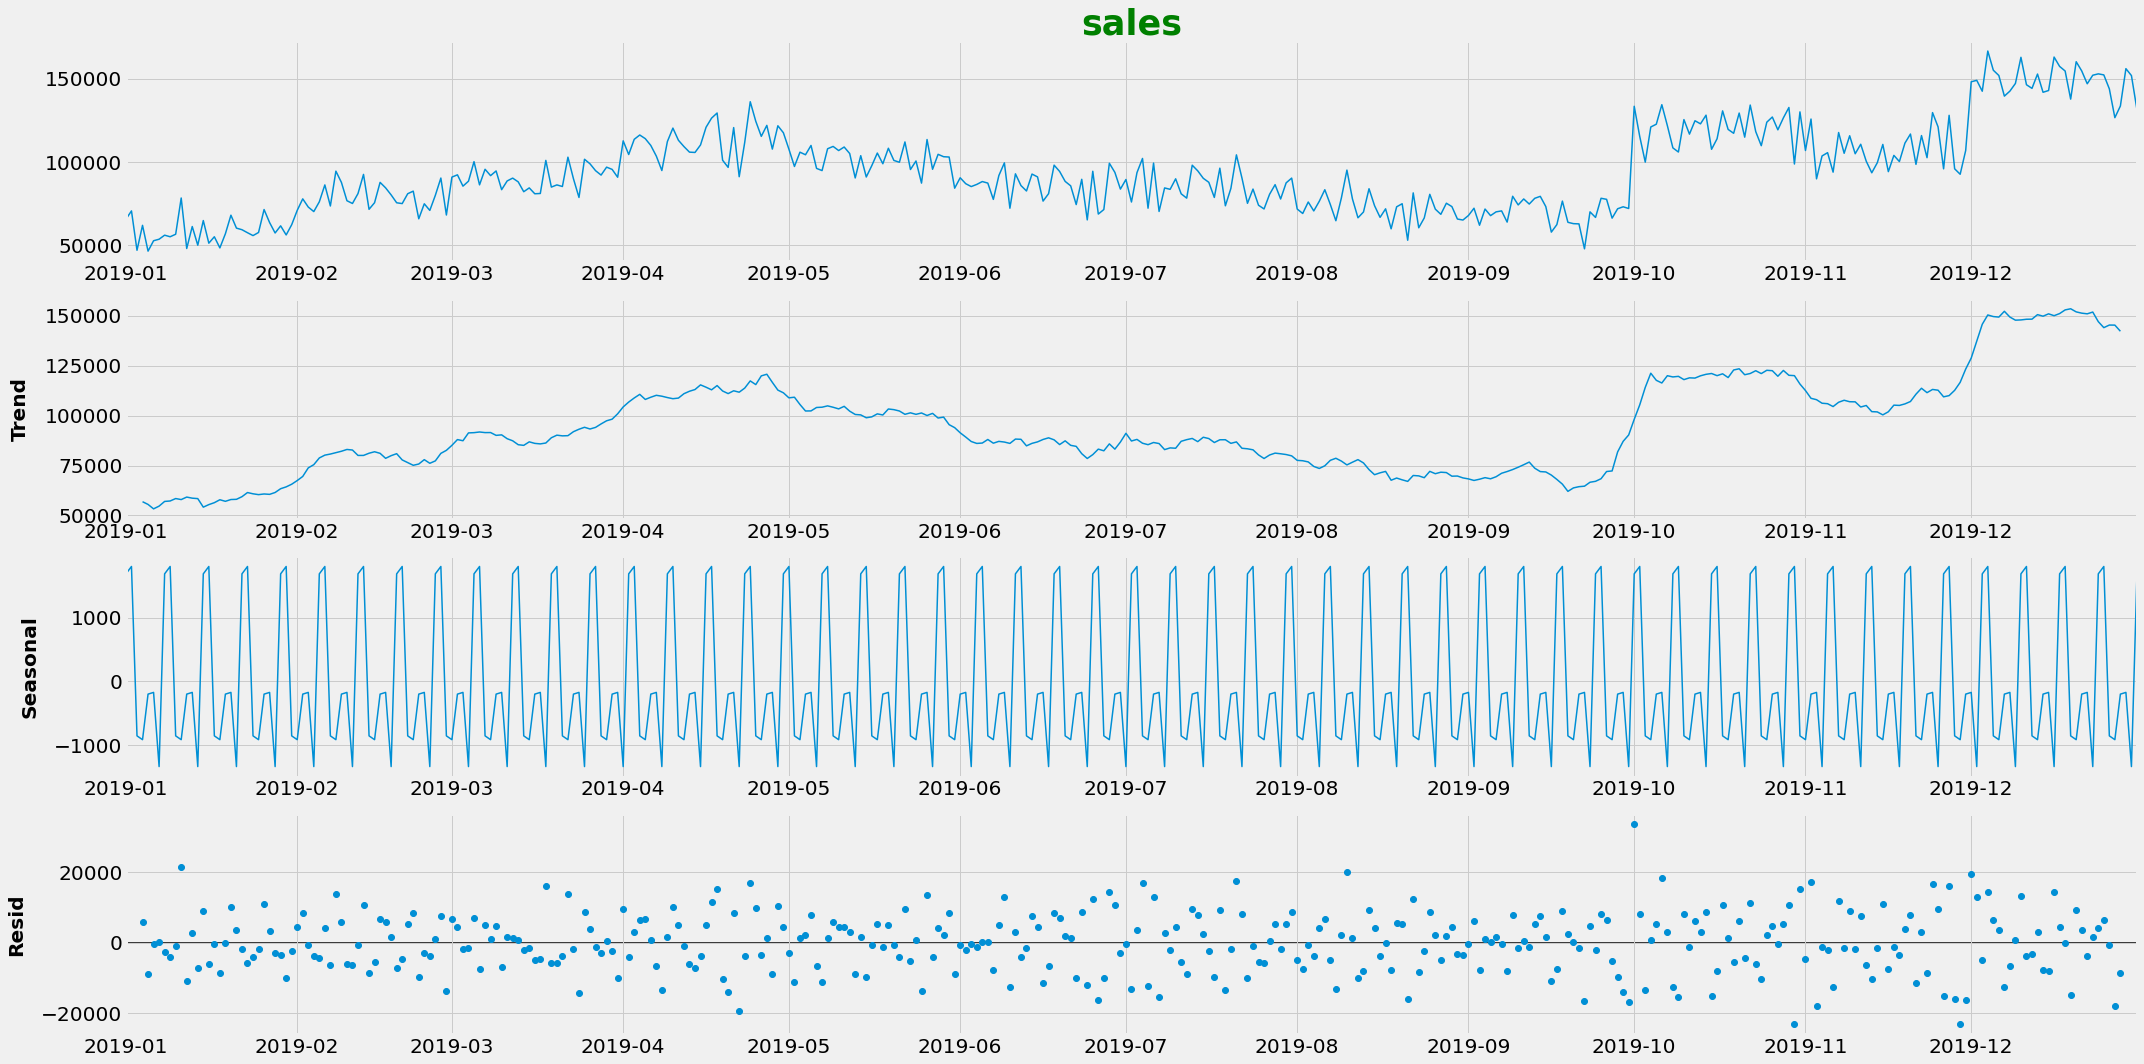

In [85]:
decompose_add = seasonal_decompose(data.sales, model="add")
decompose_add.plot()
plt.tight_layout()
plt.show()

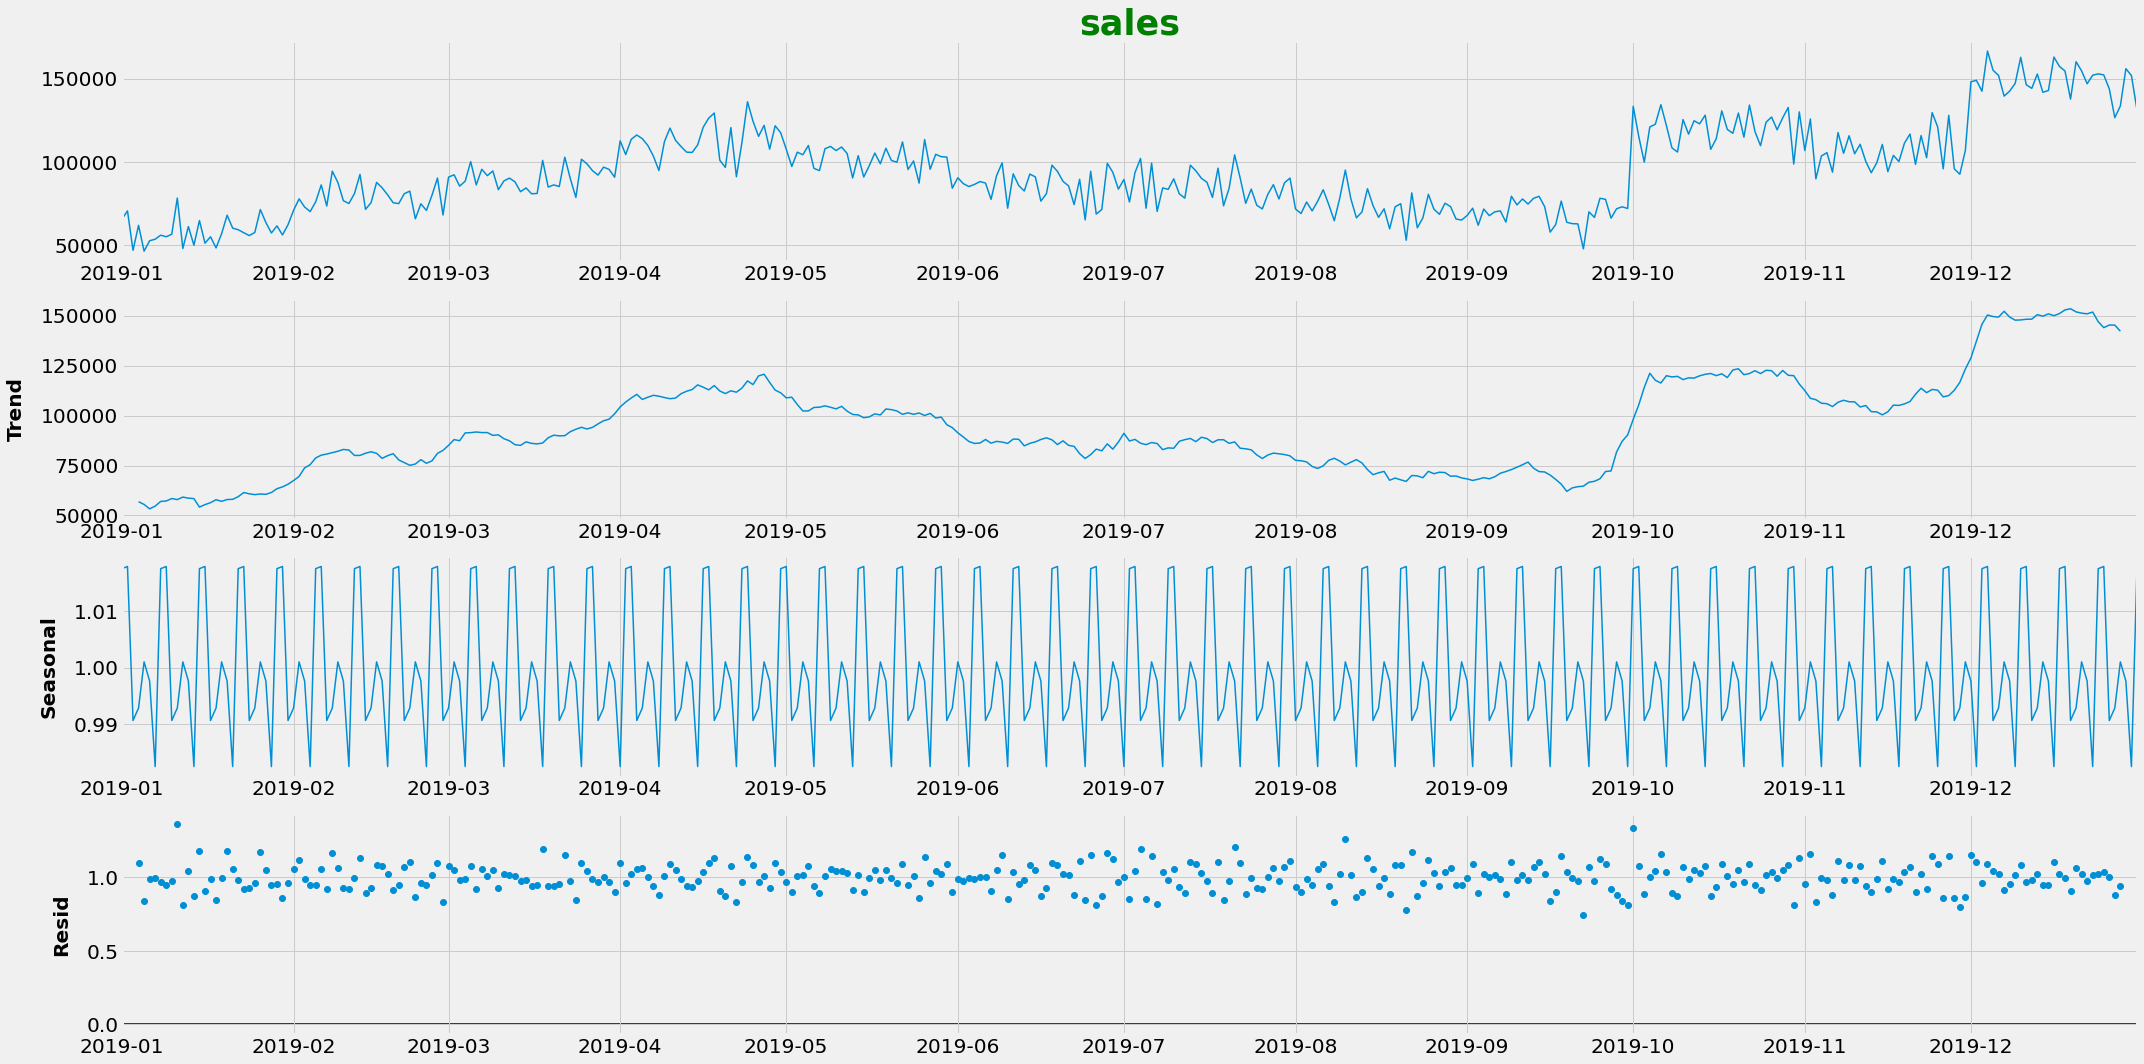

In [86]:
decompose_mul = seasonal_decompose(data.sales, model="mul")
decompose_mul.plot()
plt.tight_layout()
plt.show()

#### D. stationarity 

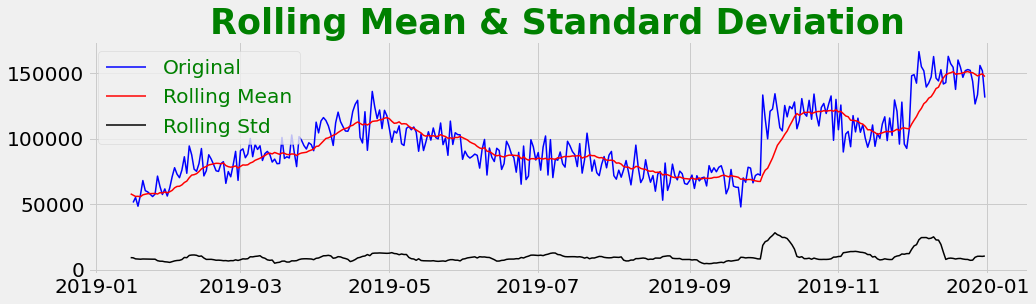

Results of Dickey-Fuller test :
--------------------------------------------------
Test Statistic                  -1.616561
P-value                          0.474532
# Lags Used                      4.000000
Number of Observations Used    360.000000
dtype: float64


Is this data stationary ?
	Critical value 1%: -3.448645946352023 - The data is not stationary with 99% confidence
	Critical value 5%: -2.869602139060357 - The data is not stationary with 95% confidence
	Critical value 10%: -2.5710650077160495 - The data is not stationary with 90% confidence


CONCLUSION : time series is non-stationary, accept H0


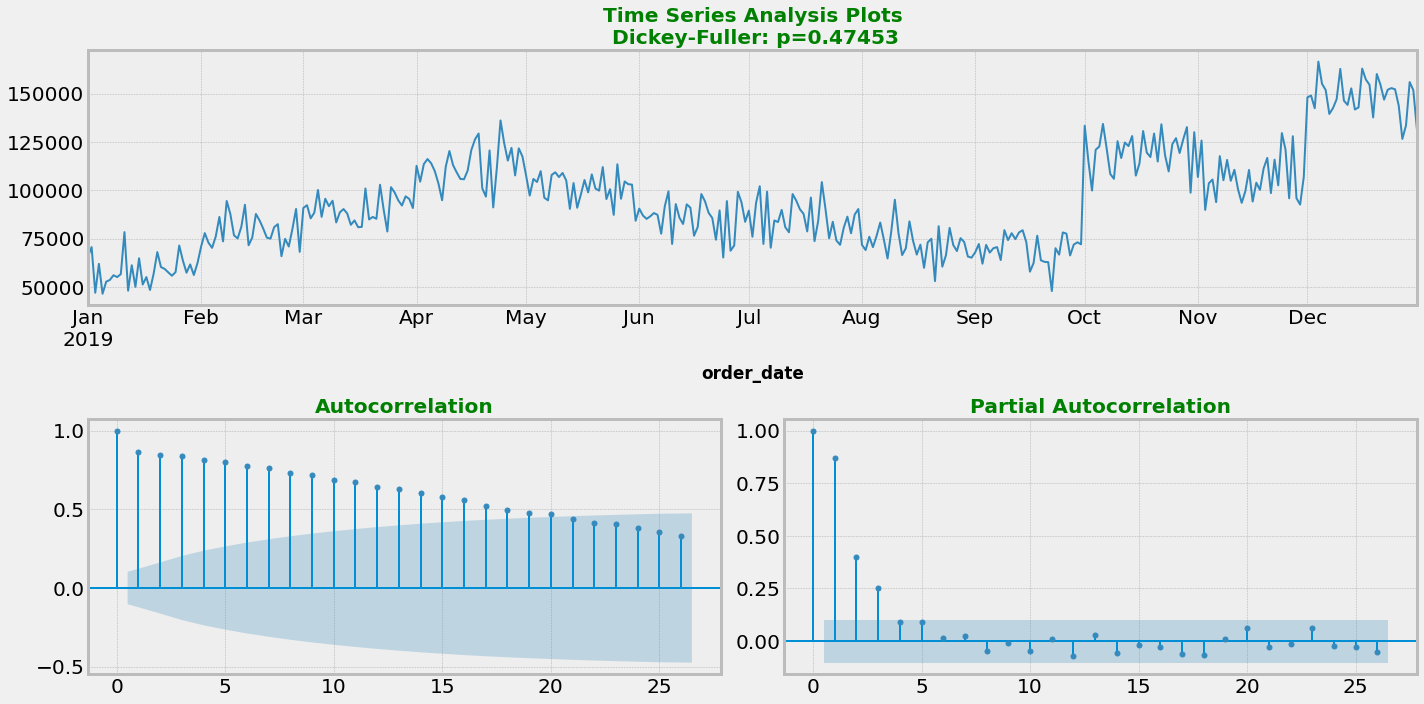

In [87]:
tsplot(data.sales)

Since P-value is greater than the significance level, let’s difference the series and see how the autocorrelation plot looks like.

#### E. differencing

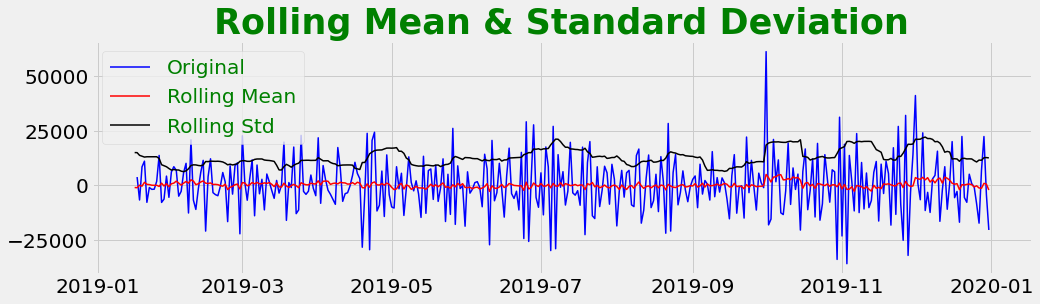

Results of Dickey-Fuller test :
--------------------------------------------------
Test Statistic                -1.404486e+01
P-value                        3.254470e-26
# Lags Used                    3.000000e+00
Number of Observations Used    3.600000e+02
dtype: float64


Is this data stationary ?
	Critical value 1%: -3.448645946352023 - The data is  stationary with 99% confidence
	Critical value 5%: -2.869602139060357 - The data is  stationary with 95% confidence
	Critical value 10%: -2.5710650077160495 - The data is  stationary with 90% confidence


CONCLUSION : time series is stationary, reject H0


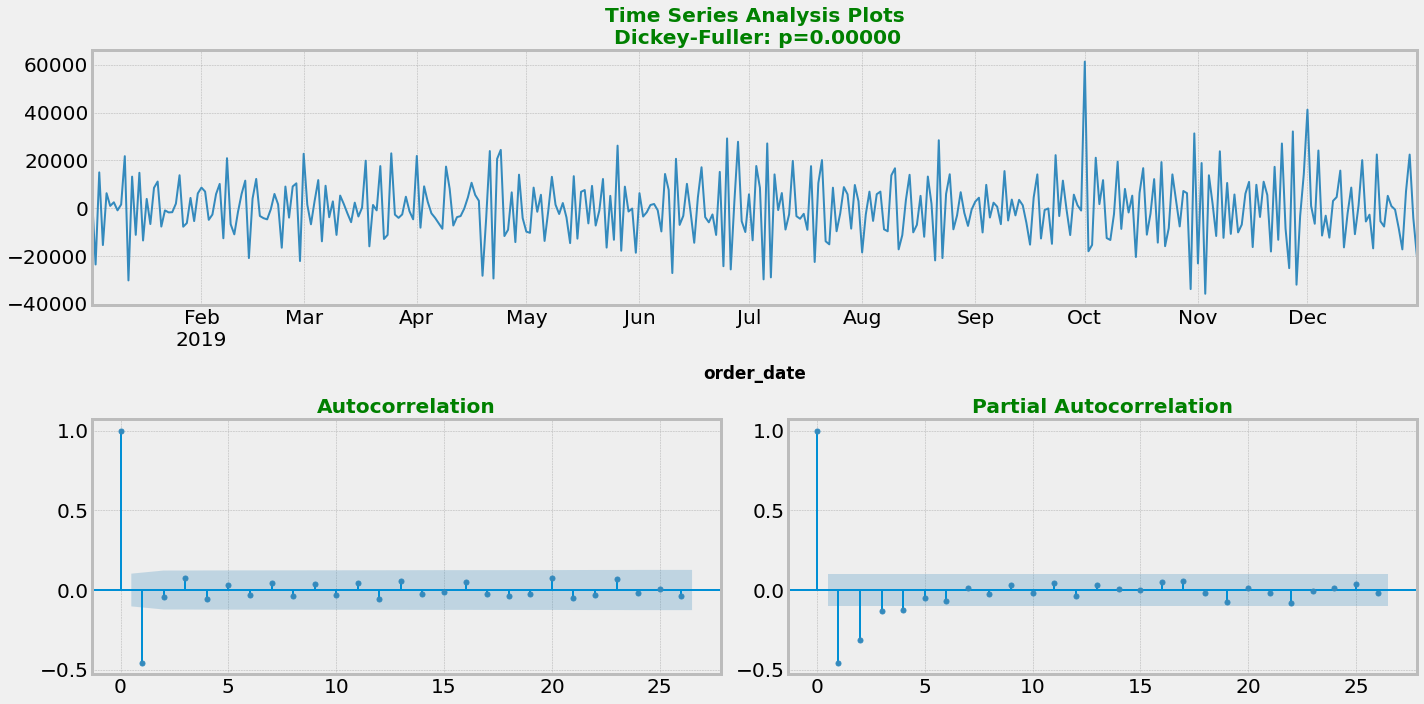

In [88]:
tsplot((data.sales - data.sales.shift(1)).dropna())

For the above series, the time series reaches stationarity with one order of differencing. But on looking at the autocorrelation plot for the 1st differencing, the lag goes into the far negative zone fairly quick, which indicates, the series might have been over differenced. Apparently, there’s no significant seasonal correlation to be considered in the predictions.

In [89]:
# order of differencig (d)
from pmdarima.arima.utils import ndiffs
y = data.sales

# Adf Test
print(f"ADF = {ndiffs(y, test='adf')}")

# KPSS test
print(f"KPSS = {ndiffs(y, test='kpss')}")

# PP test:
print(f"PP = {ndiffs(y, test='pp')}")

ADF = 1
KPSS = 1
PP = 0


Tail off at PACF. Then we know that it’s a MA model. Cut off is at lag 1 in ACF. Thus, it’s MA(1) model. Not that if there are more spikes that slightly go over above the threshold blue lines, we always want a simplified model. So we usually take lower lag number and significant spike like the one at lag 1.

> *In both ACF and PACF plots, it’s not clear whether they are tailing off or cutting off. That’s where ARMA comes in.*

With ARMA, the orders of p and q for AR and MA can be more than one. So testing out a few p and q combinations is advised to get the better score of AIC and BIC.

- To get p value for AR for ARMA model, we will look at PACF plots. The spikes are at 1 to 4. Thus it’s AR(4).
- To get q value, we will look at ACF plot. The spikeis at 1. Thus it’s MA(1).

We can try out several different combinations of ARMA. Don’t worry about not getting the right orders for these ARMA models because we always do diagnostics for all the models to see their performance. In addition, we also choose the best model by their AIC and BIC scores.

You can look at the ACF plot for the number of MA terms.
> *An MA term is technically, the error of the lagged forecast. The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.*

You can observe that the ACF lag 1 is quite significant since is well above the significance line: managing to cross the significance limit (blue region).

### 2. Naive model sampling

In [90]:
# subset
sample = data.copy()
sample["d=1"] = sample["sales"].shift(1)
sample = sample.dropna()

# evaluate naive model
mae = mean_absolute_error(sample.sales, sample["d=1"])
mse = mean_squared_error(sample.sales, sample["d=1"])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((sample.sales - sample["d=1"]) /sample.sales)) *100

print(f"MAE = {round(mae,2):,}")
print(f"MSE = {round(mse,2):,}")
print(f"RMSE = {round(rmse,2):,}")
print(f"MAPE = {round(mape,2):,}%")

MAE = 10,192.94
MSE = 171,784,075.23
RMSE = 13,106.64
MAPE = 11.32%


### 3. Cross validation

#### A. split data (train and test)

**How to do find the optimal ARIMA model manually using Out-of-Time Cross validation**

In Out-of-Time cross-validation, you take few steps back in time and forecast into the future to as many steps you took back. Then you compare the forecast against the actuals.

To do out-of-time cross-validation, you need to create the training and testing dataset by splitting the time series into 2 contiguous parts in approximately 75:25 ratio or a reasonable proportion based on time frequency of series.

> *Why am I not sampling the training data randomly you ask?*

That’s because the order sequence of the time series should be intact in order to use it for forecasting.

In [91]:
# train and test last 15 days
train = data.sales[:-15]
test = data.sales[-15:]

#### B. configure parameters

In [92]:
a = auto_arima(train, trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7490.599, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7613.523, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7537.344, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7488.662, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7611.682, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7492.447, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=7490.643, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7488.945, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=7488.870, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.972 seconds


#### C. model selection and training 

From the chart, the ARIMA(0,1,1) model seems to give a directionally correct forecast. And the actual observed values lie within the 95% confidence band. That seems fine.

In [93]:
model = sm.tsa.arima.ARIMA(train, order=(0,1,1))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                  350
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -3742.435
Date:                Tue, 14 Jun 2022   AIC                           7488.870
Time:                        09:38:41   BIC                           7496.580
Sample:                    01-01-2019   HQIC                          7491.939
                         - 12-16-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6463      0.034    -18.827      0.000      -0.714      -0.579
sigma2      1.208e+08    2.5e-11   4.83e+18      0.000    1.21e+08    1.21e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.53   Jarque-Bera (JB):               142.40
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):               1.82   Skew:                             0.70
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.01e+37. Standard errors may be unstable.
"""

#### D. white noise 

In [94]:
print("Lags : p_value")
for elt in [5, 10, 15, 20, 25, 30]:
    print("{} : {}".format(elt, acorr_ljungbox(model.resid, lags=elt)[1].mean()))
    
display(sm.stats.acorr_ljungbox(model.resid, lags=[5, 10, 15, 20, 25, 30], return_df=True))

Lags : p_value
5 : 0.7556926781513065
10 : 0.8264418987807474
15 : 0.8784351093567611
20 : 0.9082983963613973
25 : 0.9264115832655868
30 : 0.9383448834990495


lb_stat  lb_pvalue
5    2.584386   0.763736
10   3.988930   0.947845
15   4.562794   0.995226
20   5.963778   0.998946
25   8.893214   0.998731
30  12.226114   0.998328

Let’s plot the residuals to ensure there are no patterns (that is, look for constant mean and variance).

**How to interpret the residual plots in ARIMA model**

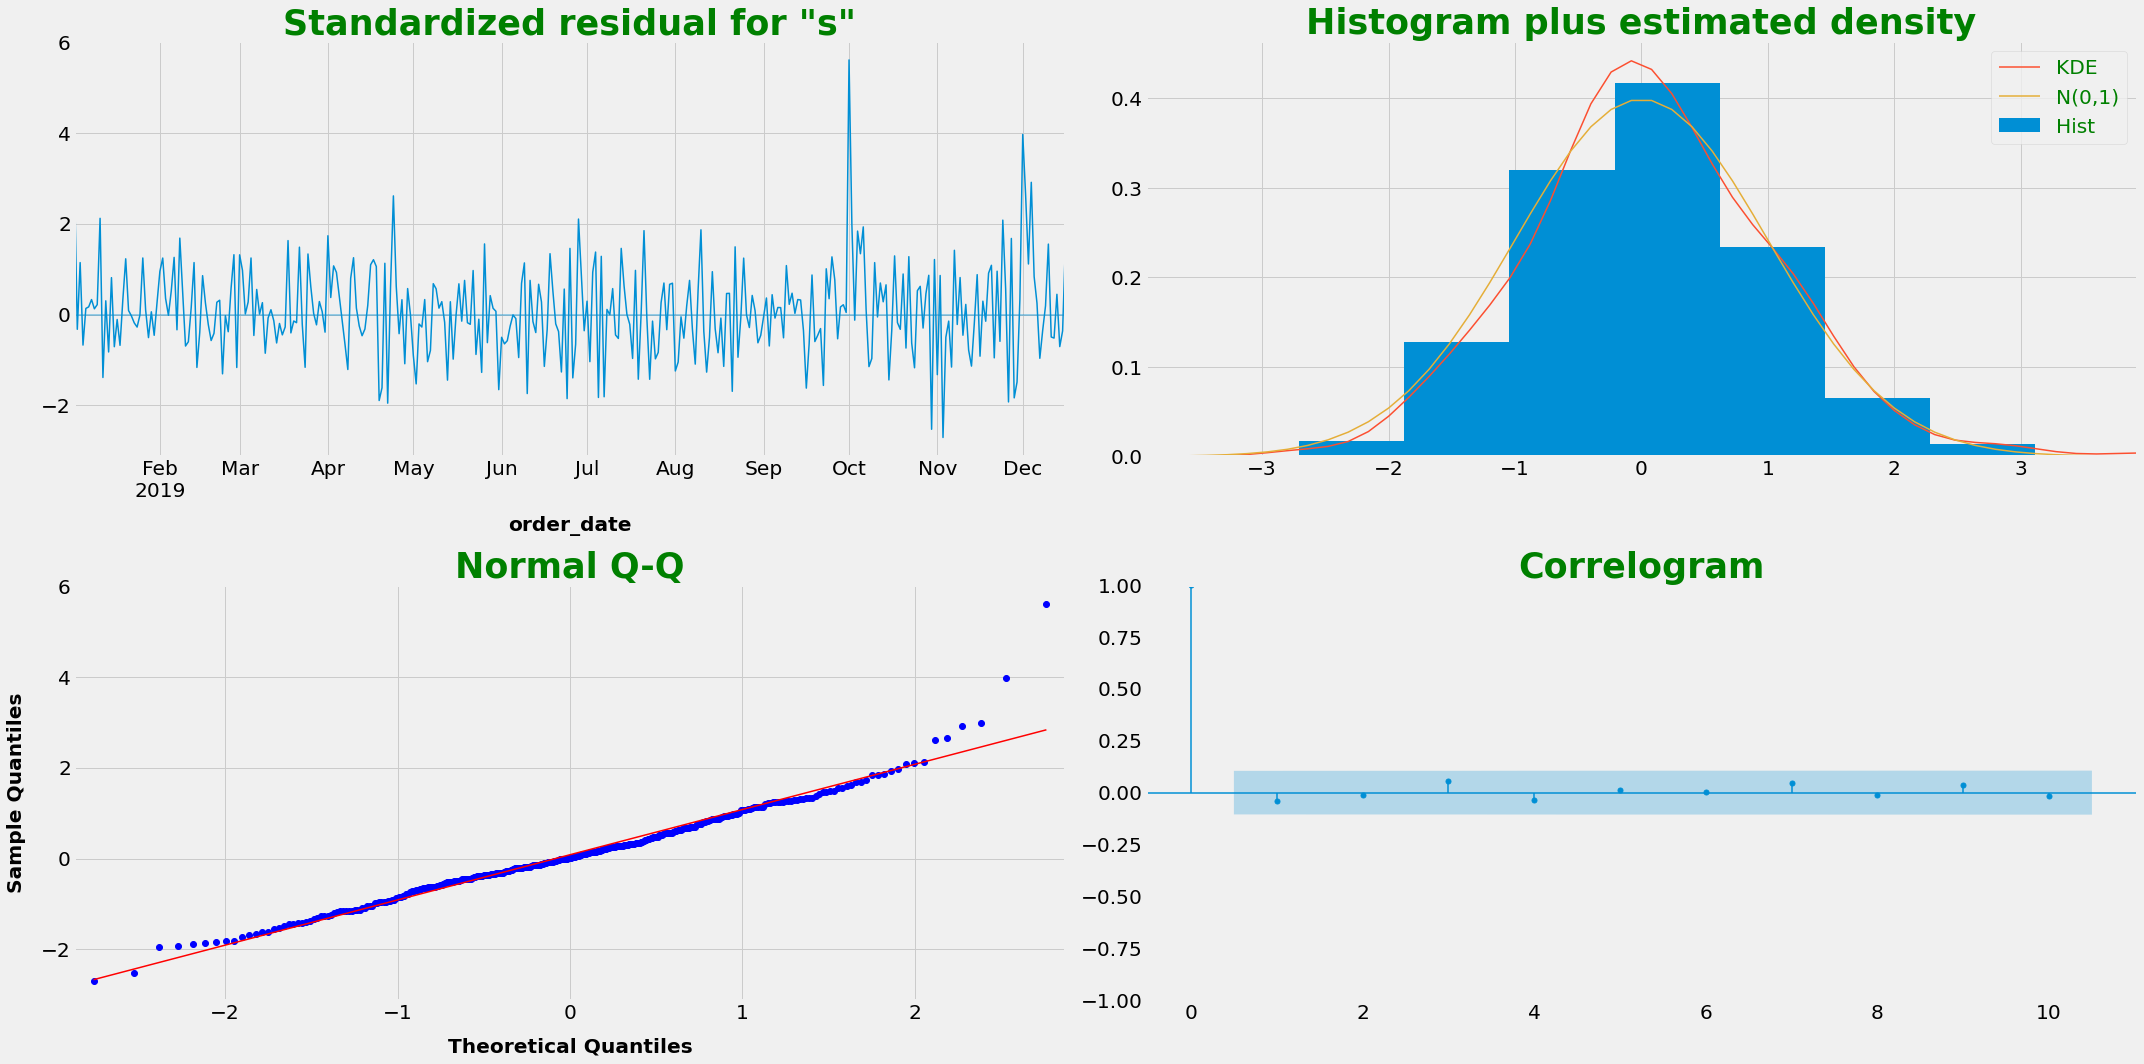

In [95]:
# let’s review the residual plots using stepwise_fit.
model.plot_diagnostics()
plt.grid()
plt.tight_layout()
plt.show()

So how to interpret the plot diagnostics?

> **Top left**: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

> **Top Right**: The density plot suggest normal distribution with mean zero.

> **Bottom left**: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

> **Bottom Right**: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.

Overall, it seems to be a good fit. Let’s forecast.

#### E. model testing 

In [96]:
# prediction for test duration
pred = model.forecast(steps=15)
comp = test.to_frame().join(pred.to_frame().round(2))
comp

sales  predicted_mean
order_date                           
2019-12-17  157357.04       151648.62
2019-12-18  154598.77       151648.62
2019-12-19  137732.67       151648.62
2019-12-20  160178.31       151648.62
2019-12-21  154656.88       151648.62
2019-12-22  146928.21       151648.62
2019-12-23  152064.45       151648.62
2019-12-24  152888.82       151648.62
2019-12-25  152268.42       151648.62
2019-12-26  143896.20       151648.62
2019-12-27  126604.07       151648.62
2019-12-28  133601.53       151648.62
2019-12-29  156009.67       151648.62
2019-12-30  151857.82       151648.62
2019-12-31  131439.32       151648.62

#### F. plot actual and predicted results 

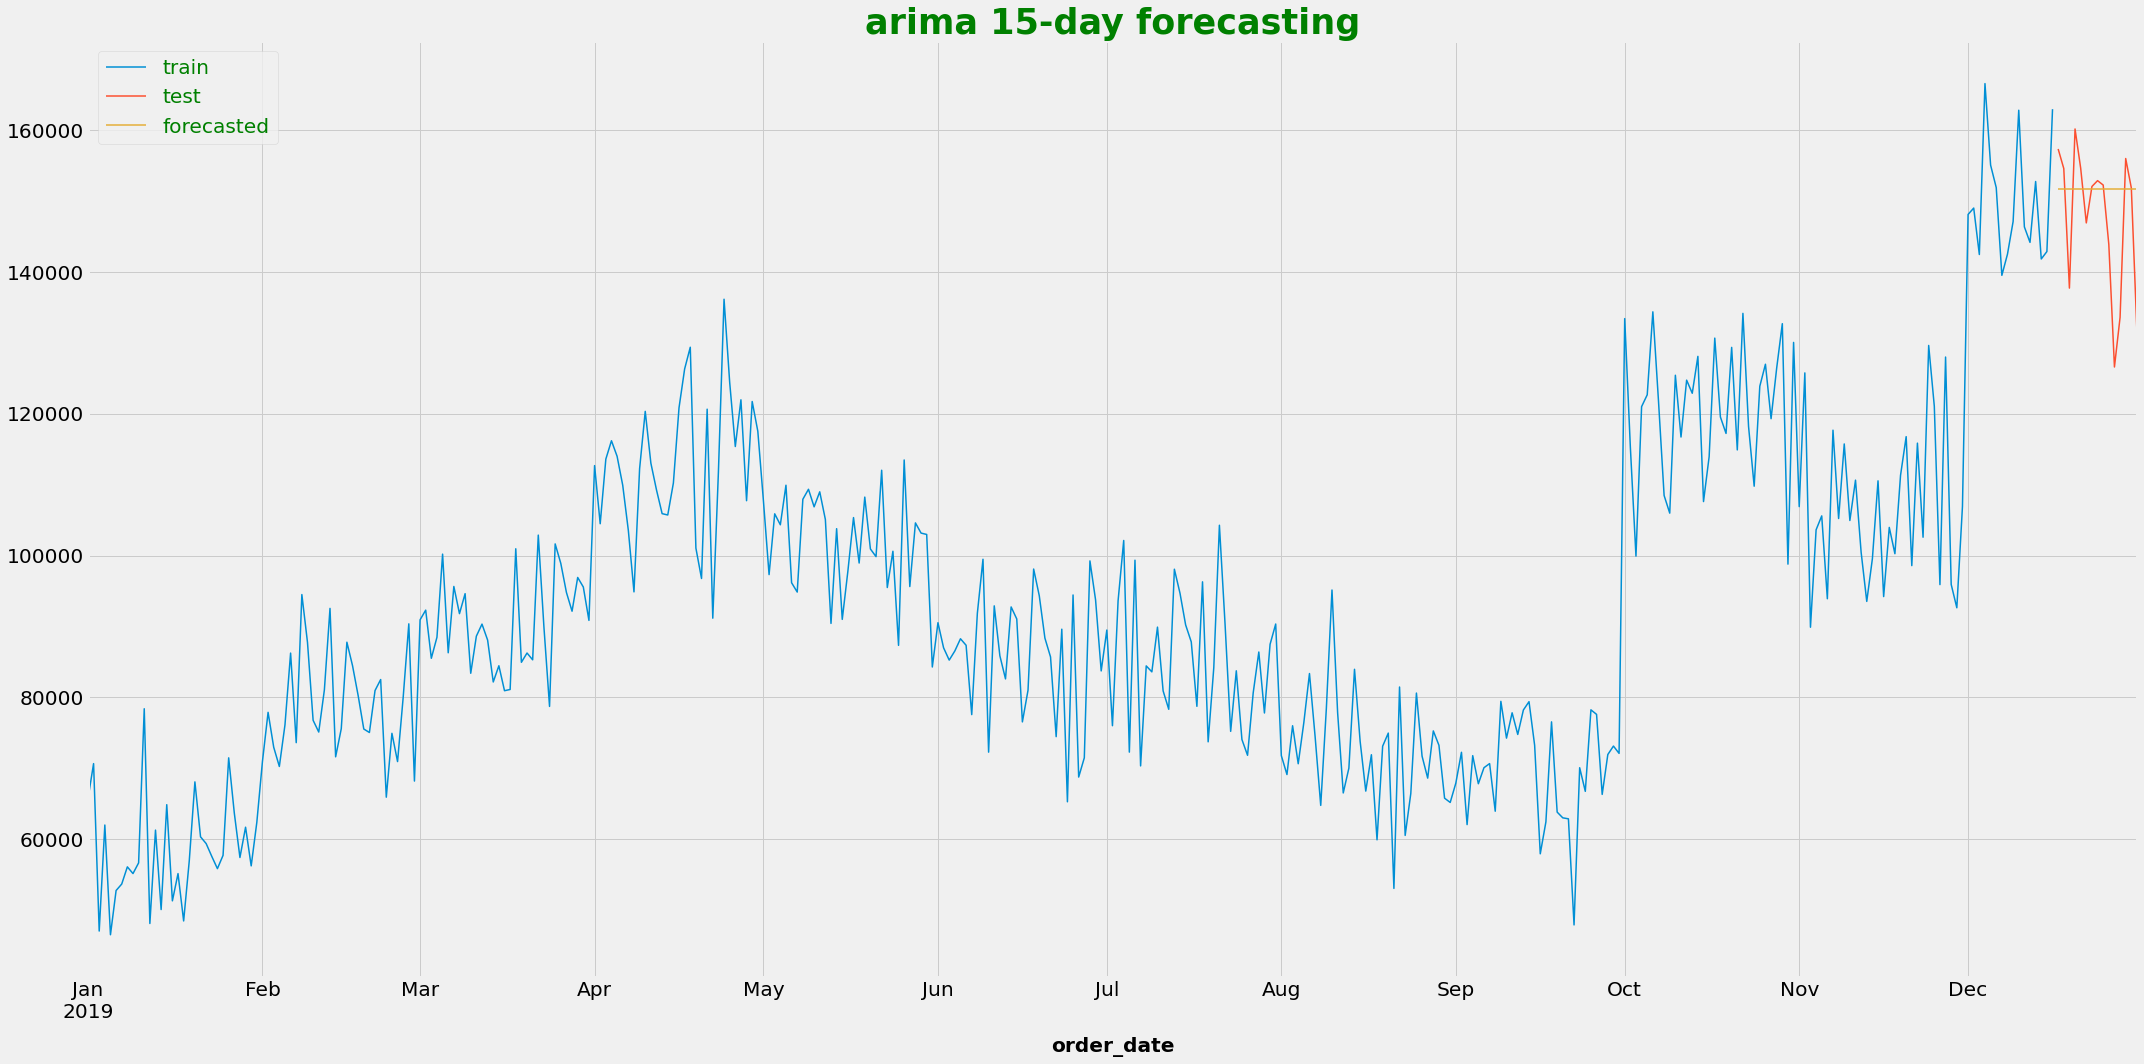

In [97]:
train.plot(label="train")
test.plot(label="test")
pred.plot(label="forecasted")

plt.title("arima 15-day forecasting")
plt.legend()
plt.tight_layout()
plt.show()

#### G. model evaluation

In [98]:
mae = mean_absolute_error(comp.sales, comp.predicted_mean)
mse = mean_squared_error(comp.sales, comp.predicted_mean)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((comp.sales - comp.predicted_mean) /comp.sales)) *100

print(f"MAE = {round(mae,2):,}")
print(f"MSE = {round(mse,2):,}")
print(f"RMSE = {round(rmse,2):,}")
print(f"MAPE = {round(mape,2):,}%")

MAE = 7,782.15
MSE = 118,775,404.5
RMSE = 10,898.41
MAPE = 5.64%


Around 5.64% MAPE implies the model is about 94.36% accurate in predicting the next 15 observations.

### 4. Future prediciton 

#### A. train data

In [99]:
model = sm.tsa.arima.ARIMA(data.sales, order=(0,1,1))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                  365
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -3902.935
Date:                Tue, 14 Jun 2022   AIC                           7809.871
Time:                        09:38:43   BIC                           7817.665
Sample:                    01-01-2019   HQIC                          7812.968
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6514      0.033    -19.602      0.000      -0.717      -0.586
sigma2      1.206e+08    2.4e-11   5.03e+18      0.000    1.21e+08    1.21e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):               138.14
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               1.85   Skew:                             0.66
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.62e+33. Standard errors may be unstable.
"""

#### B. white noise 

In [100]:
print("Lags : p_value")
for elt in [5, 10, 15, 20, 25, 30]:
    print("{} : {}".format(elt, acorr_ljungbox(model.resid, lags=elt)[1].mean()))
    
display(sm.stats.acorr_ljungbox(model.resid, lags=[5, 10, 15, 20, 25, 30], return_df=True))

Lags : p_value
5 : 0.7266225455066073
10 : 0.8251009611244511
15 : 0.8803733343860183
20 : 0.9096340596131757
25 : 0.9271650052377137
30 : 0.9391386621471606


lb_stat  lb_pvalue
5    2.273952   0.810085
10   3.533229   0.965958
15   3.989983   0.997770
20   6.521326   0.997985
25   9.188684   0.998328
30  11.099994   0.999345

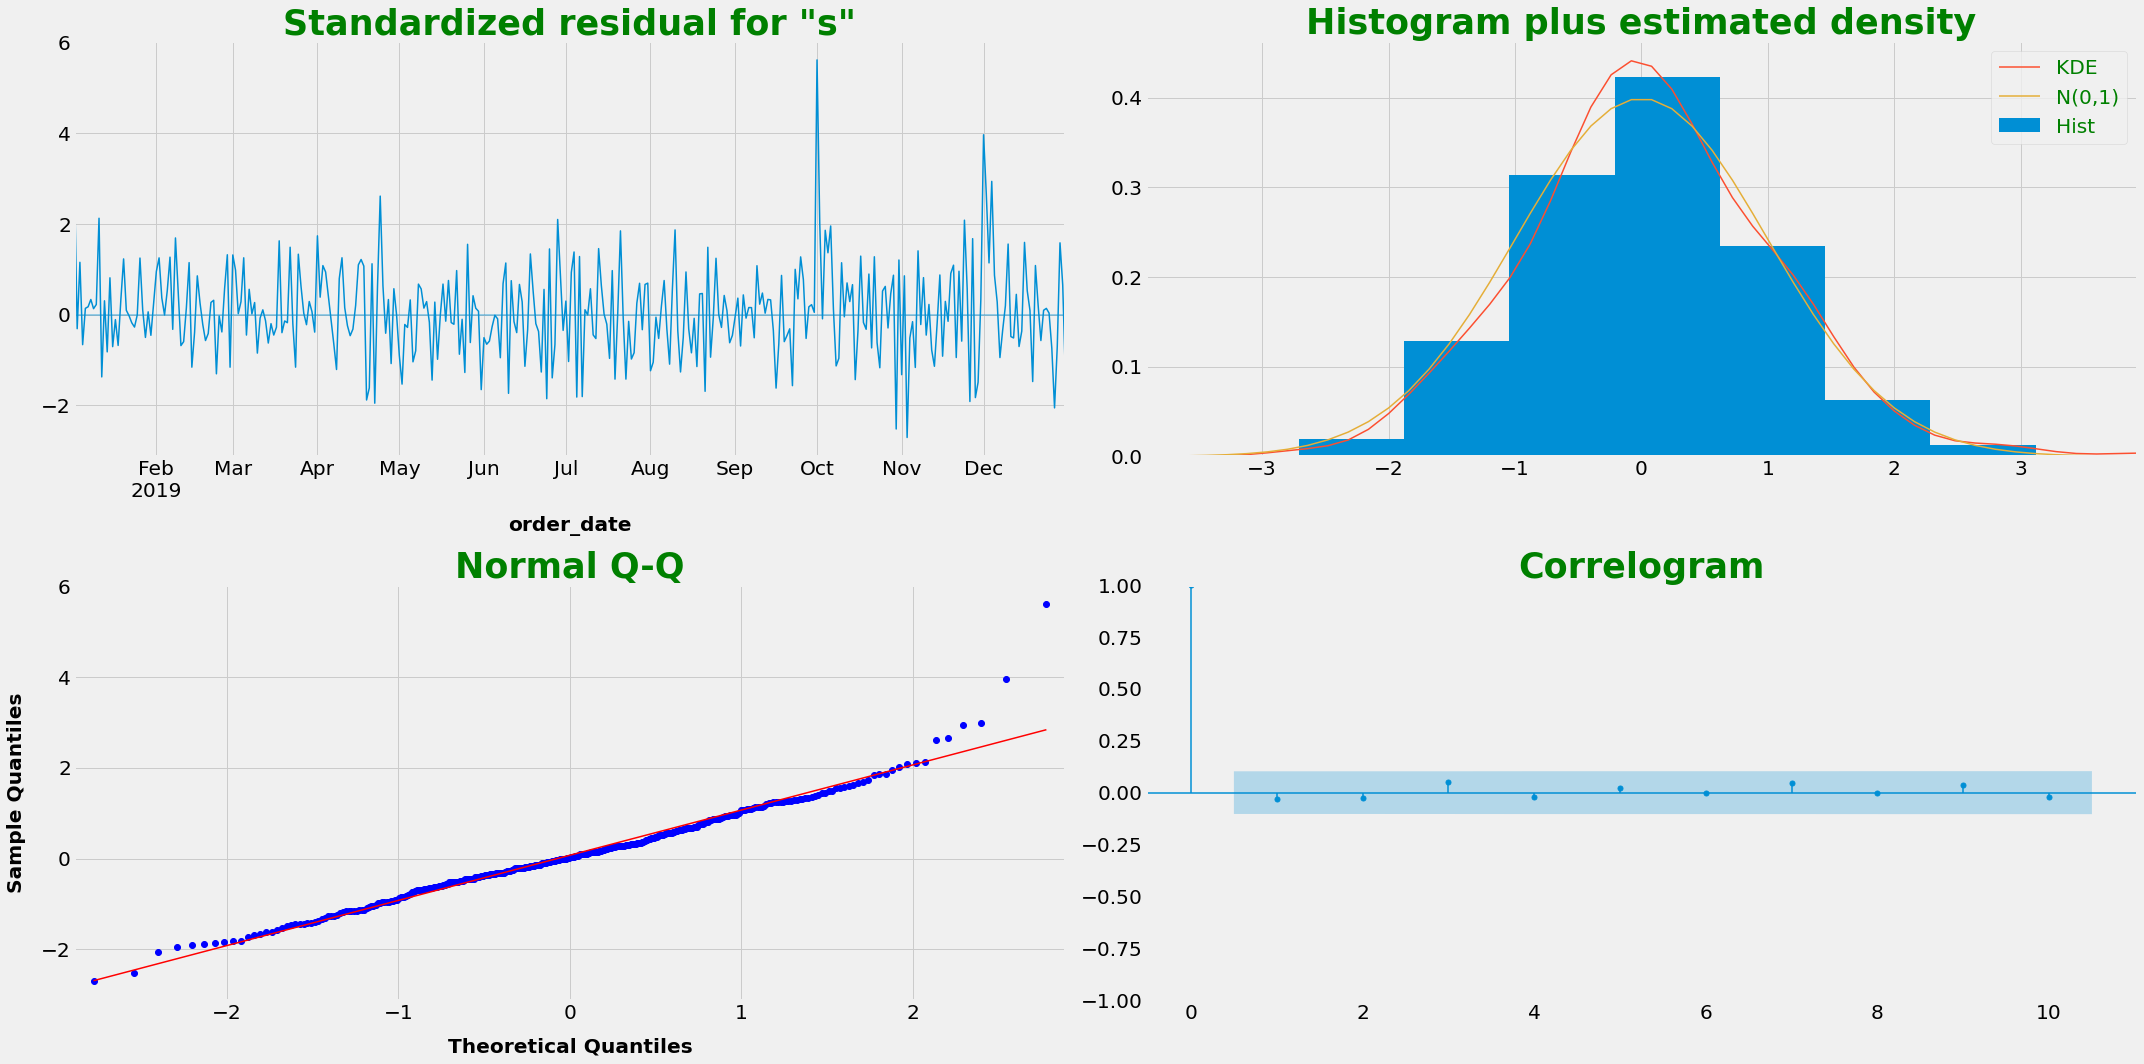

In [101]:
# Let’s review the residual plots using stepwise_fit.
model.plot_diagnostics()
plt.grid()
plt.tight_layout()
plt.show()

#### C. predict

In [102]:
pred = model.forecast(steps=15)


#### D. plot results 

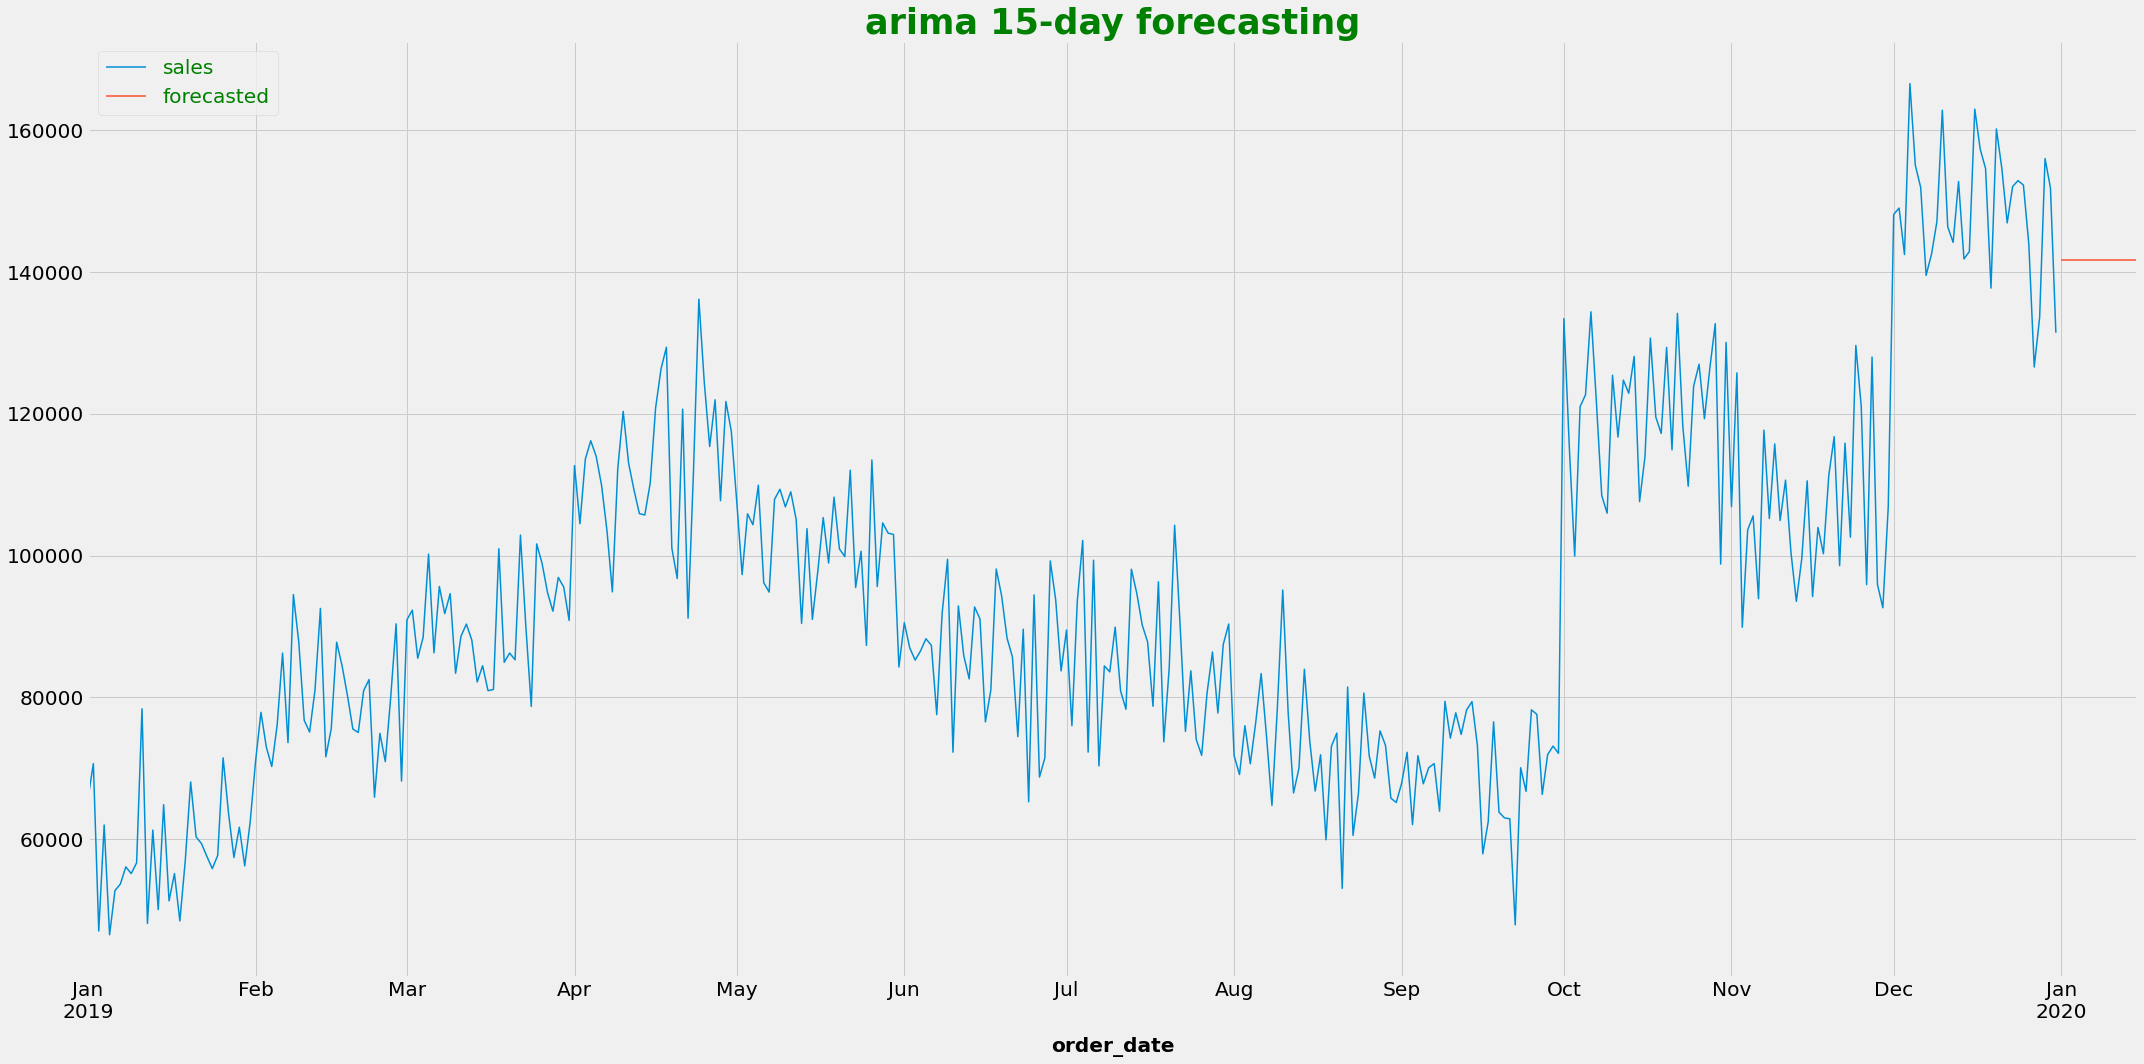

In [103]:
data.sales.plot(label="sales")
pred.plot(label="forecasted")

plt.title("arima 15-day forecasting")
plt.legend()
plt.tight_layout()
plt.show()